In [2]:
import numpy as np
import re
import pandas as pd
import edlib
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os

In [3]:
def open_fastq(input_fastq):
    output = []
    current_read = []
    for i, line in enumerate(open(input_fastq, 'r')):
        if i%4 != 3:
            current_read += [line.strip()]
        else:
            current_read += [line.strip()]
            output += [current_read]
            current_read = []
    return output

In [4]:
test = open_fastq('/Users/zaindossani/Documents/missionbio/basespace/HC69.5_CXCR4_CCR5_LTR_KO-211644434/FASTQ_Generation_2020-11-20_05_40_50Z-344577233/1_L001-ds.8287fa81025c47a0a7003ac57a04f0b9/test.txt')

In [5]:
test_2 = open_fastq('/Users/zaindossani/Documents/missionbio/basespace/HC69.5_CXCR4_CCR5_LTR_KO-211644434/FASTQ_Generation_2020-11-20_05_40_50Z-344577233/1_L001-ds.8287fa81025c47a0a7003ac57a04f0b9/test_2.txt')

In [6]:
whitelist = []
for line in open('/Users/zaindossani/Downloads/bc1_revcom_768.txt', 'r'):
    whitelist += line.strip().split(",")

In [7]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

/var/folders/fc/wd94270d76zdvmbzln2npgxr0000gp/T/ipykernel_88008/82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [7]:
for item in test:
    print(item[1][:8], item[1][8:30], item[1][30:38], item[1][38:46])


CTTGCTAC GAGTGATTGCTTGTGACGCCTT GCATTGAA CTATGACG
CGGTTCAA GAGTGATTGCTTGTGACGCCTT ATTCTAGT CGATGACG
CCACATGG GAGTGATTGCTTGTGACGCCTT TCCGGTGA CGATGACG
TCTCTACA GAGTGATTGCTTGTGACGCCTT GGACGTGC CGATGACG
TCTCACAA GAGTGATTGCTTGTGACGCCTT GAGGCGCG CGATGACG
TTCTACGT GAGTGATTGCTTGTGACGCCTT CATGTCAC CGATGACG
AGAATCCG GAGTGATTGCTTGTGACGCCTT GATGACGG CGATGACG
TCAATTGA GAGTGATTGCTTGTGACGCCTT ACTCCTAA CGATGACG
TAGTTAAT GAGTGATTGCTTGTGACGCCTT ATTCAGGA CGATGACG
AACTCACT GAGTGATTGCTTGTGACGCCTT AACGCCAA CGATGACG
CATGTCAC GAGTGATTGCTTGTGACGCCTT TAGTAGCC CGATGACG
TTCACGAG GAGTGATTGCTTGTGACGCCTT TGGATCCA CGATGACG
CATGGCTG GAGTGATTGCTTGTGACGCCTT TAATTCAA CGATGACG
CAAGTTAA GAGTGATTGCTTGTGACGCCTT AACGTACC CGATGACG
CATGTTCT GAGTGATTGCTTGTGACGCCTT GAGTGATA CTATGACG
CTTAACCG GAGTGATTGCTTGTGACGCCTT GCGCATTG CGATGACG
CACGTAAG GAGTGATTGCTTGTGACGCCTT ACATCATT CGATGACG
AGGACGTC GAGTGATTGCTTGTGACGCCTT ACGGACGA CGATGCCG
CTACTAAT GAGTGATTGCTTGTGACGCCTT GGTACTTC CGATGACG
CTACGCAA GAGTGATTGCTTGTGACGCCTT TAATCAGA CGATGACG


In [8]:
for item in test:
    ident = item[0].split(':')
    ident += [item[1][:8] + item[1][30:38]]
    print(ident)
    print(':'.join(ident))

['@M02339', '153', '000000000-JCYW8', '1', '1101', '17820', '1566 1', 'N', '0', 'CCTTCATT', 'CTTGCTACGCATTGAA']
@M02339:153:000000000-JCYW8:1:1101:17820:1566 1:N:0:CCTTCATT:CTTGCTACGCATTGAA
['@M02339', '153', '000000000-JCYW8', '1', '1101', '16891', '1573 1', 'N', '0', 'CCTTCATT', 'CGGTTCAAATTCTAGT']
@M02339:153:000000000-JCYW8:1:1101:16891:1573 1:N:0:CCTTCATT:CGGTTCAAATTCTAGT
['@M02339', '153', '000000000-JCYW8', '1', '1101', '13378', '1575 1', 'N', '0', 'CCTTCATT', 'CCACATGGTCCGGTGA']
@M02339:153:000000000-JCYW8:1:1101:13378:1575 1:N:0:CCTTCATT:CCACATGGTCCGGTGA
['@M02339', '153', '000000000-JCYW8', '1', '1101', '21440', '1581 1', 'N', '0', 'CCTTCATT', 'TCTCTACAGGACGTGC']
@M02339:153:000000000-JCYW8:1:1101:21440:1581 1:N:0:CCTTCATT:TCTCTACAGGACGTGC
['@M02339', '153', '000000000-JCYW8', '1', '1101', '10373', '1592 1', 'N', '0', 'CCTTCATT', 'TCTCACAAGAGGCGCG']
@M02339:153:000000000-JCYW8:1:1101:10373:1592 1:N:0:CCTTCATT:TCTCACAAGAGGCGCG
['@M02339', '153', '000000000-JCYW8', '1', '1101',

In [9]:
for item in test:
    bc1 = item[1][:8]
    bc2 = item[1][30:38]
    print(bc1, bc1 in whitelist)
    print(bc2, bc2 in whitelist)
    print(item[1][:8], item[1][8:30], item[1][30:38], item[1][38:46])    
    print()

CTTGCTAC True
GCATTGAA True
CTTGCTAC GAGTGATTGCTTGTGACGCCTT GCATTGAA CTATGACG

CGGTTCAA True
ATTCTAGT False
CGGTTCAA GAGTGATTGCTTGTGACGCCTT ATTCTAGT CGATGACG

CCACATGG True
TCCGGTGA True
CCACATGG GAGTGATTGCTTGTGACGCCTT TCCGGTGA CGATGACG

TCTCTACA True
GGACGTGC True
TCTCTACA GAGTGATTGCTTGTGACGCCTT GGACGTGC CGATGACG

TCTCACAA False
GAGGCGCG False
TCTCACAA GAGTGATTGCTTGTGACGCCTT GAGGCGCG CGATGACG

TTCTACGT True
CATGTCAC True
TTCTACGT GAGTGATTGCTTGTGACGCCTT CATGTCAC CGATGACG

AGAATCCG True
GATGACGG True
AGAATCCG GAGTGATTGCTTGTGACGCCTT GATGACGG CGATGACG

TCAATTGA True
ACTCCTAA True
TCAATTGA GAGTGATTGCTTGTGACGCCTT ACTCCTAA CGATGACG

TAGTTAAT True
ATTCAGGA True
TAGTTAAT GAGTGATTGCTTGTGACGCCTT ATTCAGGA CGATGACG

AACTCACT True
AACGCCAA True
AACTCACT GAGTGATTGCTTGTGACGCCTT AACGCCAA CGATGACG

CATGTCAC True
TAGTAGCC True
CATGTCAC GAGTGATTGCTTGTGACGCCTT TAGTAGCC CGATGACG

TTCACGAG True
TGGATCCA True
TTCACGAG GAGTGATTGCTTGTGACGCCTT TGGATCCA CGATGACG

CATGGCTG True
TAATTCAA True
CATGGCTG GAGTGATTGCTT

In [10]:
edlib.align('AACTCACT', 'AACGCCAA')

{'editDistance': 4,
 'alphabetLength': 4,
 'locations': [(None, 7)],
 'cigar': None}

In [53]:
ed_dis = []
for item in whitelist:
    ed_dis += [edlib.align('TTTATGGA', item)['editDistance']]

In [12]:
Counter(ed_dis)

Counter({5: 210, 6: 273, 4: 100, 7: 137, 8: 19, 3: 27, 2: 2})

In [5]:
array = []
for itemx in whitelist:
    row = []
    for itemy in whitelist:
        row += [edlib.align(itemx, itemy)['editDistance']]
    array += [row]
lev_dis_array = pd.DataFrame(array)

In [7]:
lower_tri = lev_dis_array.where(np.tril(np.ones(lev_dis_array.shape)).astype(bool))

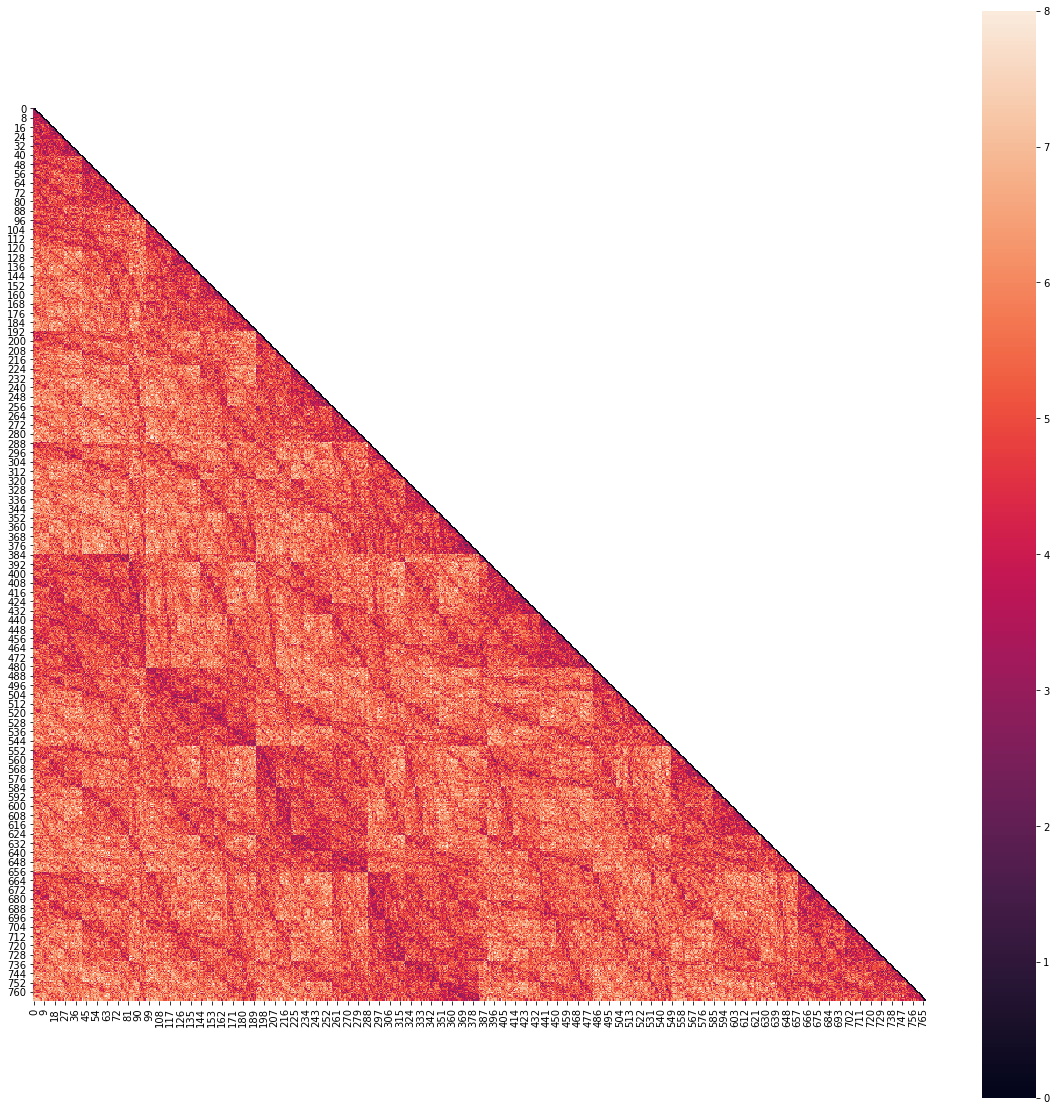

In [15]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(lower_tri, square=True)


In [16]:
for row in array:
    if Counter(row)[1] != 0:
        print(Counter(row)[1])

In [17]:
totals = Counter()

In [18]:
for row in array:
    totals += Counter(row)

In [19]:
totals

Counter({0: 768,
         3: 28860,
         4: 105582,
         2: 1006,
         5: 207402,
         6: 187496,
         7: 55244,
         8: 3466})

In [20]:
for item in test:
    bc1 = item[1][:8]
    bc2 = item[1][30:38]
    print(bc1, bc1 in whitelist)
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_item in whitelist:
            ed = edlib.align(bc1, wl_item)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_item]
        print(Counter(ed_dis))
        if len(replacement) == 1:
            print(bc1, replacement[0])
    print(bc2, bc2 in whitelist)
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_item in whitelist:
            ed = edlib.align(bc2, wl_item)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_item]
        print(Counter(ed_dis))
        if len(replacement) == 1:
            print(bc2, replacement[0])
    print(item[1][:8], item[1][8:30], item[1][30:38], item[1][38:46])    
    print()

CTTGCTAC True
GCATTGAA True
CTTGCTAC GAGTGATTGCTTGTGACGCCTT GCATTGAA CTATGACG

CGGTTCAA True
ATTCTAGT False
Counter({5: 264, 6: 246, 4: 154, 7: 65, 3: 35, 2: 2, 1: 1, 8: 1})
ATTCTAGT ATTCTAGG
CGGTTCAA GAGTGATTGCTTGTGACGCCTT ATTCTAGT CGATGACG

CCACATGG True
TCCGGTGA True
CCACATGG GAGTGATTGCTTGTGACGCCTT TCCGGTGA CGATGACG

TCTCTACA True
GGACGTGC True
TCTCTACA GAGTGATTGCTTGTGACGCCTT GGACGTGC CGATGACG

TCTCACAA False
Counter({6: 256, 5: 240, 4: 124, 7: 101, 3: 31, 8: 10, 2: 5, 1: 1})
TCTCACAA TCGCACAA
GAGGCGCG False
Counter({6: 265, 5: 239, 4: 126, 7: 89, 3: 30, 8: 13, 2: 5, 1: 1})
GAGGCGCG GAGGAGCG
TCTCACAA GAGTGATTGCTTGTGACGCCTT GAGGCGCG CGATGACG

TTCTACGT True
CATGTCAC True
TTCTACGT GAGTGATTGCTTGTGACGCCTT CATGTCAC CGATGACG

AGAATCCG True
GATGACGG True
AGAATCCG GAGTGATTGCTTGTGACGCCTT GATGACGG CGATGACG

TCAATTGA True
ACTCCTAA True
TCAATTGA GAGTGATTGCTTGTGACGCCTT ACTCCTAA CGATGACG

TAGTTAAT True
ATTCAGGA True
TAGTTAAT GAGTGATTGCTTGTGACGCCTT ATTCAGGA CGATGACG

AACTCACT True
AACGCCAA True
AAC

In [21]:
item

['@M02339:153:000000000-JCYW8:1:1101:16581:1649 1:N:0:CCTTCATT',
 'AAGCTCGAGAGTGATTGCTTGTGACGCCTTGTAGCGACCGATGACGATGATGACGTTGTTGCGGACAGCCACGTCCTCACACACCTCGAGCTCTCGCACCAGGGCTGGGATGCTCTTCTTTGCCAGATCCTCGTGCTGTAATCACAGCTTA',
 '+',
 '-6ABCF7B,-6C;<FFFFGG<F<<F,BFFG8F99C:+@F++@:,C,,B,,C,9C7BD<CE,@+++@+,CC8E:FFFGE,C8F:FCEF7,,8@EFE+=+@>,,++CE+++,:+4:?FEFFGG,AA,,,:ADDF:F,@F9F9,,9,@,,@FD,']

In [22]:
ed_dis = []
for wl_item in whitelist:
    ed = edlib.align('TTTATGGA', wl_item)['editDistance']
    ed_dis += [ed]
ced = dict(sorted(Counter(ed_dis).items()))

In [23]:
ced

{2: 2, 3: 27, 4: 100, 5: 210, 6: 273, 7: 137, 8: 19}

In [40]:
for item in test:
    bc1 = item[1][:8]
    bc2 = item[1][30:38]
    print(bc1, bc1 in whitelist)
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_item in whitelist:
            ed = edlib.align(bc1, wl_item)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_item]
        print(Counter(ed_dis))
        if len(replacement) == 1:
            bc1 = replacement[0]
        else:
            bc1 = ""
    print(bc2, bc2 in whitelist)
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_item in whitelist:
            ed = edlib.align(bc2, wl_item)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_item]
        print(Counter(ed_dis))
        if len(replacement) == 1:
            bc2 = replacement[0]
        else:
            bc2 = ""
    print(item[1][:8], item[1][8:30], item[1][30:38], item[1][38:46])
    print(bc1, " " * 22, bc2)
    ident = bc1 + bc2
    if len(ident) == 16:
        header = item[0] + ':' + ident
        print(header)
    print()

CTTGCTAC True
GCATTGAA True
CTTGCTAC GAGTGATTGCTTGTGACGCCTT GCATTGAA CTATGACG
CTTGCTAC                        GCATTGAA
@M02339:153:000000000-JCYW8:1:1101:17820:1566 1:N:0:CCTTCATT:CTTGCTACGCATTGAA

CGGTTCAA True
ATTCTAGT False
Counter({5: 264, 6: 246, 4: 154, 7: 65, 3: 35, 2: 2, 1: 1, 8: 1})
CGGTTCAA GAGTGATTGCTTGTGACGCCTT ATTCTAGT CGATGACG
CGGTTCAA                        ATTCTAGG
@M02339:153:000000000-JCYW8:1:1101:16891:1573 1:N:0:CCTTCATT:CGGTTCAAATTCTAGG

CCACATGG True
TCCGGTGA True
CCACATGG GAGTGATTGCTTGTGACGCCTT TCCGGTGA CGATGACG
CCACATGG                        TCCGGTGA
@M02339:153:000000000-JCYW8:1:1101:13378:1575 1:N:0:CCTTCATT:CCACATGGTCCGGTGA

TCTCTACA True
GGACGTGC True
TCTCTACA GAGTGATTGCTTGTGACGCCTT GGACGTGC CGATGACG
TCTCTACA                        GGACGTGC
@M02339:153:000000000-JCYW8:1:1101:21440:1581 1:N:0:CCTTCATT:TCTCTACAGGACGTGC

TCTCACAA False
Counter({6: 256, 5: 240, 4: 124, 7: 101, 3: 31, 8: 10, 2: 5, 1: 1})
GAGGCGCG False
Counter({6: 265, 5: 239, 4: 126, 7: 89, 3: 

In [39]:
item

['@M02339:153:000000000-JCYW8:1:1101:16581:1649 1:N:0:CCTTCATT',
 'AAGCTCGAGAGTGATTGCTTGTGACGCCTTGTAGCGACCGATGACGATGATGACGTTGTTGCGGACAGCCACGTCCTCACACACCTCGAGCTCTCGCACCAGGGCTGGGATGCTCTTCTTTGCCAGATCCTCGTGCTGTAATCACAGCTTA',
 '+',
 '-6ABCF7B,-6C;<FFFFGG<F<<F,BFFG8F99C:+@F++@:,C,,B,,C,9C7BD<CE,@+++@+,CC8E:FFFGE,C8F:FCEF7,,8@EFE+=+@>,,++CE+++,:+4:?FEFFGG,AA,,,:ADDF:F,@F9F9,,9,@,,@FD,']

In [34]:
test[0][0].split(':')

['@M02339',
 '153',
 '000000000-JCYW8',
 '1',
 '1101',
 '17820',
 '1566 1',
 'N',
 '0',
 'CCTTCATT']

In [33]:
test_2[0][0].split(':')

['@M02339',
 '153',
 '000000000-JCYW8',
 '1',
 '1101',
 '17820',
 '1566 2',
 'N',
 '0',
 'CCTTCATT']

In [37]:
for i, item in enumerate(test[0][0].split(':')):
    print(test_2[0][0].split(':')[i] == item)

True
True
True
True
True
True
False
True
True
True


In [39]:
for i, seq in enumerate(test):
    total = 0
    for j, item in enumerate(seq[0].split(':')):
        if test_2[i][0].split(':')[j] != item:
            total +=1
    print(total)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [9]:
output_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/MB analysis/individual cells/'

In [10]:
with open(output_path + 'batch.batch', 'w') as f:
    f.write('name\tfastq_r1\tfastq_r2\n')

In [81]:
for i, seq in enumerate(test):
    bc1 = seq[1][:8]
    bc2 = seq[1][30:38]
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc1, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc1 = replacement[0]
        else:
            bc1 = ""
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc2, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc2 = replacement[0]
        else:
            bc2 = ""
    ident = bc1 + bc2
    if len(ident) == 16:
        cell_filename_1 = output_path + ident + '_r1.txt'
        with open(cell_filename_1, 'a') as f1:
            for subline in seq:
                f1.write(subline + '\n')
        cell_filename_2 = output_path + ident + '_r2.txt'
        with open(cell_filename_2, 'a') as f2:
            for subline in test_2[i]:
                f2.write(subline + '\n')
        with open(output_path + 'batch.batch', 'a') as f3:
            f3.write(ident + '\t' + ident + '_r1.txt' + '\t' + ident + '_r2.txt' + '\n')
    else:
        print('failed at barcode')
                

failed at barcode


In [133]:
f1000r1 = open_fastq('/Users/zaindossani/Documents/missionbio/basespace/HC69.5_CXCR4_CCR5_LTR_KO-211644434/FASTQ_Generation_2020-11-20_05_40_50Z-344577233/1_L001-ds.8287fa81025c47a0a7003ac57a04f0b9/first1000_r1.txt')

In [8]:
f1000r2 = open_fastq('/Users/zaindossani/Documents/missionbio/basespace/HC69.5_CXCR4_CCR5_LTR_KO-211644434/FASTQ_Generation_2020-11-20_05_40_50Z-344577233/1_L001-ds.8287fa81025c47a0a7003ac57a04f0b9/first1000_r2.txt') 

In [84]:
with open(output_path + 'batch.batch', 'w') as f:
    f.write('name\tfastq_r1\tfastq_r2\n')

In [85]:
error_count = 0
total_count = 0
idents = set()
for i, seq in enumerate(f1000r1):
    total_count += 1
    bc1 = seq[1][:8]
    bc2 = seq[1][30:38]
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc1, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc1 = replacement[0]
        else:
            bc1 = ""
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc2, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc2 = replacement[0]
        else:
            bc2 = ""
    ident = bc1 + bc2
    if len(ident) == 16:
        cell_filename_1 = output_path + ident + '_r1.txt'
        with open(cell_filename_1, 'a') as f1:
            for subline in seq:
                f1.write(subline + '\n')
        cell_filename_2 = output_path + ident + '_r2.txt'
        with open(cell_filename_2, 'a') as f2:
            for subline in f1000r2[i]:
                f2.write(subline + '\n')
        if ident not in idents:
            with open(output_path + 'batch.batch', 'a') as f3:
                f3.write(ident + '\t' + ident + '_r1.txt' + '\t' + ident + '_r2.txt' + '\n')
        idents.add(ident)
    else:
        print('failed at barcode')
        error_count += 1
print('error rate', error_count/total_count)
                

failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
error rate 0.053


In [29]:
error_count = 0
total_count = 0
idents = set()
seqs = {}
for i, seq in enumerate(f1000r1):
    total_count += 1
    bc1 = seq[1][:8]
    bc2 = seq[1][30:38]
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc1, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc1 = replacement[0]
        else:
            bc1 = ""
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc2, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc2 = replacement[0]
        else:
            bc2 = ""
    ident = bc1 + bc2
    if len(ident) == 16:
        if ident in seqs:
            seqs[ident] += [(i, seq)]
        else:
            seqs[ident] = [(i, seq)]
        '''cell_filename_1 = output_path + ident + '_r1.txt'
        with open(cell_filename_1, 'a') as f1:
            for subline in seq:
                f1.write(subline + '\n')
        cell_filename_2 = output_path + ident + '_r2.txt'
        with open(cell_filename_2, 'a') as f2:
            for subline in f1000r2[i]:
                f2.write(subline + '\n')
        if ident not in idents:
            with open(output_path + 'batch.batch', 'a') as f3:
                f3.write(ident + '\t' + ident + '_r1.txt' + '\t' + ident + '_r2.txt' + '\n')
        idents.add(ident)'''
    else:
        print('failed at barcode')
        error_count += 1
print('error rate', error_count/total_count)
                

failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
failed at barcode
error rate 0.053


In [27]:
for cell in seqs:
    print(len(seqs[cell]))
print(len(seqs))

1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
2
4
2
2
1
1
1
1
1
2
1
1
1
1
2
2
2
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
3
1
2
4
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
2
1
1
2
2
1
1
1
1
1
2
2
1
1
1
1
2
2
1
1
1
1
1
1
1
2
1
2
1
3
2
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
1
2
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
2
1
1
1
2
1
2
2
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
2
2
1
2
2
1
1
3
1
3
1
1
3
1
1
1
1
2
1
1
1
1
1
1
1
2
1
1
2
2
1
1
1
2
1
1
1
1
1
2
1
2
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
2
1
1
3
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
1
2
1
1
1
3
2
1
1
1
1
1
1
1
1
1
4
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
2
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
4
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
1
1
1
1


In [30]:
cell_cutoff = 1
for cell in seqs:
    if len(seqs[cell]) > cell_cutoff:
        cell_filename_1 = output_path + cell + '_r1.txt'
        with open(cell_filename_1, 'a') as f1:
            for (i, seq) in seqs[cell]:
                for subline in seq:
                    f1.write(subline + '\n')
        cell_filename_2 = output_path + cell + '_r2.txt'
        with open(cell_filename_2, 'a') as f2:
            for subline in f1000r2[i]:
                f2.write(subline + '\n')
        with open(output_path + 'batch.batch', 'a') as f3:
            f3.write(cell + '\t' + cell + '_r1.txt' + '\t' + cell + '_r2.txt' + '\n')

In [127]:
full_r1 = open_fastq('/Users/zaindossani/Documents/missionbio/basespace/HC69.5_CXCR4_CCR5_LTR_KO-211644434/FASTQ_Generation_2020-11-20_05_40_50Z-344577233/1_L001-ds.8287fa81025c47a0a7003ac57a04f0b9/4X-1_S1_L001_R1_001.fastq')

In [128]:
full_r2 = open_fastq('/Users/zaindossani/Documents/missionbio/basespace/HC69.5_CXCR4_CCR5_LTR_KO-211644434/FASTQ_Generation_2020-11-20_05_40_50Z-344577233/1_L001-ds.8287fa81025c47a0a7003ac57a04f0b9/4X-1_S1_L001_R2_001.fastq')

In [ ]:
with open(output_path + 'batch.batch', 'w') as f:
    f.write('name\tfastq_r1\tfastq_r2\n')

In [135]:
error_count = 0
total_count = 0
idents = set()
for i, seq in enumerate(full_r1):
    total_count += 1
    bc1 = seq[1][:8]
    bc2 = seq[1][30:38]
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc1, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc1 = replacement[0]
        else:
            bc1 = ""
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc2, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc2 = replacement[0]
        else:
            bc2 = ""
    ident = bc1 + bc2
    if len(ident) == 16:
#        cell_filename_1 = output_path + ident + '_r1.txt'
#        with open(cell_filename_1, 'a') as f1:
#            for subline in seq:
#                f1.write(subline + '\n')
#        cell_filename_2 = output_path + ident + '_r2.txt'
#        with open(cell_filename_2, 'a') as f2:
#            for subline in full_r2[i]:
#                f2.write(subline + '\n')
#        if ident not in idents:
#            with open(output_path + 'batch.batch', 'a') as f3:
#                f3.write(ident + '\t' + ident + '_r1.txt' + '\t' + ident + '_r2.txt' + '\n')
        idents.add(ident)
    else:
#        print('failed at barcode')
        error_count += 1
print('error rate', error_count/total_count)
print(error_count)
print(total_count)

KeyboardInterrupt: 

7946988

## Need to understand

In [3]:
output_path = '/Users/zaindossani/Documents/individual_cells/'

In [136]:
error_count = 0
total_count = 0
cell_cutoff = 100
seqs = {}

#with open(output_path + 'batch.batch', 'w') as f:
#    f.write('name\tfastq_r1\tfastq_r2\n')

for i, seq in enumerate(full_r1):
    total_count += 1
    bc1 = seq[1][:8]
    bc2 = seq[1][30:38]
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc1, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc1 = replacement[0]
        else:
            bc1 = ""
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc2, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc2 = replacement[0]
        else:
            bc2 = ""
    ident = bc1 + bc2
    if len(ident) == 16:
        if ident in seqs:
            seqs[ident] += [(i, seq)]
        else:
            seqs[ident] = [(i, seq)]
    else:
        error_count += 1
print('error rate', error_count/total_count)
print(error_count)
print(total_count)

#for cell in seqs:
#    if len(seqs[cell]) > cell_cutoff:
#        cell_filename_1 = output_path + cell + '_r1.txt'
#        cell_filename_2 = output_path + cell + '_r2.txt'
#        with open(cell_filename_1, 'a') as f1, open(cell_filename_2, 'a') as f2:
#            for (i, seq) in seqs[cell]:
#                for subline in seq:
#                    f1.write(subline + '\n')
#                for subline_2 in full_r2[i]:
#                    f2.write(subline_2 + '\n')
#        with open(output_path + 'batch.batch', 'a') as f3:
#            f3.write(cell + '\t' + cell + '_r1.txt' + '\t' + cell + '_r2.txt' + '\n')             

error rate 0.06519891561431829
518135
7946988


In [5]:
output_path = '/Users/zaindossani/Documents/primary_macs/individual_cells/'

In [6]:
donor1_tube1_r1 = open_fastq('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/MB analysis/primary macrophages/Fastq/Donor1-1_S1_L001_R1_001.fastq')
donor1_tube1_r2 = open_fastq('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/MB analysis/primary macrophages/Fastq/Donor1-1_S1_L001_R2_001.fastq')

In [7]:
len(donor1_tube1_r1)

2829295

In [8]:
error_count = 0
total_count = 0
cell_cutoff = 100
seqs = {}

#with open(output_path + 'batch.batch', 'w') as f:
#    f.write('name\tfastq_r1\tfastq_r2\n')

for i, seq in enumerate(donor1_tube1_r1):
    total_count += 1
    bc1 = seq[1][:8]
    bc2 = seq[1][30:38]
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc1, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc1 = replacement[0]
        else:
            bc1 = ""
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc2, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc2 = replacement[0]
        else:
            bc2 = ""
    ident = bc1 + bc2
    if len(ident) == 16:
        if ident in seqs:
            seqs[ident] += [(i, seq)]
        else:
            seqs[ident] = [(i, seq)]
    else:
        error_count += 1
print('error rate', error_count/total_count)
print(error_count)
print(total_count)

reads_per_cell = []
for cell in seqs:
    reads_per_cell += [len(seqs[cell])]
    
print(sum(read > 0 for read in reads_per_cell))
print(sum(read > 1 for read in reads_per_cell))
print(sum(read > 10 for read in reads_per_cell))
print(sum(read > 100 for read in reads_per_cell))
print(sum(read > 150 for read in reads_per_cell))
print(sum(read > 200 for read in reads_per_cell))
print(sum(read > 250 for read in reads_per_cell))
print(sum(read > 300 for read in reads_per_cell))
print(sum(read > 350 for read in reads_per_cell))
print(sum(read > 400 for read in reads_per_cell))
print(sum(read > 500 for read in reads_per_cell))
print(sum(read > 600 for read in reads_per_cell))
print(sum(read > 700 for read in reads_per_cell))
print(sum(read > 800 for read in reads_per_cell))
print(sum(read > 900 for read in reads_per_cell))
print(sum(read > 1000 for read in reads_per_cell))

#for cell in seqs:
#    if len(seqs[cell]) > cell_cutoff:
#        cell_filename_1 = output_path + cell + '_r1.txt'
#        cell_filename_2 = output_path + cell + '_r2.txt'
#        with open(cell_filename_1, 'a') as f1, open(cell_filename_2, 'a') as f2:
#            for (i, seq) in seqs[cell]:
#                for subline in seq:
#                    f1.write(subline + '\n')
#                for subline_2 in full_r2[i]:
#                    f2.write(subline_2 + '\n')
#        with open(output_path + 'batch.batch', 'a') as f3:
#            f3.write(cell + '\t' + cell + '_r1.txt' + '\t' + cell + '_r2.txt' + '\n')             

error rate 0.05654659552998185
159987
2829295
147143
87879
20791
2470
2116
1901
1768
1671
1583
1503
1385
1298
1200
1104
1024
917


In [9]:
for cell in seqs:
    if len(seqs[cell]) > cell_cutoff:
        cell_filename_1 = output_path + cell + '_r1.txt'
        cell_filename_2 = output_path + cell + '_r2.txt'
        with open(cell_filename_1, 'a') as f1, open(cell_filename_2, 'a') as f2:
            for (i, seq) in seqs[cell]:
                for subline in seq:
                    f1.write(subline + '\n')
                for subline_2 in donor1_tube1_r2[i]:
                    f2.write(subline_2 + '\n')
        with open(output_path + 'batch.batch', 'a') as f3:
            f3.write(cell + '\t' + cell + '_r1.txt' + '\t' + cell + '_r2.txt' + '\n')     

In [8]:
output_path = '/Users/zaindossani/Documents/primary_macs/tube2/individual_cells/'

In [9]:
donor1_tube2_r1 = open_fastq('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/MB analysis/primary macrophages/Fastq/Donor1-2_S2_L001_R1_001.fastq')
donor1_tube2_r2 = open_fastq('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/MB analysis/primary macrophages/Fastq/Donor1-2_S2_L001_R2_001.fastq')

In [13]:
error_count = 0
total_count = 0
cell_cutoff = 100
seqs = {}

#with open(output_path + 'batch.batch', 'w') as f:
#    f.write('name\tfastq_r1\tfastq_r2\n')

for i, seq in enumerate(donor1_tube2_r1):
    total_count += 1
    bc1 = seq[1][:8]
    bc2 = seq[1][30:38]
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc1, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc1 = replacement[0]
        else:
            bc1 = ""
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc2, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc2 = replacement[0]
        else:
            bc2 = ""
    ident = bc1 + bc2
    if len(ident) == 16:
        if ident in seqs:
            seqs[ident] += [(i, seq)]
        else:
            seqs[ident] = [(i, seq)]
    else:
        error_count += 1
print('error rate', error_count/total_count)
print(error_count)
print(total_count)

reads_per_cell = []
for cell in seqs:
    reads_per_cell += [len(seqs[cell])]
    
print(sum(read > 0 for read in reads_per_cell))
print(sum(read > 1 for read in reads_per_cell))
print(sum(read > 10 for read in reads_per_cell))
print(sum(read > 100 for read in reads_per_cell))
print(sum(read > 150 for read in reads_per_cell))
print(sum(read > 200 for read in reads_per_cell))
print(sum(read > 250 for read in reads_per_cell))
print(sum(read > 300 for read in reads_per_cell))
print(sum(read > 350 for read in reads_per_cell))
print(sum(read > 400 for read in reads_per_cell))
print(sum(read > 500 for read in reads_per_cell))
print(sum(read > 600 for read in reads_per_cell))
print(sum(read > 700 for read in reads_per_cell))
print(sum(read > 800 for read in reads_per_cell))
print(sum(read > 900 for read in reads_per_cell))
print(sum(read > 1000 for read in reads_per_cell))
           

error rate 0.05530691152373077
163798
2961619
170871
103061
35152
2769
2460
2256
2081
1960
1853
1760
1570
1381
1207
1004
741
514


In [15]:
with open(output_path + 'batch.batch', 'w') as f:
    f.write('name\tfastq_r1\tfastq_r2\n')
for cell in seqs:
    if len(seqs[cell]) > cell_cutoff:
        cell_filename_1 = output_path + cell + '_r1.txt'
        cell_filename_2 = output_path + cell + '_r2.txt'
        with open(cell_filename_1, 'a') as f1, open(cell_filename_2, 'a') as f2:
            for (i, seq) in seqs[cell]:
                for subline in seq:
                    f1.write(subline + '\n')
                for subline_2 in donor1_tube2_r2[i]:
                    f2.write(subline_2 + '\n')
        with open(output_path + 'batch.batch', 'a') as f3:
            f3.write(cell + '\t' + cell + '_r1.txt' + '\t' + cell + '_r2.txt' + '\n')     

In [10]:
error_count = 0
total_count = 0
cell_cutoff = 100
seqs = {}

#with open(output_path + 'batch.batch', 'w') as f:
#    f.write('name\tfastq_r1\tfastq_r2\n')

for i, seq in enumerate(full_r1):
    total_count += 1
    bc1 = seq[1][:8]
    bc2 = seq[1][30:38]
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc1, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc1 = replacement[0]
        else:
            bc1 = ""
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc2, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc2 = replacement[0]
        else:
            bc2 = ""
    ident = bc1 + bc2
    if len(ident) == 16:
        if ident in seqs:
            seqs[ident] += [(i, seq)]
        else:
            seqs[ident] = [(i, seq)]
    else:
        error_count += 1
print('error rate', error_count/total_count)

reads_per_cell = []
for cell in seqs:
    reads_per_cell += [len(seqs[cell])]
    
    
    
"""    if len(seqs[cell]) > cell_cutoff:
        cell_filename_1 = output_path + cell + '_r1.txt'
        cell_filename_2 = output_path + cell + '_r2.txt'
        with open(cell_filename_1, 'a') as f1, open(cell_filename_2, 'a') as f2:
            for (i, seq) in seqs[cell]:
                for subline in seq:
                    f1.write(subline + '\n')
                for subline_2 in full_r2[i]:
                    f2.write(subline_2 + '\n')
        with open(output_path + 'batch.batch', 'a') as f3:
            f3.write(cell + '\t' + cell + '_r1.txt' + '\t' + cell + '_r2.txt' + '\n')   """          

error rate 0.06519891561431829


"    if len(seqs[cell]) > cell_cutoff:\n        cell_filename_1 = output_path + cell + '_r1.txt'\n        cell_filename_2 = output_path + cell + '_r2.txt'\n        with open(cell_filename_1, 'a') as f1, open(cell_filename_2, 'a') as f2:\n            for (i, seq) in seqs[cell]:\n                for subline in seq:\n                    f1.write(subline + '\n')\n                for subline_2 in full_r2[i]:\n                    f2.write(subline_2 + '\n')\n        with open(output_path + 'batch.batch', 'a') as f3:\n            f3.write(cell + '\t' + cell + '_r1.txt' + '\t' + cell + '_r2.txt' + '\n')   "

In [226]:
print(len(seqs))

236167


In [227]:
reads_per_cell

[1841,
 7,
 3733,
 4,
 3517,
 943,
 4950,
 1962,
 2644,
 4028,
 181,
 3303,
 8,
 2009,
 2611,
 104,
 4708,
 2315,
 4410,
 3676,
 3085,
 3611,
 100,
 1,
 1,
 1,
 3342,
 174,
 3464,
 1041,
 4719,
 4310,
 204,
 5924,
 1797,
 2804,
 217,
 81,
 3522,
 3478,
 6035,
 4363,
 2706,
 186,
 2,
 5261,
 2539,
 4488,
 2897,
 3737,
 3666,
 3630,
 190,
 2474,
 2421,
 5173,
 2858,
 208,
 4274,
 4033,
 6,
 3513,
 4399,
 214,
 3963,
 10,
 135,
 18,
 11,
 2103,
 2860,
 5635,
 175,
 4409,
 2135,
 3018,
 1275,
 2100,
 4090,
 152,
 3,
 7206,
 253,
 3107,
 4627,
 2691,
 1151,
 196,
 165,
 4306,
 197,
 5636,
 3564,
 3038,
 4578,
 3474,
 204,
 159,
 2954,
 3,
 3666,
 226,
 2,
 2049,
 2937,
 71,
 3,
 197,
 1261,
 2,
 1,
 165,
 2051,
 4,
 2486,
 3364,
 2609,
 2403,
 1230,
 3639,
 202,
 64,
 96,
 113,
 89,
 2553,
 3311,
 9,
 182,
 14,
 1520,
 3676,
 3851,
 3933,
 151,
 3645,
 5186,
 229,
 130,
 3326,
 2905,
 2542,
 4448,
 2954,
 2660,
 2054,
 7107,
 163,
 359,
 6054,
 198,
 1979,
 221,
 3745,
 209,
 4680,
 147,
 2

(array([2.25172e+05, 7.00400e+03, 2.05300e+03, 1.65000e+02, 6.10000e+01,
        3.40000e+01, 3.50000e+01, 3.80000e+01, 3.20000e+01, 2.40000e+01,
        3.60000e+01, 2.60000e+01, 3.40000e+01, 3.20000e+01, 3.60000e+01,
        4.30000e+01, 3.50000e+01, 4.00000e+01, 3.10000e+01, 3.70000e+01,
        4.30000e+01, 4.80000e+01, 3.80000e+01, 4.20000e+01, 5.00000e+01,
        4.70000e+01, 5.90000e+01, 4.20000e+01, 4.90000e+01, 5.80000e+01,
        4.50000e+01, 4.40000e+01, 5.40000e+01, 4.20000e+01, 3.70000e+01,
        3.90000e+01, 5.20000e+01, 3.50000e+01, 2.80000e+01, 3.00000e+01,
        3.10000e+01, 1.90000e+01, 2.60000e+01, 2.30000e+01, 2.50000e+01,
        2.10000e+01, 2.20000e+01, 1.80000e+01, 1.50000e+01, 1.30000e+01,
        1.40000e+01, 1.30000e+01, 7.00000e+00, 6.00000e+00, 1.40000e+01,
        6.00000e+00, 7.00000e+00, 3.00000e+00, 3.00000e+00, 6.00000e+00,
        5.00000e+00, 3.00000e+00, 2.00000e+00, 2.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 3.00000e+00, 0.00

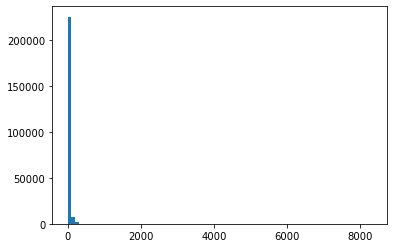

In [233]:
plt.hist(reads_per_cell, 83)

In [235]:
sorted(reads_per_cell, reverse=True)

[8321,
 8063,
 7609,
 7206,
 7107,
 7077,
 7025,
 6948,
 6761,
 6755,
 6737,
 6689,
 6580,
 6379,
 6326,
 6251,
 6220,
 6188,
 6151,
 6146,
 6096,
 6057,
 6054,
 6035,
 6026,
 6003,
 5957,
 5939,
 5932,
 5924,
 5921,
 5885,
 5866,
 5823,
 5804,
 5778,
 5740,
 5688,
 5678,
 5659,
 5643,
 5636,
 5635,
 5623,
 5614,
 5587,
 5585,
 5563,
 5530,
 5525,
 5511,
 5509,
 5506,
 5495,
 5495,
 5482,
 5478,
 5472,
 5459,
 5438,
 5434,
 5422,
 5420,
 5417,
 5412,
 5391,
 5387,
 5359,
 5341,
 5325,
 5305,
 5291,
 5270,
 5261,
 5236,
 5226,
 5224,
 5206,
 5197,
 5186,
 5184,
 5183,
 5176,
 5173,
 5165,
 5161,
 5149,
 5139,
 5137,
 5131,
 5110,
 5096,
 5092,
 5085,
 5082,
 5076,
 5075,
 5069,
 5055,
 5035,
 5033,
 5031,
 5029,
 5021,
 5013,
 5003,
 4997,
 4986,
 4980,
 4977,
 4972,
 4953,
 4950,
 4944,
 4938,
 4931,
 4929,
 4911,
 4895,
 4892,
 4891,
 4890,
 4882,
 4879,
 4873,
 4859,
 4852,
 4835,
 4833,
 4829,
 4814,
 4814,
 4811,
 4796,
 4794,
 4793,
 4789,
 4786,
 4778,
 4769,
 4756,
 4752,
 4750,

In [256]:
print(sum(read > 0 for read in reads_per_cell))
print(sum(read > 1 for read in reads_per_cell))
print(sum(read > 10 for read in reads_per_cell))
print(sum(read > 100 for read in reads_per_cell))
print(sum(read > 150 for read in reads_per_cell))
print(sum(read > 200 for read in reads_per_cell))
print(sum(read > 250 for read in reads_per_cell))
print(sum(read > 300 for read in reads_per_cell))
print(sum(read > 350 for read in reads_per_cell))
print(sum(read > 400 for read in reads_per_cell))
print(sum(read > 500 for read in reads_per_cell))
print(sum(read > 600 for read in reads_per_cell))
print(sum(read > 700 for read in reads_per_cell))
print(sum(read > 800 for read in reads_per_cell))
print(sum(read > 900 for read in reads_per_cell))
print(sum(read > 1000 for read in reads_per_cell))

236167
122121
26551
11061
7360
4047
2354
1944
1834
1773
1714
1678
1644
1606
1574
1552


In [29]:
reads_array = np.array(reads_per_cell)
mask = reads_array > 100
print(sum(reads_array[mask]))

6422617


In [31]:
print(sum(reads_array[mask]) / sum(reads_per_cell))

0.8645502879112025


In [44]:
error_count = 0
total_count = 0
cell_cutoff = 1
seqs = {}

with open(output_path + 'batch.batch', 'w') as f:
    f.write('name\tfastq_r1\tfastq_r2\n')

for i, seq in enumerate(f1000r1):
    total_count += 1
    bc1 = seq[1][:8]
    bc2 = seq[1][30:38]
    if bc1 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc1, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc1 = replacement[0]
        else:
            bc1 = ""
    if bc2 not in whitelist:
        ed_dis = []
        replacement = []
        for wl_seq in whitelist:
            ed = edlib.align(bc2, wl_seq)['editDistance']
            ed_dis += [ed]
            if ed == 1:
                replacement += [wl_seq]
        if len(replacement) == 1:
            bc2 = replacement[0]
        else:
            bc2 = ""
    ident = bc1 + bc2
    if len(ident) == 16:
        if ident in seqs:
            seqs[ident] += [(i, seq)]
        else:
            seqs[ident] = [(i, seq)]
    else:
        error_count += 1
print('error rate', error_count/total_count)

for cell in seqs:
    if len(seqs[cell]) > cell_cutoff:
        cell_filename_1 = output_path + cell + '_r1.txt'
        cell_filename_2 = output_path + cell + '_r2.txt'
        with open(cell_filename_1, 'a') as f1, open(cell_filename_2, 'a') as f2:
            for (i, seq) in seqs[cell]:
                for subline in seq:
                    f1.write(subline + '\n')
                for subline_2 in f1000r2[i]:
                    f2.write(subline_2 + '\n')
        with open(output_path + 'batch.batch', 'a') as f3:
            f3.write(cell + '\t' + cell + '_r1.txt' + '\t' + cell + '_r2.txt' + '\n')

KeyboardInterrupt: 

In [47]:
os.getcwd()

'/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis'

In [4]:
a = [x[0] for x in os.walk('/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/')]

In [5]:
print(len(a))

11062


In [71]:
a

['/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/',
 '/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/CRISPResso_on_AGCTGGTCGAATTAAC',
 '/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/CRISPResso_on_CCAGTAGAAATCTGCG',
 '/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/CRISPResso_on_AGTGTCAAAGTCATCC',
 '/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/CRISPResso_on_ACAGTGCTACACCAGA',
 '/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/CRISPResso_on_GTAATGGCACTTGTCA',
 '/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/CRISPResso_on_TGCATACTGAACGGAG',
 '/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/CRISPResso_on_TATGAGCTACGCCGCT',
 '/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/CRISPResso_on_ACAGGAGTGGAACAGC',
 '/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/CRISPResso_on

In [28]:
for x in os.walk('/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/'):
    if 'Indel_histogram.txt' in x[2]:
        print('yes')
        indel_path = x[0] + '/Indel_histogram.txt'
        indel_file = open(indel_path, 'r')
        print(len(indel_file.readlines())
        indel_file.close()

SyntaxError: invalid syntax (<ipython-input-28-72317c7d055e>, line 7)

In [39]:
indel_file = open(indel_path, 'r')
indel_file.close()

In [51]:
for line in open(indel_path, 'r'):
    a = line.split()
    for item in a:
        try:
            print(int(item))
        except:
            pass

-29
1
-28
0
-27
0
-26
0
-25
0
-24
0
-23
0
-22
0
-21
0
-20
0
-19
0
-18
0
-17
0
-16
0
-15
0
-14
0
-13
0
-12
0
-11
0
-10
0
-9
0
-8
0
-7
0
-6
0
-5
0
-4
0
-3
0
-2
0
-1
0
0
0
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
10
0
11
0
12
0
13
0
14
0
15
0


In [57]:
for line in open(indel_path, 'r'):
    print(line.split()[0])

indel_size
-29
-28
-27
-26
-25
-24
-23
-22
-21
-20
-19
-18
-17
-16
-15
-14
-13
-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


# Attempt full analysis in one script for quantitation cell indels

In [7]:
all_indels = []
for x in os.walk('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/AMP2_CRISPRessoBatch_on_nhej'):
    if 'Indel_histogram.txt' in x[2]:
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        for item in lines:
            try:
                if int(item[1]) != 0:
                    all_indels += [int(item[0])]
            except:
                pass

In [10]:
cells = 0
for x in os.walk('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/AMP2_CRISPRessoBatch_on_nhej'):
    if 'Indel_histogram.txt' in x[2]:
        cells += 1
print(cells)

4366


In [13]:
max(all_indels) - min(all_indels)

113

In [34]:
-min(all_indels)

52

In [ ]:
indel_matrix = np.zeros((4366,114))

In [25]:
indel_matrix = np.zeros((4366,114))
cell_number = 0
for x in os.walk('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/AMP2_CRISPRessoBatch_on_nhej'):
    if 'Indel_histogram.txt' in x[2]:
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        to_add = []
        for item in lines:
            try:
                if int(item[1]) != 0:
                    to_add += [item]
            except:
                pass
        for indel_size in to_add:
            c_index = int(indel_size[0]) + 52
            indel_matrix[cell_number, c_index] = int(indel_size[1])
        cell_number += 1

In [31]:
total_cells = 0
cell = 0
edited_cells = 0
unedited_cells = 0
ambiguous_cells = 0
edited_reads = 0
unedited_reads = 0
for row in indel_matrix:
    if sum(row) >= 5:
#        print(sum(row))
        indel = 0
        unedited = 0
        for edit_length in np.nonzero(row)[0]:
            if (edit_length - 52) != 0:
                indel += indel_matrix[(cell, edit_length)]
                edited_reads += indel_matrix[(cell, edit_length)]
            elif (edit_length - 52) == 0:
                unedited += indel_matrix[(cell, edit_length)]
                unedited_reads += indel_matrix[(cell, edit_length)]
#        print('edited', indel, indel/sum(row))
#        print('unedited', unedited, unedited/sum(row))
        if indel/sum(row) > 0.8:
#            print('cell is edited')
            edited_cells += 1
        elif unedited/sum(row) > 0.8:
#            print('cell is UNedited')
            unedited_cells += 1
        else:
#            print('cell may be heterozygous')
            ambiguous_cells += 1
#        print()
        total_cells += 1
 #       print()
    cell += 1

In [33]:
print('total qualified cells in expt', total_cells)
print('total unqualified cells', cell - total_cells)
print('total edited cells', edited_cells, edited_cells/total_cells)
print('total unedited cells', unedited_cells, unedited_cells/total_cells)
print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))

total qualified cells in expt 876
total unqualified cells 3490
total edited cells 587 0.6700913242009132
total unedited cells 128 0.1461187214611872
total 'heterozygous' cells 161 0.18378995433789955
percent edited reads 0.7328813559322034


In [59]:
CRISPResso_batch_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/AMP2_CRISPRessoBatch_on_nhej'
all_indels = []
cells = 0
for x in os.walk(CRISPResso_batch_path):
    if 'Indel_histogram.txt' in x[2]:
        cells += 1
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        for item in lines:
            try:
                if int(item[1]) != 0:
                    all_indels += [int(item[0])]
            except:
                pass

mat_rows = max(all_indels) - min(all_indels) + 1
indel_matrix = np.zeros((cells, mat_rows))
cell_number = 0
for x in os.walk(CRISPResso_batch_path):
    if 'Indel_histogram.txt' in x[2]:
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        to_add = []
        for item in lines:
            try:
                if int(item[1]) != 0:
                    to_add += [item]
            except:
                pass
        for indel_size in to_add:
            c_index = int(indel_size[0]) - min(all_indels)
            indel_matrix[cell_number, c_index] = int(indel_size[1])
        cell_number += 1
cell = 0
total_cells = 0
edited_cells = 0
unedited_cells = 0
ambiguous_cells = 0
edited_reads = 0
unedited_reads = 0
for row in indel_matrix:
    if sum(row) >= 5:
        indel = 0
        unedited = 0
        for edit_length in np.nonzero(row)[0]:
            if (edit_length + min(all_indels)) != 0:
                indel += indel_matrix[(cell, edit_length)]
                edited_reads += indel_matrix[(cell, edit_length)]
            elif (edit_length + min(all_indels)) == 0:
                unedited += indel_matrix[(cell, edit_length)]
                unedited_reads += indel_matrix[(cell, edit_length)]
        if indel/sum(row) > 0.8:
            edited_cells += 1
        elif unedited/sum(row) > 0.8:
            unedited_cells += 1
        else:
            ambiguous_cells += 1
        total_cells += 1
    cell += 1

print('total qualified cells in expt', total_cells)
print('total unqualified cells', cells - total_cells)
print('total edited cells', edited_cells, edited_cells/total_cells)
print('total unedited cells', unedited_cells, unedited_cells/total_cells)
print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))


total qualified cells in expt 876
total unqualified cells 3490
total edited cells 587 0.6700913242009132
total unedited cells 128 0.1461187214611872
total 'heterozygous' cells 161 0.18378995433789955
percent edited reads 0.7328813559322034


In [43]:
CRISPResso_batch_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/AMP31_CRISPRessoBatch_on_nhej'
all_indels = []
cells = 0
for x in os.walk(CRISPResso_batch_path):
    if 'Indel_histogram.txt' in x[2]:
        cells += 1
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        for item in lines:
            try:
                if int(item[1]) != 0:
                    all_indels += [int(item[0])]
            except:
                pass

mat_rows = max(all_indels) - min(all_indels) + 1
indel_matrix = np.zeros((cells, mat_rows))
cell_number = 0
for x in os.walk(CRISPResso_batch_path):
    if 'Indel_histogram.txt' in x[2]:
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        to_add = []
        for item in lines:
            try:
                if int(item[1]) != 0:
                    to_add += [item]
            except:
                pass
        for indel_size in to_add:
            c_index = int(indel_size[0]) - min(all_indels)
            indel_matrix[cell_number, c_index] = int(indel_size[1])
        cell_number += 1
cell = 0
total_cells = 0
edited_cells = 0
unedited_cells = 0
ambiguous_cells = 0
edited_reads = 0
unedited_reads = 0
for row in indel_matrix:
    if sum(row) >= 5:
        indel = 0
        unedited = 0
        for edit_length in np.nonzero(row)[0]:
            if (edit_length + min(all_indels)) != 0:
                indel += indel_matrix[(cell, edit_length)]
                edited_reads += indel_matrix[(cell, edit_length)]
            elif (edit_length + min(all_indels)) == 0:
                unedited += indel_matrix[(cell, edit_length)]
                unedited_reads += indel_matrix[(cell, edit_length)]
        if indel/sum(row) > 0.8:
            edited_cells += 1
        elif unedited/sum(row) > 0.8:
            unedited_cells += 1
        else:
            ambiguous_cells += 1
        total_cells += 1
    cell += 1

print('total qualified cells in expt', total_cells)
print('total unqualified cells', cells - total_cells)
print('total edited cells', edited_cells, edited_cells/total_cells)
print('total unedited cells', unedited_cells, unedited_cells/total_cells)
print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))


total qualified cells in expt 871
total unqualified cells 3391
total edited cells 0 0.0
total unedited cells 829 0.9517795637198623
total 'heterozygous' cells 42 0.04822043628013777
percent edited reads 0.04669749673268322


In [58]:
CRISPResso_batch_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test/MB_expt_1/individual_cells/CRISPResso_output/CRISPRessoBatch_on_batch_BSRI_HIV_AMP2'
all_indels = []
cells = 0
for x in os.walk(CRISPResso_batch_path):
    if 'Indel_histogram.txt' in x[2]:
        cells += 1
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        for item in lines:
            try:
                if int(item[1]) != 0:
                    all_indels += [int(item[0])]
            except:
                pass

mat_rows = max(all_indels) - min(all_indels) + 1
indel_matrix = np.zeros((cells, mat_rows))
cell_number = 0
for x in os.walk(CRISPResso_batch_path):
    if 'Indel_histogram.txt' in x[2]:
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        to_add = []
        for item in lines:
            try:
                if int(item[1]) != 0:
                    to_add += [item]
            except:
                pass
        for indel_size in to_add:
            c_index = int(indel_size[0]) - min(all_indels)
            indel_matrix[cell_number, c_index] = int(indel_size[1])
        cell_number += 1
cell = 0
total_cells = 0
edited_cells = 0
unedited_cells = 0
ambiguous_cells = 0
edited_reads = 0
unedited_reads = 0
for row in indel_matrix:
    if sum(row) >= 5:
        indel = 0
        unedited = 0
        for edit_length in np.nonzero(row)[0]:
            if (edit_length + min(all_indels)) != 0:
                indel += indel_matrix[(cell, edit_length)]
                edited_reads += indel_matrix[(cell, edit_length)]
            elif (edit_length + min(all_indels)) == 0:
                unedited += indel_matrix[(cell, edit_length)]
                unedited_reads += indel_matrix[(cell, edit_length)]
        if indel/sum(row) > 0.8:
            edited_cells += 1
        elif unedited/sum(row) > 0.8:
            unedited_cells += 1
        else:
            ambiguous_cells += 1
        total_cells += 1
    cell += 1

print('total qualified cells in expt', total_cells)
print('total unqualified cells', cells - total_cells)
print('total edited cells', edited_cells, edited_cells/total_cells)
print('total unedited cells', unedited_cells, unedited_cells/total_cells)
print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))


total qualified cells in expt 605
total unqualified cells 368
total edited cells 405 0.6694214876033058
total unedited cells 90 0.1487603305785124
total 'heterozygous' cells 110 0.18181818181818182
percent edited reads 0.734982332155477


In [71]:
CRISPResso_batch_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test/MB_expt_1/individual_cells/CRISPResso_output/CRISPRessoBatch_on_batch_BSRI_HIV_AMP31'
all_indels = []
cells = 0
for x in os.walk(CRISPResso_batch_path):
    if 'Indel_histogram.txt' in x[2]:
        cells += 1
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        for item in lines:
            try:
                if int(item[1]) != 0:
                    all_indels += [int(item[0])]
            except:
                pass

mat_rows = max(all_indels) - min(all_indels) + 1
indel_matrix = np.zeros((cells, mat_rows))
cell_number = 0
for x in os.walk(CRISPResso_batch_path):
    if 'Indel_histogram.txt' in x[2]:
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        to_add = []
        for item in lines:
            try:
                if int(item[1]) != 0:
                    to_add += [item]
            except:
                pass
        for indel_size in to_add:
            c_index = int(indel_size[0]) - min(all_indels)
            indel_matrix[cell_number, c_index] = int(indel_size[1])
        cell_number += 1
cell = 0
total_cells = 0
edited_cells = 0
unedited_cells = 0
ambiguous_cells = 0
edited_reads = 0
unedited_reads = 0
for row in indel_matrix:
    if sum(row) >= 5:
        indel = 0
        unedited = 0
        for edit_length in np.nonzero(row)[0]:
            if (edit_length + min(all_indels)) != 0:
                indel += indel_matrix[(cell, edit_length)]
                edited_reads += indel_matrix[(cell, edit_length)]
            elif (edit_length + min(all_indels)) == 0:
                unedited += indel_matrix[(cell, edit_length)]
                unedited_reads += indel_matrix[(cell, edit_length)]
        if indel/sum(row) > 0.8:
            edited_cells += 1
        elif unedited/sum(row) > 0.8:
            unedited_cells += 1
        else:
            ambiguous_cells += 1
        total_cells += 1
    cell += 1

print('total qualified cells in expt', total_cells)
print('total unqualified cells', cells - total_cells)
print('total edited cells', edited_cells, edited_cells/total_cells)
print('total unedited cells', unedited_cells, unedited_cells/total_cells)
print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))


total qualified cells in expt 690
total unqualified cells 444
total edited cells 0 0.0
total unedited cells 666 0.9652173913043478
total 'heterozygous' cells 24 0.034782608695652174
percent edited reads 0.045755429102311


In [80]:
sample_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test/MB_expt_1/individual_cells/CRISPResso_output/'
amp_list =[x[1] for x in os.walk(sample_path)][0]

In [82]:
sample_path + amp_list[0]

'/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test/MB_expt_1/individual_cells/CRISPResso_output/CRISPRessoBatch_on_batch_BSRI_HIV_AMP25'

In [86]:
sorted(amp_list)

['CRISPRessoBatch_on_batch_BSRI_HIV_AMP1',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP100',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP101',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP102',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP103',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP104',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP105',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP106',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP107',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP108',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP109',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP110',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP111',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP112',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP113',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP114',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP115',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP116',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP117',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP118',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP119',
 'CRISPRessoBatch_on_batch_BSRI_HIV_AMP120',
 'CRISPResso

In [91]:
for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_BSRI_HIV_AMP', '')))):
    print(amp)

CRISPRessoBatch_on_batch_BSRI_HIV_AMP1
CRISPRessoBatch_on_batch_BSRI_HIV_AMP2
CRISPRessoBatch_on_batch_BSRI_HIV_AMP3
CRISPRessoBatch_on_batch_BSRI_HIV_AMP4
CRISPRessoBatch_on_batch_BSRI_HIV_AMP23
CRISPRessoBatch_on_batch_BSRI_HIV_AMP24
CRISPRessoBatch_on_batch_BSRI_HIV_AMP25
CRISPRessoBatch_on_batch_BSRI_HIV_AMP26
CRISPRessoBatch_on_batch_BSRI_HIV_AMP27
CRISPRessoBatch_on_batch_BSRI_HIV_AMP28
CRISPRessoBatch_on_batch_BSRI_HIV_AMP30
CRISPRessoBatch_on_batch_BSRI_HIV_AMP31
CRISPRessoBatch_on_batch_BSRI_HIV_AMP32
CRISPRessoBatch_on_batch_BSRI_HIV_AMP33
CRISPRessoBatch_on_batch_BSRI_HIV_AMP35
CRISPRessoBatch_on_batch_BSRI_HIV_AMP36
CRISPRessoBatch_on_batch_BSRI_HIV_AMP37
CRISPRessoBatch_on_batch_BSRI_HIV_AMP38
CRISPRessoBatch_on_batch_BSRI_HIV_AMP39
CRISPRessoBatch_on_batch_BSRI_HIV_AMP40
CRISPRessoBatch_on_batch_BSRI_HIV_AMP41
CRISPRessoBatch_on_batch_BSRI_HIV_AMP42
CRISPRessoBatch_on_batch_BSRI_HIV_AMP43
CRISPRessoBatch_on_batch_BSRI_HIV_AMP44
CRISPRessoBatch_on_batch_BSRI_HIV_AMP45
CRIS

In [5]:
sample_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/MB_expt_1/individual_cells/new_CRISPResso_output/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cell_names = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            cells += 1
            cell_names += [x[0].replace(CRISPResso_batch_path + '/CRISPResso_on_', '')]
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass
    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    indel_sizes = list(range(min(all_indels), max(all_indels)+1))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    
    indel_df = pd.DataFrame(indel_matrix, index=cell_names, columns=indel_sizes)
    indel_df.to_csv(amp + '.csv', index=True, header=True, sep=',')

KeyboardInterrupt: 

In [6]:
sample_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/MB_expt_1/individual_cells/new_CRISPResso_output/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cell_names = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            cells += 1
            cell_names += [x[0].replace(CRISPResso_batch_path + '/CRISPResso_on_', '')]
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass
#    print(min(all_indels))
#    print(max(all_indels))
#    for num in range(min(all_indels), max(all_indels)):
#        print(num)
    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    cell = 0
    total_cells = 0
    edited_cells = 0
    unedited_cells = 0
    ambiguous_cells = 0
    edited_reads = 0
    unedited_reads = 0
    for row in indel_matrix:
        if sum(row) >= 5:
            indel = 0
            unedited = 0
            for edit_length in np.nonzero(row)[0]:
                if (edit_length + min(all_indels)) != 0:
                    indel += indel_matrix[(cell, edit_length)]
                    edited_reads += indel_matrix[(cell, edit_length)]
                elif (edit_length + min(all_indels)) == 0:
                    unedited += indel_matrix[(cell, edit_length)]
                    unedited_reads += indel_matrix[(cell, edit_length)]
            if indel/sum(row) > 0.8:
                edited_cells += 1
            elif unedited/sum(row) > 0.8:
                unedited_cells += 1
            else:
                ambiguous_cells += 1
            total_cells += 1
        cell += 1
    
    print(amp)
    if total_cells == 0:
        print('no qualified cells in expt')
    else:
        print('total qualified cells in expt', total_cells)
        print('total unqualified cells', cells - total_cells)
        print('total edited cells', edited_cells, edited_cells/total_cells)
        print('total unedited cells', unedited_cells, unedited_cells/total_cells)
        print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
        print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))
    print()
    


CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP1
total qualified cells in expt 509
total unqualified cells 2260
total edited cells 505 0.9921414538310412
total unedited cells 1 0.0019646365422396855
total 'heterozygous' cells 3 0.005893909626719057
percent edited reads 0.9931523022432114

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2
total qualified cells in expt 876
total unqualified cells 3490
total edited cells 587 0.6700913242009132
total unedited cells 128 0.1461187214611872
total 'heterozygous' cells 161 0.18378995433789955
percent edited reads 0.7328813559322034

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP3
no qualified cells in expt

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP4
total qualified cells in expt 2
total unqualified cells 2
total edited cells 2 1.0
total unedited cells 0 0.0
total 'heterozygous' cells 0 0.0
percent edited reads 1.0

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP23
total qualified cells in expt 553
total unqualified cells 1324
total edited cells 0 0.0
to

## Coediting occurence calculations

In [124]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)
common = amp1.index.intersection(amp2.index)
total_cells = 0

amp1bi_amp2bi = 0
amp1bi_amp2mono = 0
amp1bi_amp2unedited = 0
amp1mono_amp2bi = 0
amp1mono_amp2mono = 0
amp1mono_amp2unedited = 0
amp1unedited_amp2bi = 0
amp1unedited_amp2mono = 0
amp1unedited_amp2unedited = 0


for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                amp1bi_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1bi_amp2unedited += 1
            else:
                amp1bi_amp2mono += 1
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                amp1unedited_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1unedited_amp2unedited += 1
            else:
                amp1unedited_amp2mono += 1              
        else:
            if amp2_edit_percent >= 0.8:
                amp1mono_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1mono_amp2unedited += 1
            else:
                amp1mono_amp2mono += 1

print(f'''There are {total_cells} cells that contain sufficient reads at both loci.
      CXCR4 biallelic/CCR5 biallelic {amp1bi_amp2bi} {amp1bi_amp2bi/total_cells:.4f}
      CXCR4 biallelic/CCR5 monoallelic {amp1bi_amp2mono} {amp1bi_amp2mono/total_cells:.4f}
      CXCR4 biallelic/CCR5 unedited {amp1bi_amp2unedited} {amp1bi_amp2unedited/total_cells:.4f}
      
      CXCR4 monoallelic/CCR5 biallelic {amp1mono_amp2bi} {amp1mono_amp2bi/total_cells:.4f}
      CXCR4 monoallelic/CCR5 monoallelic {amp1mono_amp2mono} {amp1mono_amp2mono/total_cells:.4f}
      CXCR4 monoallelic/CCR5 unedited {amp1mono_amp2unedited} {amp1mono_amp2unedited/total_cells:.4f}
      
      CXCR4 unedited/CCR5 biallelic {amp1unedited_amp2bi} {amp1unedited_amp2bi/total_cells:.4f}
      CXCR4 unedited/CCR5 monoallelic {amp1unedited_amp2mono} {amp1unedited_amp2mono/total_cells:.4f}
      CXCR4 unedited/CCR5 unedited {amp1unedited_amp2unedited} {amp1unedited_amp2unedited/total_cells:.4f}''')


        
        
        
        

There are 1255 cells that contain sufficient reads at both loci.
      CXCR4 biallelic/CCR5 biallelic 97 0.0773
      CXCR4 biallelic/CCR5 monoallelic 225 0.1793
      CXCR4 biallelic/CCR5 unedited 275 0.2191
      
      CXCR4 monoallelic/CCR5 biallelic 13 0.0104
      CXCR4 monoallelic/CCR5 monoallelic 168 0.1339
      CXCR4 monoallelic/CCR5 unedited 288 0.2295
      
      CXCR4 unedited/CCR5 biallelic 8 0.0064
      CXCR4 unedited/CCR5 monoallelic 36 0.0287
      CXCR4 unedited/CCR5 unedited 145 0.1155


In [116]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP36.csv', sep = ',', header = 0, index_col = 0)

amp1_name = '5\'LTR'
amp2_name = '3\'LTR'

common = amp1.index.intersection(amp2.index)

total_cells = 0
amp1bi_amp2bi = 0
amp1bi_amp2mono = 0
amp1bi_amp2unedited = 0
amp1mono_amp2bi = 0
amp1mono_amp2mono = 0
amp1mono_amp2unedited = 0
amp1unedited_amp2bi = 0
amp1unedited_amp2mono = 0
amp1unedited_amp2unedited = 0


for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                amp1bi_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1bi_amp2unedited += 1
            else:
                amp1bi_amp2mono += 1
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                amp1unedited_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1unedited_amp2unedited += 1
            else:
                amp1unedited_amp2mono += 1              
        else:
            if amp2_edit_percent >= 0.8:
                amp1mono_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1mono_amp2unedited += 1
            else:
                amp1mono_amp2mono += 1

                
                
print(f'''There are {total_cells} cells that contain sufficient reads at both loci.
      {amp1_name} biallelic/{amp2_name} biallelic {amp1bi_amp2bi}
      {amp1_name} biallelic/{amp2_name} monoallelic {amp1bi_amp2mono}
      {amp1_name} biallelic/{amp2_name} unedited {amp1bi_amp2unedited}
      
      {amp1_name} monoallelic/{amp2_name} biallelic {amp1mono_amp2bi}
      {amp1_name} monoallelic/{amp2_name} monoallelic {amp1mono_amp2mono}
      {amp1_name} monoallelic/{amp2_name} unedited {amp1mono_amp2unedited}
      
      {amp1_name} unedited/{amp2_name} biallelic {amp1unedited_amp2bi}
      {amp1_name} unedited/{amp2_name} monoallelic {amp1unedited_amp2mono}
      {amp1_name} unedited/{amp2_name} unedited {amp1unedited_amp2unedited}''')


        

There are 876 cells that contain sufficient reads at both loci.
      5'LTR biallelic/3'LTR biallelic 576
      5'LTR biallelic/3'LTR monoallelic 9
      5'LTR biallelic/3'LTR unedited 4
      
      5'LTR monoallelic/3'LTR biallelic 154
      5'LTR monoallelic/3'LTR monoallelic 1
      5'LTR monoallelic/3'LTR unedited 0
      
      5'LTR unedited/3'LTR biallelic 132
      5'LTR unedited/3'LTR monoallelic 0
      5'LTR unedited/3'LTR unedited 0


In [117]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_name = '5\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common = (amp1.index.intersection(amp2.index)).intersection(amp3.index)

In [118]:
common

Index(['TATGAGCTACGCCGCT', 'GGCGATGCTCAACCAA', 'ATGGAGTTAGTAACTT',
       'GAGGATACGCATTATG', 'ACTCTCCTGAGCCGTT', 'ACGGTTACGAAGATGT',
       'TGACTTCACTCGCCTG', 'GGTCATGTGCGCTGGA', 'CGACGCGTTTCTAACC',
       'TAGCATTCCTACATTA',
       ...
       'GCCACGCGCATGGCTG', 'GCCATCATTAAGATCA', 'TATGCAAGGTATCCGG',
       'CGTATCATGCCGGCAG', 'ATCTTAGAATTCGCCG', 'TCTCTACAATAGTCTG',
       'CGCATTAGACGTCCTA', 'CGAGAATTTTAGGTTA', 'GACCTGACGGCAGGAG',
       'GACACTGGACTATAGT'],
      dtype='object', length=1505)

In [28]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_name = '5\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common = (amp1.index.intersection(amp2.index)).intersection(amp3.index)

total_cells = 0

amp1bi_amp2bi_amp3bi = 0
amp1bi_amp2mono_amp3bi = 0
amp1bi_amp2unedited_amp3bi = 0
amp1mono_amp2bi_amp3bi = 0
amp1mono_amp2mono_amp3bi = 0
amp1mono_amp2unedited_amp3bi = 0
amp1unedited_amp2bi_amp3bi = 0
amp1unedited_amp2mono_amp3bi = 0
amp1unedited_amp2unedited_amp3bi = 0

amp1bi_amp2bi_amp3mono = 0
amp1bi_amp2mono_amp3mono = 0
amp1bi_amp2unedited_amp3mono = 0
amp1mono_amp2bi_amp3mono = 0
amp1mono_amp2mono_amp3mono = 0
amp1mono_amp2unedited_amp3mono = 0
amp1unedited_amp2bi_amp3mono = 0
amp1unedited_amp2mono_amp3mono = 0
amp1unedited_amp2unedited_amp3mono = 0

amp1bi_amp2bi_amp3unedited = 0
amp1bi_amp2mono_amp3unedited = 0
amp1bi_amp2unedited_amp3unedited = 0
amp1mono_amp2bi_amp3unedited = 0
amp1mono_amp2mono_amp3unedited = 0
amp1mono_amp2unedited_amp3unedited = 0
amp1unedited_amp2bi_amp3unedited = 0
amp1unedited_amp2mono_amp3unedited = 0
amp1unedited_amp2unedited_amp3unedited = 0


for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5 and sum(amp3.loc[cell]) >= 5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3.loc[cell].index, amp3.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)

        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2bi_amp3unedited += 1
                else:
                    amp1bi_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2unedited_amp3unedited += 1
                else:
                    amp1bi_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2mono_amp3unedited += 1
                else:
                    amp1bi_amp2mono_amp3mono += 1                    
                    
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2bi_amp3unedited += 1
                else:
                    amp1unedited_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2unedited_amp3unedited += 1
                else:
                    amp1unedited_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2mono_amp3unedited += 1
                else:
                    amp1unedited_amp2mono_amp3mono += 1
                    
        else:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2bi_amp3unedited += 1
                else:
                    amp1mono_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2unedited_amp3unedited += 1
                else:
                    amp1mono_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2mono_amp3unedited += 1
                else:
                    amp1mono_amp2mono_amp3mono += 1                    


                
                
print(f'''There are {total_cells} cells that contain sufficient reads at both loci.
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1bi_amp2bi_amp3bi} {amp1bi_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1bi_amp2bi_amp3mono} {amp1bi_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1bi_amp2bi_amp3unedited} {amp1bi_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} biallelic {amp1bi_amp2mono_amp3bi} {amp1bi_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1bi_amp2mono_amp3mono} {amp1bi_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1bi_amp2mono_amp3unedited} {amp1bi_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1bi_amp2unedited_amp3bi} {amp1bi_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1bi_amp2unedited_amp3mono} {amp1bi_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} unedited {amp1bi_amp2unedited_amp3unedited} {amp1bi_amp2unedited_amp3unedited/total_cells:.4f}


      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1mono_amp2bi_amp3bi} {amp1mono_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1mono_amp2bi_amp3mono} {amp1mono_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1mono_amp2bi_amp3unedited} {amp1mono_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} biallelic  {amp1mono_amp2mono_amp3bi} {amp1mono_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1mono_amp2mono_amp3mono} {amp1mono_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1mono_amp2mono_amp3unedited} {amp1mono_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1mono_amp2unedited_amp3bi} {amp1mono_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1mono_amp2unedited_amp3mono} {amp1mono_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} unedited {amp1mono_amp2unedited_amp3unedited} {amp1mono_amp2unedited_amp3unedited/total_cells:.4f}
      
      
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} biallelic {amp1unedited_amp2bi_amp3bi} {amp1unedited_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} monoallelic {amp1unedited_amp2bi_amp3mono} {amp1unedited_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} unedited {amp1unedited_amp2bi_amp3unedited} {amp1unedited_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} biallelic {amp1unedited_amp2mono_amp3bi} {amp1unedited_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1unedited_amp2mono_amp3mono} {amp1unedited_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} unedited {amp1unedited_amp2mono_amp3unedited} {amp1unedited_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} biallelic {amp1unedited_amp2unedited_amp3bi} {amp1unedited_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} monoallelic {amp1unedited_amp2unedited_amp3mono} {amp1unedited_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} unedited {amp1unedited_amp2unedited_amp3unedited} {amp1unedited_amp2unedited_amp3unedited/total_cells:.4f}''')


        

There are 689 cells that contain sufficient reads at both loci.
      5'LTR biallelic/CXCR4 biallelic/CCR5 biallelic 33 0.0479
      5'LTR biallelic/CXCR4 biallelic/CCR5 monoallelic 94 0.1364
      5'LTR biallelic/CXCR4 biallelic/CCR5 unedited 97 0.1408
      
      5'LTR biallelic/CXCR4 monoallelic/CCR5 biallelic 1 0.0015
      5'LTR biallelic/CXCR4 monoallelic/CCR5 monoallelic 64 0.0929
      5'LTR biallelic/CXCR4 monoallelic/CCR5 unedited 109 0.1582

      5'LTR biallelic/CXCR4 unedited/CCR5 biallelic 3 0.0044
      5'LTR biallelic/CXCR4 unedited/CCR5 monoallelic 8 0.0116
      5'LTR biallelic/CXCR4 unedited/CCR5 unedited 38 0.0552


      5'LTR monoallelic/CXCR4 biallelic/CCR5 biallelic 3 0.0044
      5'LTR monoallelic/CXCR4 biallelic/CCR5 monoallelic 22 0.0319
      5'LTR monoallelic/CXCR4 biallelic/CCR5 unedited 18 0.0261
      
      5'LTR monoallelic/CXCR4 monoallelic/CCR5 biallelic  1 0.0015
      5'LTR monoallelic/CXCR4 monoallelic/CCR5 monoallelic 27 0.0392
      5'LTR monoa

In [137]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP36.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_name = '3\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common = (amp1.index.intersection(amp2.index)).intersection(amp3.index)

total_cells = 0

amp1bi_amp2bi_amp3bi = 0
amp1bi_amp2mono_amp3bi = 0
amp1bi_amp2unedited_amp3bi = 0
amp1mono_amp2bi_amp3bi = 0
amp1mono_amp2mono_amp3bi = 0
amp1mono_amp2unedited_amp3bi = 0
amp1unedited_amp2bi_amp3bi = 0
amp1unedited_amp2mono_amp3bi = 0
amp1unedited_amp2unedited_amp3bi = 0

amp1bi_amp2bi_amp3mono = 0
amp1bi_amp2mono_amp3mono = 0
amp1bi_amp2unedited_amp3mono = 0
amp1mono_amp2bi_amp3mono = 0
amp1mono_amp2mono_amp3mono = 0
amp1mono_amp2unedited_amp3mono = 0
amp1unedited_amp2bi_amp3mono = 0
amp1unedited_amp2mono_amp3mono = 0
amp1unedited_amp2unedited_amp3mono = 0

amp1bi_amp2bi_amp3unedited = 0
amp1bi_amp2mono_amp3unedited = 0
amp1bi_amp2unedited_amp3unedited = 0
amp1mono_amp2bi_amp3unedited = 0
amp1mono_amp2mono_amp3unedited = 0
amp1mono_amp2unedited_amp3unedited = 0
amp1unedited_amp2bi_amp3unedited = 0
amp1unedited_amp2mono_amp3unedited = 0
amp1unedited_amp2unedited_amp3unedited = 0


for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5 and sum(amp3.loc[cell]) >= 5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3.loc[cell].index, amp3.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)

        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2bi_amp3unedited += 1
                else:
                    amp1bi_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2unedited_amp3unedited += 1
                else:
                    amp1bi_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2mono_amp3unedited += 1
                else:
                    amp1bi_amp2mono_amp3mono += 1                    
                    
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2bi_amp3unedited += 1
                else:
                    amp1unedited_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2unedited_amp3unedited += 1
                else:
                    amp1unedited_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2mono_amp3unedited += 1
                else:
                    amp1unedited_amp2mono_amp3mono += 1
                    
        else:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2bi_amp3unedited += 1
                else:
                    amp1mono_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2unedited_amp3unedited += 1
                else:
                    amp1mono_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2mono_amp3unedited += 1
                else:
                    amp1mono_amp2mono_amp3mono += 1                    


                
                
print(f'''There are {total_cells} cells that contain sufficient reads at both loci.
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1bi_amp2bi_amp3bi} {amp1bi_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1bi_amp2bi_amp3mono} {amp1bi_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1bi_amp2bi_amp3unedited} {amp1bi_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} biallelic {amp1bi_amp2mono_amp3bi} {amp1bi_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1bi_amp2mono_amp3mono} {amp1bi_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1bi_amp2mono_amp3unedited} {amp1bi_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1bi_amp2unedited_amp3bi} {amp1bi_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1bi_amp2unedited_amp3mono} {amp1bi_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} unedited {amp1bi_amp2unedited_amp3unedited} {amp1bi_amp2unedited_amp3unedited/total_cells:.4f}


      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1mono_amp2bi_amp3bi} {amp1mono_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1mono_amp2bi_amp3mono} {amp1mono_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1mono_amp2bi_amp3unedited} {amp1mono_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} biallelic  {amp1mono_amp2mono_amp3bi} {amp1mono_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1mono_amp2mono_amp3mono} {amp1mono_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1mono_amp2mono_amp3unedited} {amp1mono_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1mono_amp2unedited_amp3bi} {amp1mono_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1mono_amp2unedited_amp3mono} {amp1mono_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} unedited {amp1mono_amp2unedited_amp3unedited} {amp1mono_amp2unedited_amp3unedited/total_cells:.4f}
      
      
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} biallelic {amp1unedited_amp2bi_amp3bi} {amp1unedited_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} monoallelic {amp1unedited_amp2bi_amp3mono} {amp1unedited_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} unedited {amp1unedited_amp2bi_amp3unedited} {amp1unedited_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} biallelic {amp1unedited_amp2mono_amp3bi} {amp1unedited_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1unedited_amp2mono_amp3mono} {amp1unedited_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} unedited {amp1unedited_amp2mono_amp3unedited} {amp1unedited_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} biallelic {amp1unedited_amp2unedited_amp3bi} {amp1unedited_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} monoallelic {amp1unedited_amp2unedited_amp3mono} {amp1unedited_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} unedited {amp1unedited_amp2unedited_amp3unedited} {amp1unedited_amp2unedited_amp3unedited/total_cells:.4f}''')


        

There are 689 cells that contain sufficient reads at both loci.
      3'LTR biallelic/CXCR4 biallelic/CCR5 biallelic 42 0.0610
      3'LTR biallelic/CXCR4 biallelic/CCR5 monoallelic 128 0.1858
      3'LTR biallelic/CXCR4 biallelic/CCR5 unedited 125 0.1814
      
      3'LTR biallelic/CXCR4 monoallelic/CCR5 biallelic 4 0.0058
      3'LTR biallelic/CXCR4 monoallelic/CCR5 monoallelic 109 0.1582
      3'LTR biallelic/CXCR4 monoallelic/CCR5 unedited 171 0.2482

      3'LTR biallelic/CXCR4 unedited/CCR5 biallelic 4 0.0058
      3'LTR biallelic/CXCR4 unedited/CCR5 monoallelic 17 0.0247
      3'LTR biallelic/CXCR4 unedited/CCR5 unedited 81 0.1176


      3'LTR monoallelic/CXCR4 biallelic/CCR5 biallelic 0 0.0000
      3'LTR monoallelic/CXCR4 biallelic/CCR5 monoallelic 0 0.0000
      3'LTR monoallelic/CXCR4 biallelic/CCR5 unedited 2 0.0029
      
      3'LTR monoallelic/CXCR4 monoallelic/CCR5 biallelic  0 0.0000
      3'LTR monoallelic/CXCR4 monoallelic/CCR5 monoallelic 1 0.0015
      3'LTR mono

## coediting in tube 2

In [8]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)
common = amp1.index.intersection(amp2.index)
total_cells = 0

amp1bi_amp2bi = 0
amp1bi_amp2mono = 0
amp1bi_amp2unedited = 0
amp1mono_amp2bi = 0
amp1mono_amp2mono = 0
amp1mono_amp2unedited = 0
amp1unedited_amp2bi = 0
amp1unedited_amp2mono = 0
amp1unedited_amp2unedited = 0


for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                amp1bi_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1bi_amp2unedited += 1
            else:
                amp1bi_amp2mono += 1
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                amp1unedited_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1unedited_amp2unedited += 1
            else:
                amp1unedited_amp2mono += 1              
        else:
            if amp2_edit_percent >= 0.8:
                amp1mono_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1mono_amp2unedited += 1
            else:
                amp1mono_amp2mono += 1

print(f'''There are {total_cells} cells that contain sufficient reads at both loci.
      CXCR4 biallelic/CCR5 biallelic {amp1bi_amp2bi} {amp1bi_amp2bi/total_cells:.4f}
      CXCR4 biallelic/CCR5 monoallelic {amp1bi_amp2mono} {amp1bi_amp2mono/total_cells:.4f}
      CXCR4 biallelic/CCR5 unedited {amp1bi_amp2unedited} {amp1bi_amp2unedited/total_cells:.4f}
      
      CXCR4 monoallelic/CCR5 biallelic {amp1mono_amp2bi} {amp1mono_amp2bi/total_cells:.4f}
      CXCR4 monoallelic/CCR5 monoallelic {amp1mono_amp2mono} {amp1mono_amp2mono/total_cells:.4f}
      CXCR4 monoallelic/CCR5 unedited {amp1mono_amp2unedited} {amp1mono_amp2unedited/total_cells:.4f}
      
      CXCR4 unedited/CCR5 biallelic {amp1unedited_amp2bi} {amp1unedited_amp2bi/total_cells:.4f}
      CXCR4 unedited/CCR5 monoallelic {amp1unedited_amp2mono} {amp1unedited_amp2mono/total_cells:.4f}
      CXCR4 unedited/CCR5 unedited {amp1unedited_amp2unedited} {amp1unedited_amp2unedited/total_cells:.4f}''')


        
        
        
        

There are 1560 cells that contain sufficient reads at both loci.
      CXCR4 biallelic/CCR5 biallelic 160 0.1026
      CXCR4 biallelic/CCR5 monoallelic 277 0.1776
      CXCR4 biallelic/CCR5 unedited 284 0.1821
      
      CXCR4 monoallelic/CCR5 biallelic 28 0.0179
      CXCR4 monoallelic/CCR5 monoallelic 203 0.1301
      CXCR4 monoallelic/CCR5 unedited 377 0.2417
      
      CXCR4 unedited/CCR5 biallelic 7 0.0045
      CXCR4 unedited/CCR5 monoallelic 41 0.0263
      CXCR4 unedited/CCR5 unedited 183 0.1173


In [10]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_name = '5\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common = (amp1.index.intersection(amp2.index)).intersection(amp3.index)

total_cells = 0

amp1bi_amp2bi_amp3bi = 0
amp1bi_amp2mono_amp3bi = 0
amp1bi_amp2unedited_amp3bi = 0
amp1mono_amp2bi_amp3bi = 0
amp1mono_amp2mono_amp3bi = 0
amp1mono_amp2unedited_amp3bi = 0
amp1unedited_amp2bi_amp3bi = 0
amp1unedited_amp2mono_amp3bi = 0
amp1unedited_amp2unedited_amp3bi = 0

amp1bi_amp2bi_amp3mono = 0
amp1bi_amp2mono_amp3mono = 0
amp1bi_amp2unedited_amp3mono = 0
amp1mono_amp2bi_amp3mono = 0
amp1mono_amp2mono_amp3mono = 0
amp1mono_amp2unedited_amp3mono = 0
amp1unedited_amp2bi_amp3mono = 0
amp1unedited_amp2mono_amp3mono = 0
amp1unedited_amp2unedited_amp3mono = 0

amp1bi_amp2bi_amp3unedited = 0
amp1bi_amp2mono_amp3unedited = 0
amp1bi_amp2unedited_amp3unedited = 0
amp1mono_amp2bi_amp3unedited = 0
amp1mono_amp2mono_amp3unedited = 0
amp1mono_amp2unedited_amp3unedited = 0
amp1unedited_amp2bi_amp3unedited = 0
amp1unedited_amp2mono_amp3unedited = 0
amp1unedited_amp2unedited_amp3unedited = 0


for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5 and sum(amp3.loc[cell]) >= 5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3.loc[cell].index, amp3.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)

        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2bi_amp3unedited += 1
                else:
                    amp1bi_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2unedited_amp3unedited += 1
                else:
                    amp1bi_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2mono_amp3unedited += 1
                else:
                    amp1bi_amp2mono_amp3mono += 1                    
                    
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2bi_amp3unedited += 1
                else:
                    amp1unedited_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2unedited_amp3unedited += 1
                else:
                    amp1unedited_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2mono_amp3unedited += 1
                else:
                    amp1unedited_amp2mono_amp3mono += 1
                    
        else:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2bi_amp3unedited += 1
                else:
                    amp1mono_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2unedited_amp3unedited += 1
                else:
                    amp1mono_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2mono_amp3unedited += 1
                else:
                    amp1mono_amp2mono_amp3mono += 1                    


                
                
print(f'''There are {total_cells} cells that contain sufficient reads at all loci.
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1bi_amp2bi_amp3bi} {amp1bi_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1bi_amp2bi_amp3mono} {amp1bi_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1bi_amp2bi_amp3unedited} {amp1bi_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} biallelic {amp1bi_amp2mono_amp3bi} {amp1bi_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1bi_amp2mono_amp3mono} {amp1bi_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1bi_amp2mono_amp3unedited} {amp1bi_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1bi_amp2unedited_amp3bi} {amp1bi_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1bi_amp2unedited_amp3mono} {amp1bi_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} unedited {amp1bi_amp2unedited_amp3unedited} {amp1bi_amp2unedited_amp3unedited/total_cells:.4f}


      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1mono_amp2bi_amp3bi} {amp1mono_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1mono_amp2bi_amp3mono} {amp1mono_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1mono_amp2bi_amp3unedited} {amp1mono_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} biallelic  {amp1mono_amp2mono_amp3bi} {amp1mono_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1mono_amp2mono_amp3mono} {amp1mono_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1mono_amp2mono_amp3unedited} {amp1mono_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1mono_amp2unedited_amp3bi} {amp1mono_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1mono_amp2unedited_amp3mono} {amp1mono_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} unedited {amp1mono_amp2unedited_amp3unedited} {amp1mono_amp2unedited_amp3unedited/total_cells:.4f}
      
      
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} biallelic {amp1unedited_amp2bi_amp3bi} {amp1unedited_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} monoallelic {amp1unedited_amp2bi_amp3mono} {amp1unedited_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} unedited {amp1unedited_amp2bi_amp3unedited} {amp1unedited_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} biallelic {amp1unedited_amp2mono_amp3bi} {amp1unedited_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1unedited_amp2mono_amp3mono} {amp1unedited_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} unedited {amp1unedited_amp2mono_amp3unedited} {amp1unedited_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} biallelic {amp1unedited_amp2unedited_amp3bi} {amp1unedited_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} monoallelic {amp1unedited_amp2unedited_amp3mono} {amp1unedited_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} unedited {amp1unedited_amp2unedited_amp3unedited} {amp1unedited_amp2unedited_amp3unedited/total_cells:.4f}''')


        

There are 970 cells that contain sufficient reads at all loci.
      5'LTR biallelic/CXCR4 biallelic/CCR5 biallelic 71 0.0732
      5'LTR biallelic/CXCR4 biallelic/CCR5 monoallelic 125 0.1289
      5'LTR biallelic/CXCR4 biallelic/CCR5 unedited 115 0.1186
      
      5'LTR biallelic/CXCR4 monoallelic/CCR5 biallelic 18 0.0186
      5'LTR biallelic/CXCR4 monoallelic/CCR5 monoallelic 87 0.0897
      5'LTR biallelic/CXCR4 monoallelic/CCR5 unedited 148 0.1526

      5'LTR biallelic/CXCR4 unedited/CCR5 biallelic 2 0.0021
      5'LTR biallelic/CXCR4 unedited/CCR5 monoallelic 23 0.0237
      5'LTR biallelic/CXCR4 unedited/CCR5 unedited 67 0.0691


      5'LTR monoallelic/CXCR4 biallelic/CCR5 biallelic 8 0.0082
      5'LTR monoallelic/CXCR4 biallelic/CCR5 monoallelic 25 0.0258
      5'LTR monoallelic/CXCR4 biallelic/CCR5 unedited 29 0.0299
      
      5'LTR monoallelic/CXCR4 monoallelic/CCR5 biallelic  3 0.0031
      5'LTR monoallelic/CXCR4 monoallelic/CCR5 monoallelic 39 0.0402
      5'LTR mo

In [11]:
amp1

,-53,-52,-51,-50,-49,-48,-47,-46,-45,-44,...,52,53,54,55,56,57,58,59,60,61
TGGCGTAAAACCAGCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GATATTCACGATGTAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTAGGTTATGTTGCAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGCACAACGCCTCGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGCCGGATGTAGCGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAACGGTCTCGCTTCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTTAATGTTTGAGTGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGCATTAGACGTCCTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACGTGATCATGTTCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
amp1_1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp1_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)

In [18]:
amp1_1

,-52,-51,-50,-49,-48,-47,-46,-45,-44,-43,...,65,66,67,68,69,70,71,72,73,74
AGTGTCAAAGTCATCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGCATACTGAACGGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TATGAGCTACGCCGCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GGCGATGCTCAACCAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGTTCAGCCATTACTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGCATTAGACGTCCTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGAGAATTTTAGGTTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GACCTGACGGCAGGAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GACACTGGACTATAGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
amp1_2

,-53,-52,-51,-50,-49,-48,-47,-46,-45,-44,...,52,53,54,55,56,57,58,59,60,61
TGGCGTAAAACCAGCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GATATTCACGATGTAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTAGGTTATGTTGCAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGCACAACGCCTCGC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGCCGGATGTAGCGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAACGGTCTCGCTTCC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTTAATGTTTGAGTGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGCATTAGACGTCCTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACGTGATCATGTTCT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
amp1_1.join(amp1_2, lsuffix = 'l', rsuffix = 'r', how='inner')

,-52l,-51l,-50l,-49l,-48l,-47l,-46l,-45l,-44l,-43l,...,52r,53r,54r,55r,56r,57r,58r,59r,60r,61r
GCCGGCAGTCTCTGGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GATGTGGTATGGACAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATCTTGTGCGACTGTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTAGAGGACTGCGACG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGCAGCAAACTTGCTC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AACGCTCGCCGCCTGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GATGCTATAGACAGTG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CGAGAATTTTGTGAGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGCCGTCAACATCTAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAGTCTATTTCTACGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
print(sum(amp1.loc['GTAATGGCACTTGTCA']) >= 5 and sum(amp2.loc['GTAATGGCACTTGTCA']) >= 5)
edited_reads = 0
unedited_reads = 0
for edit_length, count in zip(amp1.loc['GTAATGGCACTTGTCA'].index, amp1.loc['GTAATGGCACTTGTCA']):
    if int(edit_length) != 0:
        edited_reads += count
    elif int(edit_length) == 0:
        unedited_reads += count
print('reads with edits', edited_reads)
print('reads with no edits', unedited_reads)

True
reads with edits 34.0
reads with no edits 18.0


In [68]:
for indel_size in amp1.loc['GTAATGGCACTTGTCA']:
    print(indel_size)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
30.0
0.0
18.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [16]:
sample_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/MB_expt_1/individual_cells/new_CRISPResso_output/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            cells += 1
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass

    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    cell = 0
    total_cells = 0
    edited_cells = 0
    unedited_cells = 0
    ambiguous_cells = 0
    edited_reads = 0
    unedited_reads = 0
    for row in indel_matrix:
        if sum(row) >= 5:
            indel = 0
            unedited = 0
            for edit_length in np.nonzero(row)[0]:
                if (edit_length + min(all_indels)) != 0:
                    indel += indel_matrix[(cell, edit_length)]
                    edited_reads += indel_matrix[(cell, edit_length)]
                elif (edit_length + min(all_indels)) == 0:
                    unedited += indel_matrix[(cell, edit_length)]
                    unedited_reads += indel_matrix[(cell, edit_length)]
            if indel/sum(row) > 0.8:
                edited_cells += 1
            elif unedited/sum(row) > 0.8:
                unedited_cells += 1
            else:
                ambiguous_cells += 1
            total_cells += 1
        cell += 1
    
    print(amp)
    if total_cells == 0:
        print('no qualified cells in expt')
    else:
        print('total qualified cells in expt', total_cells)
        print('total unqualified cells', cells - total_cells)
        print('total edited cells', edited_cells, edited_cells/total_cells)
        print('total unedited cells', unedited_cells, unedited_cells/total_cells)
        print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
        print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))
    print()
    


CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP1
total qualified cells in expt 509
total unqualified cells 2260
total edited cells 505 0.9921414538310412
total unedited cells 1 0.0019646365422396855
total 'heterozygous' cells 3 0.005893909626719057
percent edited reads 0.9931523022432114

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2
total qualified cells in expt 876
total unqualified cells 3490
total edited cells 587 0.6700913242009132
total unedited cells 128 0.1461187214611872
total 'heterozygous' cells 161 0.18378995433789955
percent edited reads 0.7328813559322034

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP3
no qualified cells in expt

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP35
total qualified cells in expt 509
total unqualified cells 2267
total edited cells 509 1.0
total unedited cells 0 0.0
total 'heterozygous' cells 0 0.0
percent edited reads 1.0

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP36
total qualified cells in expt 877
total unqualified cells 3498
total edited cells 861 0.9817559863169898
total unedited cells 4 0.004561003420752566
total 'heterozygous' cells 12 0.013683010262257697
percent edited reads 0.9881516587677726

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55
total qualified cells in expt 1956
total unqualified cells 6368
total edited cells 833 0.42586912065439675
total unedited cells 21

ValueError: max() arg is an empty sequence

In [5]:
sample_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test2/MB_expt_1/individual_cells/CRISPResso_output/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            cells += 1
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass

    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    cell = 0
    total_cells = 0
    edited_cells = 0
    unedited_cells = 0
    ambiguous_cells = 0
    edited_reads = 0
    unedited_reads = 0
    for row in indel_matrix:
        if sum(row) >= 5:
            indel = 0
            unedited = 0
            for edit_length in np.nonzero(row)[0]:
                if (edit_length + min(all_indels)) != 0:
                    indel += indel_matrix[(cell, edit_length)]
                    edited_reads += indel_matrix[(cell, edit_length)]
                elif (edit_length + min(all_indels)) == 0:
                    unedited += indel_matrix[(cell, edit_length)]
                    unedited_reads += indel_matrix[(cell, edit_length)]
            if indel/sum(row) > 0.8:
                edited_cells += 1
            elif unedited/sum(row) > 0.8:
                unedited_cells += 1
            else:
                ambiguous_cells += 1
            total_cells += 1
        cell += 1
    
    print(amp)
    if total_cells == 0:
        print('no qualified cells in expt')
    else:
        print('total qualified cells in expt', total_cells)
        print('total unqualified cells', cells - total_cells)
        print('total edited cells', edited_cells, edited_cells/total_cells)
        print('total unedited cells', unedited_cells, unedited_cells/total_cells)
        print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
        print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))
    print()


CRISPRessoBatch_on_batch_BSRI_HIV_AMP2
total qualified cells in expt 876
total unqualified cells 3490
total edited cells 587 0.6700913242009132
total unedited cells 128 0.1461187214611872
total 'heterozygous' cells 161 0.18378995433789955
percent edited reads 0.7328813559322034

CRISPRessoBatch_on_batch_BSRI_HIV_AMP3
no qualified cells in expt

CRISPRessoBatch_on_batch_BSRI_HIV_AMP55
total qualified cells in expt 1260
total unqualified cells 691
total edited cells 605 0.4801587301587302
total unedited cells 170 0.1349206349206349
total 'heterozygous' cells 485 0.38492063492063494
percent edited reads 0.6563246674512321

CRISPRessoBatch_on_batch_BSRI_HIV_AMP58
total qualified cells in expt 1217
total unqualified cells 438
total edited cells 119 0.09778142974527526
total unedited cells 659 0.5414954806902219
total 'heterozygous' cells 439 0.3607230895645029
percent edited reads 0.2539523539915509



In [92]:
sample_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test/MB_expt_1/individual_cells/CRISPResso_output/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            cells += 1
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass

    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    cell = 0
    total_cells = 0
    edited_cells = 0
    unedited_cells = 0
    ambiguous_cells = 0
    edited_reads = 0
    unedited_reads = 0
    for row in indel_matrix:
        if sum(row) >= 5:
            indel = 0
            unedited = 0
            for edit_length in np.nonzero(row)[0]:
                if (edit_length + min(all_indels)) != 0:
                    indel += indel_matrix[(cell, edit_length)]
                    edited_reads += indel_matrix[(cell, edit_length)]
                elif (edit_length + min(all_indels)) == 0:
                    unedited += indel_matrix[(cell, edit_length)]
                    unedited_reads += indel_matrix[(cell, edit_length)]
            if indel/sum(row) > 0.8:
                edited_cells += 1
            elif unedited/sum(row) > 0.8:
                unedited_cells += 1
            else:
                ambiguous_cells += 1
            total_cells += 1
        cell += 1
    
    print(amp)
    if total_cells == 0:
        print('no qualified cells in expt')
        print('total unqualified cells', cells - total_cells)
    else:
        print('total qualified cells in expt', total_cells)
        print('total unqualified cells', cells - total_cells)
        print('total edited cells', edited_cells, edited_cells/total_cells)
        print('total unedited cells', unedited_cells, unedited_cells/total_cells)
        print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
        print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))
    print()


CRISPRessoBatch_on_batch_BSRI_HIV_AMP1
total qualified cells in expt 483
total unqualified cells 781
total edited cells 480 0.9937888198757764
total unedited cells 0 0.0
total 'heterozygous' cells 3 0.006211180124223602
percent edited reads 0.9941234084231146

CRISPRessoBatch_on_batch_BSRI_HIV_AMP2
total qualified cells in expt 605
total unqualified cells 368
total edited cells 405 0.6694214876033058
total unedited cells 90 0.1487603305785124
total 'heterozygous' cells 110 0.18181818181818182
percent edited reads 0.734982332155477

CRISPRessoBatch_on_batch_BSRI_HIV_AMP3
no qualified cells in expt

CRISPRessoBatch_on_batch_BSRI_HIV_AMP4
total qualified cells in expt 2
total unqualified cells 2
total edited cells 2 1.0
total unedited cells 0 0.0
total 'heterozygous' cells 0 0.0
percent edited reads 1.0

CRISPRessoBatch_on_batch_BSRI_HIV_AMP23
total qualified cells in expt 518
total unqualified cells 404
total edited cells 518 1.0
total unedited cells 0 0.0
total 'heterozygous' cells 0 0.

CRISPRessoBatch_on_batch_BSRI_HIV_AMP59
total qualified cells in expt 1044
total unqualified cells 248
total edited cells 0 0.0
total unedited cells 1039 0.9952107279693486
total 'heterozygous' cells 5 0.004789272030651341
percent edited reads 0.03200146851863183

CRISPRessoBatch_on_batch_BSRI_HIV_AMP60
total qualified cells in expt 982
total unqualified cells 362
total edited cells 0 0.0
total unedited cells 920 0.9368635437881874
total 'heterozygous' cells 62 0.06313645621181263
percent edited reads 0.05670315200395029

CRISPRessoBatch_on_batch_BSRI_HIV_AMP61
total qualified cells in expt 1110
total unqualified cells 374
total edited cells 0 0.0
total unedited cells 1098 0.9891891891891892
total 'heterozygous' cells 12 0.010810810810810811
percent edited reads 0.030418103615298175

CRISPRessoBatch_on_batch_BSRI_HIV_AMP62
total qualified cells in expt 839
total unqualified cells 229
total edited cells 0 0.0
total unedited cells 830 0.9892729439809297
total 'heterozygous' cells 9 0.010

CRISPRessoBatch_on_batch_BSRI_HIV_AMP97
total qualified cells in expt 1066
total unqualified cells 305
total edited cells 0 0.0
total unedited cells 1063 0.9971857410881801
total 'heterozygous' cells 3 0.0028142589118198874
percent edited reads 0.02666585861034514

CRISPRessoBatch_on_batch_BSRI_HIV_AMP98
total qualified cells in expt 413
total unqualified cells 580
total edited cells 0 0.0
total unedited cells 387 0.937046004842615
total 'heterozygous' cells 26 0.06295399515738499
percent edited reads 0.03389283408650742

CRISPRessoBatch_on_batch_BSRI_HIV_AMP99
total qualified cells in expt 1164
total unqualified cells 249
total edited cells 0 0.0
total unedited cells 1141 0.9802405498281787
total 'heterozygous' cells 23 0.019759450171821305
percent edited reads 0.04721423511272242

CRISPRessoBatch_on_batch_BSRI_HIV_AMP100
total qualified cells in expt 376
total unqualified cells 467
total edited cells 0 0.0
total unedited cells 327 0.8696808510638298
total 'heterozygous' cells 49 0.13

## final(ish) analysis of MB expt (tubes 1&2)

In [15]:
sample_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/MB_expt_1/individual_cells/new_CRISPResso_output/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            cells += 1
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass

    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    cell = 0
    total_cells = 0
    edited_cells = 0
    unedited_cells = 0
    ambiguous_cells = 0
    edited_reads = 0
    unedited_reads = 0
    for row in indel_matrix:
        if sum(row) >= 5:
            indel = 0
            unedited = 0
            for edit_length in np.nonzero(row)[0]:
                if (edit_length + min(all_indels)) != 0:
                    indel += indel_matrix[(cell, edit_length)]
                    edited_reads += indel_matrix[(cell, edit_length)]
                elif (edit_length + min(all_indels)) == 0:
                    unedited += indel_matrix[(cell, edit_length)]
                    unedited_reads += indel_matrix[(cell, edit_length)]
            if indel/sum(row) > 0.8:
                edited_cells += 1
            elif unedited/sum(row) > 0.8:
                unedited_cells += 1
            else:
                ambiguous_cells += 1
            total_cells += 1
        cell += 1
    
    print(amp)
    if total_cells == 0:
        print('no qualified cells in expt')
    else:
        print('total qualified cells in expt', total_cells)
        print('total unqualified cells', cells - total_cells)
        print('total edited cells', edited_cells, edited_cells/total_cells)
        print('total unedited cells', unedited_cells, unedited_cells/total_cells)
        print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
        print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))
    print()
    


CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP1
total qualified cells in expt 509
total unqualified cells 2260
total edited cells 505 0.9921414538310412
total unedited cells 1 0.0019646365422396855
total 'heterozygous' cells 3 0.005893909626719057
percent edited reads 0.9931523022432114

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2
total qualified cells in expt 876
total unqualified cells 3490
total edited cells 587 0.6700913242009132
total unedited cells 128 0.1461187214611872
total 'heterozygous' cells 161 0.18378995433789955
percent edited reads 0.7328813559322034

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP3
no qualified cells in expt

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP4
total qualified cells in expt 2
total unqualified cells 2
total edited cells 2 1.0
total unedited cells 0 0.0
total 'heterozygous' cells 0 0.0
percent edited reads 1.0

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP23
total qualified cells in expt 553
total unqualified cells 1324
total edited cells 0 0.0
to

In [17]:
sample_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/MB_expt_1/individual_cells/new_CRISPResso_output/'
amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            cells += 1
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass

    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    cell = 0
    total_cells = 0
    edited_cells = 0
    unedited_cells = 0
    ambiguous_cells = 0
    edited_reads = 0
    unedited_reads = 0
    for row in indel_matrix:
        if sum(row) >= 5:
            indel = 0
            unedited = 0
            for edit_length in np.nonzero(row)[0]:
                if (edit_length + min(all_indels)) != 0:
                    indel += indel_matrix[(cell, edit_length)]
                    edited_reads += indel_matrix[(cell, edit_length)]
                elif (edit_length + min(all_indels)) == 0:
                    unedited += indel_matrix[(cell, edit_length)]
                    unedited_reads += indel_matrix[(cell, edit_length)]
            if indel/sum(row) > 0.8:
                edited_cells += 1
            elif unedited/sum(row) > 0.8:
                unedited_cells += 1
            else:
                ambiguous_cells += 1
            total_cells += 1
        cell += 1
    
    print(amp)
    if total_cells == 0:
        print('no qualified cells in expt')
    else:
        print('total qualified cells in expt', total_cells)
        print('total unqualified cells', cells - total_cells)
        print('total edited cells', edited_cells, edited_cells/total_cells)
        print('total unedited cells', unedited_cells, unedited_cells/total_cells)
        print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)
        print('percent edited reads', (edited_reads / (edited_reads + unedited_reads)))
    print()
    



CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP1
total qualified cells in expt 1379
total unqualified cells 2673
total edited cells 1376 0.9978245105148659
total unedited cells 0 0.0
total 'heterozygous' cells 3 0.002175489485134155
percent edited reads 0.9985282312014985

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2
total qualified cells in expt 1267
total unqualified cells 2659
total edited cells 865 0.6827150749802684
total unedited cells 166 0.13101815311760062
total 'heterozygous' cells 236 0.186266771902131
percent edited reads 0.7728190460166569

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP3
total qualified cells in expt 4
total unqualified cells 8
total edited cells 4 1.0
total unedited cells 0 0.0
total 'heterozygous' cells 0 0.0
percent edited reads 1.0

CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP4
total qualified cells in expt 1
total unqualified cells 11
total edited cells 1 1.0
total unedited cells 0 0.0
total 'heterozygous' cells 0 0.0
percent edited reads 1.0

CRISPRessoB

In [6]:
sample_path = '/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/MB_expt_1/individual_cells/new_CRISPResso_output/'

amp_list =[x[1] for x in os.walk(sample_path)][0]
sample_path + amp_list[0]

for amp in sorted(amp_list, key = lambda item: (int(item.replace('CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP', '')))):
    CRISPResso_batch_path = sample_path + amp
    all_indels = []
    cell_names = []
    cells = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            cells += 1
            cell_names += [x[0].replace(CRISPResso_batch_path + '/CRISPResso_on_', '')]
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        all_indels += [int(item[0])]
                except:
                    pass
    mat_rows = max(all_indels) - min(all_indels) + 1
    indel_matrix = np.zeros((cells, mat_rows))
    indel_sizes = list(range(min(all_indels), max(all_indels)+1))
    cell_number = 0
    for x in os.walk(CRISPResso_batch_path):
        if 'Indel_histogram.txt' in x[2]:
            indel_path = x[0] + '/Indel_histogram.txt'
            with open(indel_path, 'r') as f:
                lines = [item.strip().split() for item in f.readlines()]
            to_add = []
            for item in lines:
                try:
                    if int(item[1]) != 0:
                        to_add += [item]
                except:
                    pass
            for indel_size in to_add:
                c_index = int(indel_size[0]) - min(all_indels)
                indel_matrix[cell_number, c_index] = int(indel_size[1])
            cell_number += 1
    
    indel_df = pd.DataFrame(indel_matrix, index=cell_names, columns=indel_sizes)
    indel_df.to_csv(amp + '.csv', index=True, header=True, sep=',')

In [168]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)


amp1_name = '5\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common_1 = (amp1.index.intersection(amp2.index)).intersection(amp3.index)
common_2 = (amp1_2.index.intersection(amp2_2.index)).intersection(amp3_2.index)

In [170]:
common_1.intersection(common_2)

Index(['CGCAGCAAACTTGCTC', 'AGGACGTCCAATGCTA', 'AACCAGCTTCTCGCGG',
       'GTGCAGAACTAATAGG', 'CACGTAAGACATCATT', 'GGCAGGAGCAGTTGTG'],
      dtype='object')

In [8]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)


amp1_name = '5\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common_1 = (amp1.index.intersection(amp2.index)).intersection(amp3.index)
common_2 = (amp1_2.index.intersection(amp2_2.index)).intersection(amp3_2.index)

total_cells = 0

amp1bi_amp2bi_amp3bi = 0
amp1bi_amp2mono_amp3bi = 0
amp1bi_amp2unedited_amp3bi = 0
amp1mono_amp2bi_amp3bi = 0
amp1mono_amp2mono_amp3bi = 0
amp1mono_amp2unedited_amp3bi = 0
amp1unedited_amp2bi_amp3bi = 0
amp1unedited_amp2mono_amp3bi = 0
amp1unedited_amp2unedited_amp3bi = 0

amp1bi_amp2bi_amp3mono = 0
amp1bi_amp2mono_amp3mono = 0
amp1bi_amp2unedited_amp3mono = 0
amp1mono_amp2bi_amp3mono = 0
amp1mono_amp2mono_amp3mono = 0
amp1mono_amp2unedited_amp3mono = 0
amp1unedited_amp2bi_amp3mono = 0
amp1unedited_amp2mono_amp3mono = 0
amp1unedited_amp2unedited_amp3mono = 0

amp1bi_amp2bi_amp3unedited = 0
amp1bi_amp2mono_amp3unedited = 0
amp1bi_amp2unedited_amp3unedited = 0
amp1mono_amp2bi_amp3unedited = 0
amp1mono_amp2mono_amp3unedited = 0
amp1mono_amp2unedited_amp3unedited = 0
amp1unedited_amp2bi_amp3unedited = 0
amp1unedited_amp2mono_amp3unedited = 0
amp1unedited_amp2unedited_amp3unedited = 0


for cell in common_1:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5 and sum(amp3.loc[cell]) >= 5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3.loc[cell].index, amp3.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)

        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2bi_amp3unedited += 1
                else:
                    amp1bi_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2unedited_amp3unedited += 1
                else:
                    amp1bi_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2mono_amp3unedited += 1
                else:
                    amp1bi_amp2mono_amp3mono += 1                    
                    
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2bi_amp3unedited += 1
                else:
                    amp1unedited_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2unedited_amp3unedited += 1
                else:
                    amp1unedited_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2mono_amp3unedited += 1
                else:
                    amp1unedited_amp2mono_amp3mono += 1
                    
        else:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2bi_amp3unedited += 1
                else:
                    amp1mono_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2unedited_amp3unedited += 1
                else:
                    amp1mono_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2mono_amp3unedited += 1
                else:
                    amp1mono_amp2mono_amp3mono += 1                    


for cell in common_2:
    if sum(amp1_2.loc[cell]) >= 5 and sum(amp2_2.loc[cell]) >=5 and sum(amp3_2.loc[cell]) >= 5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1_2.loc[cell].index, amp1_2.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2_2.loc[cell].index, amp2_2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3_2.loc[cell].index, amp3_2.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)

        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2bi_amp3unedited += 1
                else:
                    amp1bi_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2unedited_amp3unedited += 1
                else:
                    amp1bi_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2mono_amp3unedited += 1
                else:
                    amp1bi_amp2mono_amp3mono += 1                    
                    
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2bi_amp3unedited += 1
                else:
                    amp1unedited_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2unedited_amp3unedited += 1
                else:
                    amp1unedited_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2mono_amp3unedited += 1
                else:
                    amp1unedited_amp2mono_amp3mono += 1
                    
        else:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2bi_amp3unedited += 1
                else:
                    amp1mono_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2unedited_amp3unedited += 1
                else:
                    amp1mono_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2mono_amp3unedited += 1
                else:
                    amp1mono_amp2mono_amp3mono += 1                     
                    
                    
                
                
print(f'''There are {total_cells} cells that contain sufficient reads at all loci.
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1bi_amp2bi_amp3bi} {amp1bi_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1bi_amp2bi_amp3mono} {amp1bi_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1bi_amp2bi_amp3unedited} {amp1bi_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} biallelic {amp1bi_amp2mono_amp3bi} {amp1bi_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1bi_amp2mono_amp3mono} {amp1bi_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1bi_amp2mono_amp3unedited} {amp1bi_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1bi_amp2unedited_amp3bi} {amp1bi_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1bi_amp2unedited_amp3mono} {amp1bi_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} unedited {amp1bi_amp2unedited_amp3unedited} {amp1bi_amp2unedited_amp3unedited/total_cells:.4f}


      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1mono_amp2bi_amp3bi} {amp1mono_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1mono_amp2bi_amp3mono} {amp1mono_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1mono_amp2bi_amp3unedited} {amp1mono_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} biallelic  {amp1mono_amp2mono_amp3bi} {amp1mono_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1mono_amp2mono_amp3mono} {amp1mono_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1mono_amp2mono_amp3unedited} {amp1mono_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1mono_amp2unedited_amp3bi} {amp1mono_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1mono_amp2unedited_amp3mono} {amp1mono_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} unedited {amp1mono_amp2unedited_amp3unedited} {amp1mono_amp2unedited_amp3unedited/total_cells:.4f}
      
      
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} biallelic {amp1unedited_amp2bi_amp3bi} {amp1unedited_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} monoallelic {amp1unedited_amp2bi_amp3mono} {amp1unedited_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} unedited {amp1unedited_amp2bi_amp3unedited} {amp1unedited_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} biallelic {amp1unedited_amp2mono_amp3bi} {amp1unedited_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1unedited_amp2mono_amp3mono} {amp1unedited_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} unedited {amp1unedited_amp2mono_amp3unedited} {amp1unedited_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} biallelic {amp1unedited_amp2unedited_amp3bi} {amp1unedited_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} monoallelic {amp1unedited_amp2unedited_amp3mono} {amp1unedited_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} unedited {amp1unedited_amp2unedited_amp3unedited} {amp1unedited_amp2unedited_amp3unedited/total_cells:.4f}''')



There are 1659 cells that contain sufficient reads at all loci.
      5'LTR biallelic/CXCR4 biallelic/CCR5 biallelic 104 0.0627
      5'LTR biallelic/CXCR4 biallelic/CCR5 monoallelic 219 0.1320
      5'LTR biallelic/CXCR4 biallelic/CCR5 unedited 212 0.1278
      
      5'LTR biallelic/CXCR4 monoallelic/CCR5 biallelic 19 0.0115
      5'LTR biallelic/CXCR4 monoallelic/CCR5 monoallelic 151 0.0910
      5'LTR biallelic/CXCR4 monoallelic/CCR5 unedited 257 0.1549

      5'LTR biallelic/CXCR4 unedited/CCR5 biallelic 5 0.0030
      5'LTR biallelic/CXCR4 unedited/CCR5 monoallelic 31 0.0187
      5'LTR biallelic/CXCR4 unedited/CCR5 unedited 105 0.0633


      5'LTR monoallelic/CXCR4 biallelic/CCR5 biallelic 11 0.0066
      5'LTR monoallelic/CXCR4 biallelic/CCR5 monoallelic 47 0.0283
      5'LTR monoallelic/CXCR4 biallelic/CCR5 unedited 47 0.0283
      
      5'LTR monoallelic/CXCR4 monoallelic/CCR5 biallelic  4 0.0024
      5'LTR monoallelic/CXCR4 monoallelic/CCR5 monoallelic 66 0.0398
      5'L

In [73]:
all_indels = []
for x in os.walk('/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/'):
    if 'Indel_histogram.txt' in x[2]:
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        for item in lines:
            try:
                if int(item[1]) != 0:
                    all_indels += [int(item[0])]
            except:
                pass

yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes
yes


In [79]:
cells = 0
for x in os.walk('/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/'):
    if 'Indel_histogram.txt' in x[2]:
        cells += 1
print(cells)

4366


In [71]:
a = []
with open(indel_path, 'r') as f:
    lines = [item.strip().split() for item in f.readlines()]
    
for item in lines:
    try: 
        if int(item[1]) != 0:
            a += [int(item[0])]
    except:
        pass

In [75]:
Counter(all_indels)

Counter({-38: 8,
         0: 1384,
         -2: 289,
         -16: 32,
         -14: 2152,
         -1: 368,
         -29: 11,
         -28: 19,
         -17: 27,
         -13: 91,
         1: 245,
         -4: 38,
         -37: 3,
         -20: 16,
         -10: 41,
         -33: 9,
         -3: 152,
         2: 133,
         -5: 34,
         5: 6,
         -9: 28,
         -47: 6,
         9: 18,
         12: 13,
         -42: 11,
         -36: 5,
         -15: 188,
         -6: 38,
         -12: 24,
         -8: 23,
         -25: 36,
         -32: 4,
         -27: 14,
         -24: 26,
         -19: 16,
         13: 4,
         -7: 70,
         3: 6,
         -23: 13,
         -35: 10,
         -26: 16,
         -40: 2,
         8: 10,
         -11: 25,
         28: 11,
         -48: 2,
         -22: 16,
         -18: 5,
         -30: 6,
         7: 2,
         6: 2,
         -39: 5,
         -41: 4,
         -34: 8,
         -52: 1,
         -31: 4,
         14: 4,
         10: 5,


In [76]:
min(all_indels)

-52

In [77]:
max(all_indels)

61

In [78]:
len(all_indels)

5781

In [80]:
1384/5781

0.23940494724096179

In [84]:
indel_matrix = np.zeros((4366,114))

In [101]:
for i in range(len(indel_matrix[0])):
    print(i - 52, i)

-52 0
-51 1
-50 2
-49 3
-48 4
-47 5
-46 6
-45 7
-44 8
-43 9
-42 10
-41 11
-40 12
-39 13
-38 14
-37 15
-36 16
-35 17
-34 18
-33 19
-32 20
-31 21
-30 22
-29 23
-28 24
-27 25
-26 26
-25 27
-24 28
-23 29
-22 30
-21 31
-20 32
-19 33
-18 34
-17 35
-16 36
-15 37
-14 38
-13 39
-12 40
-11 41
-10 42
-9 43
-8 44
-7 45
-6 46
-5 47
-4 48
-3 49
-2 50
-1 51
0 52
1 53
2 54
3 55
4 56
5 57
6 58
7 59
8 60
9 61
10 62
11 63
12 64
13 65
14 66
15 67
16 68
17 69
18 70
19 71
20 72
21 73
22 74
23 75
24 76
25 77
26 78
27 79
28 80
29 81
30 82
31 83
32 84
33 85
34 86
35 87
36 88
37 89
38 90
39 91
40 92
41 93
42 94
43 95
44 96
45 97
46 98
47 99
48 100
49 101
50 102
51 103
52 104
53 105
54 106
55 107
56 108
57 109
58 110
59 111
60 112
61 113


In [91]:
to_add = []
for item in lines:
    try:
        if int(item[1]) != 0:
            to_add += [item]
    except:
        pass

In [92]:
to_add

[['-29', '1']]

In [96]:
row = indel_matrix[0]

In [97]:
row

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
for item in to_add:
    index = int(item[0]) + 52
    row[index] = int(item[1])

In [104]:
row

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [123]:
indel_matrix = np.zeros((4366,114))
cell_number = 0
for x in os.walk('/Users/zaindossani/Documents/individual_cells/CRISPRessoBatch_on_nhej/'):
    if 'Indel_histogram.txt' in x[2]:
        indel_path = x[0] + '/Indel_histogram.txt'
        with open(indel_path, 'r') as f:
            lines = [item.strip().split() for item in f.readlines()]
        to_add = []
        for item in lines:
            try:
     (item[1]) != 0:
                    to_add += [item]
            except:
                pass
        for indel_size in to_add:
            c_index = int(indel_size[0]) + 52
            indel_matrix[cell_number, c_index] = int(indel_size[1])
        cell_number += 1

In [127]:
len(np.nonzero(indel_matrix)[1])

5781

In [118]:
indel_matrix = np.zeros((4366,114))

In [119]:
np.nonzero(indel_matrix)

(array([], dtype=int64), array([], dtype=int64))

In [122]:
cell_number

4366

In [129]:
np.nonzero(indel_matrix)

(array([   0,    0,    1, ..., 4364, 4364, 4365]),
 array([14, 52, 52, ..., 37, 38, 23]))

In [142]:
sum(indel_matrix)

array([2.000e+00, 1.800e+01, 0.000e+00, 5.000e+00, 8.000e+00, 6.000e+00,
       2.000e+00, 1.100e+01, 9.000e+00, 3.600e+01, 4.200e+01, 9.000e+00,
       2.000e+00, 1.300e+01, 8.000e+00, 7.000e+00, 1.400e+01, 2.200e+01,
       1.300e+01, 1.600e+01, 4.000e+00, 2.200e+01, 9.000e+00, 3.200e+01,
       5.400e+01, 2.700e+01, 3.200e+01, 1.230e+02, 2.900e+01, 2.700e+01,
       4.800e+01, 2.500e+01, 3.600e+01, 4.900e+01, 1.600e+01, 4.600e+01,
       4.500e+01, 2.440e+02, 6.664e+03, 3.040e+02, 5.700e+01, 3.300e+01,
       7.700e+01, 1.240e+02, 1.390e+02, 1.350e+02, 9.300e+01, 9.300e+01,
       1.220e+02, 2.650e+02, 8.150e+02, 7.850e+02, 4.359e+03, 8.230e+02,
       3.880e+02, 1.200e+01, 1.300e+01, 6.000e+00, 1.400e+01, 2.000e+01,
       1.700e+01, 2.500e+01, 1.800e+01, 1.000e+00, 1.600e+01, 2.900e+01,
       9.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 1.100e+01, 0.000e+00, 

In [141]:
np.sum(indel_matrix)

16582.0

In [145]:
Counter(np.sum(indel_matrix, axis=1))

Counter({2.0: 684,
         1.0: 2542,
         23.0: 11,
         17.0: 27,
         21.0: 23,
         4.0: 80,
         7.0: 79,
         6.0: 73,
         3.0: 184,
         16.0: 27,
         25.0: 13,
         28.0: 5,
         19.0: 19,
         22.0: 24,
         14.0: 39,
         9.0: 48,
         24.0: 18,
         20.0: 15,
         10.0: 45,
         11.0: 59,
         8.0: 68,
         12.0: 48,
         5.0: 72,
         33.0: 6,
         18.0: 24,
         27.0: 7,
         29.0: 5,
         13.0: 42,
         31.0: 6,
         46.0: 1,
         34.0: 3,
         15.0: 34,
         30.0: 4,
         26.0: 9,
         44.0: 1,
         39.0: 1,
         32.0: 8,
         36.0: 2,
         35.0: 2,
         37.0: 4,
         62.0: 1,
         38.0: 1,
         50.0: 1,
         52.0: 1})

In [219]:
edit_counts = Counter(np.sum(indel_matrix, axis=1))
print('# reads / cells w # reads')
for key in sorted(edit_counts):
    print(key, '/',  edit_counts[key])

# reads / cells w # reads
1.0 / 2542
2.0 / 684
3.0 / 184
4.0 / 80
5.0 / 72
6.0 / 73
7.0 / 79
8.0 / 68
9.0 / 48
10.0 / 45
11.0 / 59
12.0 / 48
13.0 / 42
14.0 / 39
15.0 / 34
16.0 / 27
17.0 / 27
18.0 / 24
19.0 / 19
20.0 / 15
21.0 / 23
22.0 / 24
23.0 / 11
24.0 / 18
25.0 / 13
26.0 / 9
27.0 / 7
28.0 / 5
29.0 / 5
30.0 / 4
31.0 / 6
32.0 / 8
33.0 / 6
34.0 / 3
35.0 / 2
36.0 / 2
37.0 / 4
38.0 / 1
39.0 / 1
44.0 / 1
46.0 / 1
50.0 / 1
52.0 / 1
62.0 / 1


In [146]:
cell_counts = Counter(np.sum(indel_matrix, axis=1))

In [201]:
qual_cells = 0
unqual_cells = 0
for key in cell_counts:
    if key >= 5:
        qual_cells += cell_counts[key]
    else:
        unqual_cells += cell_counts[key]

In [202]:
print(qual_cells)
print(unqual_cells)

876
3490


In [177]:
total_cells = 0
cell = 0
for row in indel_matrix:
    if sum(row) >= 5:
        print(sum(row))
        for edit_length in np.nonzero(row):
            print(edit_length - 52)
            print(indel_matrix[(cell, edit_length)])
            print()
        total_cells += 1
    cell += 1

23.0
[-16 -14  -1   0]
[ 1. 10.  2. 10.]

17.0
[-29 -28 -17 -14   0]
[1. 2. 6. 1. 7.]

21.0
[0 1]
[ 8. 13.]

7.0
[-14]
[7.]

6.0
[-20 -14 -10]
[1. 2. 3.]

16.0
[-14]
[16.]

25.0
[-29  -1   0]
[12.  2. 11.]

28.0
[0]
[28.]

19.0
[-14  -5   0]
[12.  1.  6.]

21.0
[-14]
[21.]

22.0
[-14]
[22.]

14.0
[0]
[14.]

7.0
[-14]
[7.]

21.0
[0 2]
[ 1. 20.]

9.0
[-1  0]
[1. 8.]

19.0
[-14]
[19.]

7.0
[0]
[7.]

9.0
[-14 -13]
[8. 1.]

24.0
[-15 -14  -6]
[ 1. 15.  8.]

6.0
[-14   0]
[3. 3.]

7.0
[-12]
[7.]

9.0
[-15 -14 -13]
[1. 7. 1.]

20.0
[-13]
[20.]

10.0
[-28 -14  -8]
[1. 3. 6.]

16.0
[-14]
[16.]

9.0
[-14   0]
[5. 4.]

9.0
[-14   1]
[4. 5.]

23.0
[-15 -14   0]
[ 1.  9. 13.]

22.0
[-25 -14]
[ 6. 16.]

25.0
[-19 -16 -14]
[ 1.  1. 23.]

7.0
[-14]
[7.]

7.0
[-14]
[7.]

11.0
[-14]
[11.]

24.0
[0]
[24.]

28.0
[-13  -1  13]
[ 9.  4. 15.]

9.0
[-14]
[9.]

8.0
[-15 -14]
[7. 1.]

12.0
[-14  -2]
[3. 9.]

9.0
[-14]
[9.]

11.0
[0]
[11.]

12.0
[-14  -2]
[ 2. 10.]

14.0
[-1  0]
[ 3. 11.]

5.0
[0]
[5.]

33.0
[-1

12.0
[-16 -15 -14]
[ 1.  1. 10.]

26.0
[-1  0]
[ 1. 25.]

6.0
[-1  0]
[1. 5.]

7.0
[-14]
[7.]

23.0
[-14  -1   0]
[12.  1. 10.]

32.0
[-14  -2  -1   0]
[13. 12.  1.  6.]

5.0
[-14]
[5.]

14.0
[-1]
[14.]

7.0
[0]
[7.]

5.0
[-14   0]
[2. 3.]

5.0
[0]
[5.]

10.0
[-14]
[10.]

5.0
[0]
[5.]

12.0
[-14]
[12.]

5.0
[-14]
[5.]

7.0
[-14]
[7.]

32.0
[-14   1]
[19. 13.]

12.0
[-14   4]
[9. 3.]

15.0
[-28 -14]
[ 5. 10.]

35.0
[-14  -2  -1]
[20.  1. 14.]

22.0
[-14]
[22.]

8.0
[-22 -21  -2  -1]
[1. 2. 1. 4.]

11.0
[1]
[11.]

12.0
[-14  -2]
[8. 4.]

13.0
[-2]
[13.]

5.0
[0]
[5.]

7.0
[-14]
[7.]

13.0
[-14   0]
[ 2. 11.]

22.0
[-25  -1   0]
[ 1.  1. 20.]

11.0
[-14]
[11.]

12.0
[-14 -10]
[6. 6.]

14.0
[-4]
[14.]

9.0
[-14]
[9.]

5.0
[-14]
[5.]

15.0
[-1]
[15.]

8.0
[0]
[8.]

23.0
[-14  -3]
[18.  5.]

13.0
[-15 -14   0]
[1. 7. 5.]

7.0
[-13]
[7.]

8.0
[-13]
[8.]

12.0
[-13  -4]
[3. 9.]

6.0
[1]
[6.]

7.0
[-14]
[7.]

27.0
[-1  0]
[ 1. 26.]

11.0
[0]
[11.]

20.0
[-14  -1]
[16.  4.]

22.0
[-1  0]
[ 2. 20

compare with nontargetted amplicon


compare with amp36?


In [204]:
total_cells = 0
cell = 0
edited_cells = 0
unedited_cells = 0
ambiguous_cells = 0
edited_reads = 0
unedited_reads = 0
for row in indel_matrix:
    if sum(row) >= 5:
        print(sum(row))
        indel = 0
        unedited = 0
        for edit_length in np.nonzero(row)[0]:
            if (edit_length - 52) != 0:
                indel += indel_matrix[(cell, edit_length)]
                edited_reads += indel_matrix[(cell, edit_length)]
            elif (edit_length - 52) == 0:
                unedited += indel_matrix[(cell, edit_length)]
                unedited_reads += indel_matrix[(cell, edit_length)]
        print('edited', indel, indel/sum(row))
        print('unedited', unedited, unedited/sum(row))
        if indel/sum(row) > 0.8:
            print('cell is edited')
            edited_cells += 1
        elif unedited/sum(row) > 0.8:
            print('cell is UNedited')
            unedited_cells += 1
        else:
            print('cell may be heterozygous')
            ambiguous_cells += 1
        print()
        total_cells += 1
        print()
    cell += 1

23.0
edited 13.0 0.5652173913043478
unedited 10.0 0.43478260869565216
cell may be heterozygous


17.0
edited 10.0 0.5882352941176471
unedited 7.0 0.4117647058823529
cell may be heterozygous


21.0
edited 13.0 0.6190476190476191
unedited 8.0 0.38095238095238093
cell may be heterozygous


7.0
edited 7.0 1.0
unedited 0 0.0
cell is edited


6.0
edited 6.0 1.0
unedited 0 0.0
cell is edited


16.0
edited 16.0 1.0
unedited 0 0.0
cell is edited


25.0
edited 14.0 0.56
unedited 11.0 0.44
cell may be heterozygous


28.0
edited 0 0.0
unedited 28.0 1.0
cell is UNedited


19.0
edited 13.0 0.6842105263157895
unedited 6.0 0.3157894736842105
cell may be heterozygous


21.0
edited 21.0 1.0
unedited 0 0.0
cell is edited


22.0
edited 22.0 1.0
unedited 0 0.0
cell is edited


14.0
edited 0 0.0
unedited 14.0 1.0
cell is UNedited


7.0
edited 7.0 1.0
unedited 0 0.0
cell is edited


21.0
edited 20.0 0.9523809523809523
unedited 1.0 0.047619047619047616
cell is edited


9.0
edited 1.0 0.1111111111111111
unedit

cell is UNedited


7.0
edited 7.0 1.0
unedited 0 0.0
cell is edited


11.0
edited 11.0 1.0
unedited 0 0.0
cell is edited


13.0
edited 13.0 1.0
unedited 0 0.0
cell is edited


18.0
edited 18.0 1.0
unedited 0 0.0
cell is edited


16.0
edited 16.0 1.0
unedited 0 0.0
cell is edited


17.0
edited 0 0.0
unedited 17.0 1.0
cell is UNedited


22.0
edited 22.0 1.0
unedited 0 0.0
cell is edited


7.0
edited 7.0 1.0
unedited 0 0.0
cell is edited


33.0
edited 33.0 1.0
unedited 0 0.0
cell is edited


7.0
edited 7.0 1.0
unedited 0 0.0
cell is edited


12.0
edited 12.0 1.0
unedited 0 0.0
cell is edited


14.0
edited 14.0 1.0
unedited 0 0.0
cell is edited


6.0
edited 6.0 1.0
unedited 0 0.0
cell is edited


6.0
edited 6.0 1.0
unedited 0 0.0
cell is edited


14.0
edited 14.0 1.0
unedited 0 0.0
cell is edited


8.0
edited 4.0 0.5
unedited 4.0 0.5
cell may be heterozygous


14.0
edited 14.0 1.0
unedited 0 0.0
cell is edited


26.0
edited 25.0 0.9615384615384616
unedited 1.0 0.038461538461538464
cell is 

unedited 0 0.0
cell is edited


6.0
edited 6.0 1.0
unedited 0 0.0
cell is edited


8.0
edited 8.0 1.0
unedited 0 0.0
cell is edited


15.0
edited 15.0 1.0
unedited 0 0.0
cell is edited


6.0
edited 6.0 1.0
unedited 0 0.0
cell is edited


10.0
edited 0 0.0
unedited 10.0 1.0
cell is UNedited


31.0
edited 28.0 0.9032258064516129
unedited 3.0 0.0967741935483871
cell is edited


11.0
edited 5.0 0.45454545454545453
unedited 6.0 0.5454545454545454
cell may be heterozygous


25.0
edited 15.0 0.6
unedited 10.0 0.4
cell may be heterozygous


10.0
edited 10.0 1.0
unedited 0 0.0
cell is edited


9.0
edited 9.0 1.0
unedited 0 0.0
cell is edited


12.0
edited 12.0 1.0
unedited 0 0.0
cell is edited


10.0
edited 2.0 0.2
unedited 8.0 0.8
cell may be heterozygous


5.0
edited 5.0 1.0
unedited 0 0.0
cell is edited


8.0
edited 8.0 1.0
unedited 0 0.0
cell is edited


8.0
edited 0 0.0
unedited 8.0 1.0
cell is UNedited


20.0
edited 20.0 1.0
unedited 0 0.0
cell is edited


29.0
edited 0 0.0
unedited 29.0 

5.0
edited 5.0 1.0
unedited 0 0.0
cell is edited


16.0
edited 16.0 1.0
unedited 0 0.0
cell is edited


9.0
edited 9.0 1.0
unedited 0 0.0
cell is edited


5.0
edited 5.0 1.0
unedited 0 0.0
cell is edited


13.0
edited 13.0 1.0
unedited 0 0.0
cell is edited


14.0
edited 0 0.0
unedited 14.0 1.0
cell is UNedited


6.0
edited 6.0 1.0
unedited 0 0.0
cell is edited


16.0
edited 16.0 1.0
unedited 0 0.0
cell is edited


6.0
edited 6.0 1.0
unedited 0 0.0
cell is edited


8.0
edited 8.0 1.0
unedited 0 0.0
cell is edited


15.0
edited 3.0 0.2
unedited 12.0 0.8
cell may be heterozygous


11.0
edited 11.0 1.0
unedited 0 0.0
cell is edited


11.0
edited 11.0 1.0
unedited 0 0.0
cell is edited


5.0
edited 5.0 1.0
unedited 0 0.0
cell is edited


13.0
edited 13.0 1.0
unedited 0 0.0
cell is edited


10.0
edited 10.0 1.0
unedited 0 0.0
cell is edited


7.0
edited 7.0 1.0
unedited 0 0.0
cell is edited


18.0
edited 18.0 1.0
unedited 0 0.0
cell is edited


16.0
edited 16.0 1.0
unedited 0 0.0
cell is edit

unedited 0 0.0
cell is edited


8.0
edited 2.0 0.25
unedited 6.0 0.75
cell may be heterozygous


19.0
edited 19.0 1.0
unedited 0 0.0
cell is edited


5.0
edited 0 0.0
unedited 5.0 1.0
cell is UNedited


6.0
edited 6.0 1.0
unedited 0 0.0
cell is edited


8.0
edited 8.0 1.0
unedited 0 0.0
cell is edited


8.0
edited 8.0 1.0
unedited 0 0.0
cell is edited


8.0
edited 0 0.0
unedited 8.0 1.0
cell is UNedited


24.0
edited 12.0 0.5
unedited 12.0 0.5
cell may be heterozygous


15.0
edited 15.0 1.0
unedited 0 0.0
cell is edited


10.0
edited 10.0 1.0
unedited 0 0.0
cell is edited


30.0
edited 1.0 0.03333333333333333
unedited 29.0 0.9666666666666667
cell is UNedited


7.0
edited 7.0 1.0
unedited 0 0.0
cell is edited


11.0
edited 11.0 1.0
unedited 0 0.0
cell is edited


11.0
edited 4.0 0.36363636363636365
unedited 7.0 0.6363636363636364
cell may be heterozygous


5.0
edited 5.0 1.0
unedited 0 0.0
cell is edited


20.0
edited 1.0 0.05
unedited 19.0 0.95
cell is UNedited


8.0
edited 8.0 1.0
une

In [205]:
print('total cells in expt', total_cells)
print('total edited cells', edited_cells, edited_cells/total_cells)
print('total unedited cells', unedited_cells, unedited_cells/total_cells)
print('total \'heterozygous\' cells', ambiguous_cells, ambiguous_cells/total_cells)

total cells in expt 876
total edited cells 587 0.6700913242009132
total unedited cells 128 0.1461187214611872
total 'heterozygous' cells 161 0.18378995433789955


In [211]:
edited_reads / (edited_reads + unedited_reads)

0.7328813559322034

In [212]:
edited_reads + unedited_reads

11800.0

In [213]:
cell

4366

In [220]:
(edited_reads + unedited_reads)/total_cells

13.470319634703197

## amplicon shell scripts

In [1]:
amplicon_info = pd.read_csv('BSRI_HIV_05062019.designSummary.tab', sep='\t')

NameError: name 'pd' is not defined

In [8]:
amplicon_info

,AmpID,chr,amplicon_start,insert_start,insert_end,amplicon_end,Ref_Genome,fwd_seq,rev_seq,amplicon_seq,Targets
0,BSRI_HIV_AMP1,K03455.1,7,30,180,201,hg19,GGCTAATTCACTCCCAACGAAGA,AGCTGGTGTTCTCTCCTTTGT,GGCTAATTCACTCCCAACGAAGACAAGATATCCTTGATCTGTGGAT...,HIV_1_HXB2
1,BSRI_HIV_AMP2,K03455.1,206,225,402,420,hg19,ACACCCTGTGAGCCTGCAT,ATCTGAGGGCTCGCCACT,ACACCCTGTGAGCCTGCATGGAATGGATGACCCGGAGAGAGAAGTG...,HIV_1_HXB2
2,BSRI_HIV_AMP3,K03455.1,441,462,678,696,hg19,TTTTGCCTGTACTGGGTCTCT,TCCTGCGTCGAGAGAGCT,TTTTGCCTGTACTGGGTCTCTCTGGTTAGACCAGATCTGAGCCTGG...,HIV_1_HXB2;sgRNA1;sgRNA3;sgRNA2
3,BSRI_HIV_AMP4,K03455.1,738,756,989,1012,hg19,CGACTGGTGAGTACGCCA,GTTCTTCTGATCCTGTCTGAAGG,CGACTGGTGAGTACGCCAAAAATTTTGACTAGCGGAGGCTAGAAGG...,HIV_1_HXB2;sgRNA4
4,BSRI_HIV_AMP5,K03455.1,1075,1099,1288,1315,hg19,GACACCAAGGAAGCTTTAGACAAG,ATAATGCTGAAAACATGGGTATCACTT,GACACCAAGGAAGCTTTAGACAAGATAGAGGAAGAGCAAAACAAAA...,HIV_1_HXB2
...,...,...,...,...,...,...,...,...,...,...,...
160,BSRI_HIV_AMP161,chrX,47099862,47099883,47100085,47100109,hg19,AGGGCTTTTCTGTTCAGGTGG,GCTAAATCATTTTGCCTACTGTGG,AGGGCTTTTCTGTTCAGGTGGACTGGCAGATAGACTCACCTGGCAG...,USP11-03
161,BSRI_HIV_AMP162,chrX,47101043,47101067,47101270,47101292,hg19,GGGTGAAGAAGAAGGAGTATGTGG,GGGGTTTACTCTGGGTTGACTG,GGGTGAAGAAGAAGGAGTATGTGGAGCTGTGCGATGCTGCTGGGCG...,USP11-02
162,BSRI_HIV_AMP163,chrX,47101803,47101828,47102024,47102046,hg19,CTTTTGGTCTTTTGTGGATACCGTT,TGAAGACATCAGCCACCATCAT,CTTTTGGTCTTTTGTGGATACCGTTTTTCCCTTAGCACCGGCTCGT...,USP11-01
163,BSRI_HIV_AMP164,chrX,135047126,135047150,135047317,135047344,hg19,CCAAACTCCAATATTCCAGCTCTG,AGGACATTTGATACGTTAAGGAATCAC,CCAAACTCCAATATTCCAGCTCTGTGTCCTGTCCTATTATTATAAT...,MMGT1-02


In [15]:
for row in amplicon_info.index:
    print(amplicon_info['AmpID'][row])
    print('batch_' + amplicon_info['AmpID'][row] + '.sh')
    print(amplicon_info['amplicon_seq'][row])

BSRI_HIV_AMP1
batch_BSRI_HIV_AMP1.sh
GGCTAATTCACTCCCAACGAAGACAAGATATCCTTGATCTGTGGATCTACCACACACAAGGCTACTTCCCTGATTAGCAGAACTACACACCAGGGCCAGGGATCAGATATCCACTGACCTTTGGATGGTGCTACAAGCTAGTACCAGTTGAGCCAGAGAAGTTAGAAGAAGCCAACAAAGGAGAGAACACCAGCT
BSRI_HIV_AMP2
batch_BSRI_HIV_AMP2.sh
ACACCCTGTGAGCCTGCATGGAATGGATGACCCGGAGAGAGAAGTGTTAGAGTGGAGGTTTGACAGCCGCCTAGCATTTCATCACATGGCCCGAGAGCTGCATCCGGAGTACTTCAAGAACTGCTGACATCGAGCTTGCTACAAGGGACTTTCCGCTGGGGACTTTCCAGGGAGGCGTGGCCTGGGCGGGACTGGGGAGTGGCGAGCCCTCAGAT
BSRI_HIV_AMP3
batch_BSRI_HIV_AMP3.sh
TTTTGCCTGTACTGGGTCTCTCTGGTTAGACCAGATCTGAGCCTGGGAGCTCTCTGGCTAACTAGGGAACCCACTGCTTAAGCCTCAATAAAGCTTGCCTTGAGTGCTTCAAGTAGTGTGTGCCCGTCTGTTGTGTGACTCTGGTAACTAGAGATCCCTCAGACCCTTTTAGTCAGTGTGGAAAATCTCTAGCAGTGGCGCCCGAACAGGGACCTGAAAGCGAAAGGGAAACCAGAGGAGCTCTCTCGACGCAGGA
BSRI_HIV_AMP4
batch_BSRI_HIV_AMP4.sh
CGACTGGTGAGTACGCCAAAAATTTTGACTAGCGGAGGCTAGAAGGAGAGAGATGGGTGCGAGAGCGTCAGTATTAAGCGGGGGAGAATTAGATCGATGGGAAAAAATTCGGTTAAGGCCAGGGGGAAAGAAAAAATATAAATTAAAACATATAGTATGGGCAAGCAGGGAGCTAGAACGATT

In [36]:
header_text = '''#!/bin/env bash

start_time=`date +%s`

source /salilab/diva1/home/anaconda/anaconda3/bin/activate crispresso2_env

conda activate crispresso2_env

CRISPRessoBatch --batch_settings batch.batch --amplicon_seq '''


mid_text = ''' -n nhej --skip_failed --name '''

end_text = ''' --batch_output_folder CRISPResso_output

end_time=`date +%s`

echo Execution time was `expr $end_time - $start_time` s.

'''

In [26]:
for row in amplicon_info.index:
    print(amplicon_info['AmpID'][row])
    fname_base = 'batch_' + amplicon_info['AmpID'][row]
    amp_seq = amplicon_info['amplicon_seq'][row]
    print(header_text + amp_seq + mid_text + fname_base + end_text)

BSRI_HIV_AMP1
#!/bin/env bash

start_time=`date +%s`

source /salilab/diva1/home/anaconda/anaconda3/bin/activate crispresso2_env

conda activate crispresso2_env

CRISPRessoBatch --batch_settings batch.batch --amplicon_seq GGCTAATTCACTCCCAACGAAGACAAGATATCCTTGATCTGTGGATCTACCACACACAAGGCTACTTCCCTGATTAGCAGAACTACACACCAGGGCCAGGGATCAGATATCCACTGACCTTTGGATGGTGCTACAAGCTAGTACCAGTTGAGCCAGAGAAGTTAGAAGAAGCCAACAAAGGAGAGAACACCAGCT -n nhej --skip_failed --name batch_BSRI_HIV_AMP1

end_time=`date +%s`

echo Execution time was `expr $end_time - $start_time` s.


BSRI_HIV_AMP2
#!/bin/env bash

start_time=`date +%s`

source /salilab/diva1/home/anaconda/anaconda3/bin/activate crispresso2_env

conda activate crispresso2_env

CRISPRessoBatch --batch_settings batch.batch --amplicon_seq ACACCCTGTGAGCCTGCATGGAATGGATGACCCGGAGAGAGAAGTGTTAGAGTGGAGGTTTGACAGCCGCCTAGCATTTCATCACATGGCCCGAGAGCTGCATCCGGAGTACTTCAAGAACTGCTGACATCGAGCTTGCTACAAGGGACTTTCCGCTGGGGACTTTCCAGGGAGGCGTGGCCTGGGCGGGACTGGGGAGTGGCGAGCCCTCAGAT -n nhej --ski

In [37]:
for row in amplicon_info.index:
    print(amplicon_info['AmpID'][row])
    fname_base = 'batch_' + amplicon_info['AmpID'][row]
    amp_seq = amplicon_info['amplicon_seq'][row]
    with open(fname_base + '.sh', 'w') as f:
        f.write(header_text + amp_seq + mid_text + fname_base + end_text)

BSRI_HIV_AMP1
BSRI_HIV_AMP2
BSRI_HIV_AMP3
BSRI_HIV_AMP4
BSRI_HIV_AMP5
BSRI_HIV_AMP6
BSRI_HIV_AMP7
BSRI_HIV_AMP8
BSRI_HIV_AMP9
BSRI_HIV_AMP10
BSRI_HIV_AMP11
BSRI_HIV_AMP12
BSRI_HIV_AMP13
BSRI_HIV_AMP14
BSRI_HIV_AMP15
BSRI_HIV_AMP16
BSRI_HIV_AMP17
BSRI_HIV_AMP18
BSRI_HIV_AMP19
BSRI_HIV_AMP20
BSRI_HIV_AMP21
BSRI_HIV_AMP22
BSRI_HIV_AMP23
BSRI_HIV_AMP24
BSRI_HIV_AMP25
BSRI_HIV_AMP26
BSRI_HIV_AMP27
BSRI_HIV_AMP28
BSRI_HIV_AMP29
BSRI_HIV_AMP30
BSRI_HIV_AMP31
BSRI_HIV_AMP32
BSRI_HIV_AMP33
BSRI_HIV_AMP34
BSRI_HIV_AMP35
BSRI_HIV_AMP36
BSRI_HIV_AMP37
BSRI_HIV_AMP38
BSRI_HIV_AMP39
BSRI_HIV_AMP40
BSRI_HIV_AMP41
BSRI_HIV_AMP42
BSRI_HIV_AMP43
BSRI_HIV_AMP44
BSRI_HIV_AMP45
BSRI_HIV_AMP46
BSRI_HIV_AMP47
BSRI_HIV_AMP48
BSRI_HIV_AMP49
BSRI_HIV_AMP50
BSRI_HIV_AMP51
BSRI_HIV_AMP52
BSRI_HIV_AMP53
BSRI_HIV_AMP54
BSRI_HIV_AMP55
BSRI_HIV_AMP56
BSRI_HIV_AMP57
BSRI_HIV_AMP58
BSRI_HIV_AMP59
BSRI_HIV_AMP60
BSRI_HIV_AMP61
BSRI_HIV_AMP62
BSRI_HIV_AMP63
BSRI_HIV_AMP64
BSRI_HIV_AMP65
BSRI_HIV_AMP66
BSRI_HIV_AMP67
BSRI

In [38]:
script_string = ''
for row in amplicon_info.index:
    script_string += 'batch_' + amplicon_info['AmpID'][row] + '.sh '
print(script_string)

batch_BSRI_HIV_AMP1.sh batch_BSRI_HIV_AMP2.sh batch_BSRI_HIV_AMP3.sh batch_BSRI_HIV_AMP4.sh batch_BSRI_HIV_AMP5.sh batch_BSRI_HIV_AMP6.sh batch_BSRI_HIV_AMP7.sh batch_BSRI_HIV_AMP8.sh batch_BSRI_HIV_AMP9.sh batch_BSRI_HIV_AMP10.sh batch_BSRI_HIV_AMP11.sh batch_BSRI_HIV_AMP12.sh batch_BSRI_HIV_AMP13.sh batch_BSRI_HIV_AMP14.sh batch_BSRI_HIV_AMP15.sh batch_BSRI_HIV_AMP16.sh batch_BSRI_HIV_AMP17.sh batch_BSRI_HIV_AMP18.sh batch_BSRI_HIV_AMP19.sh batch_BSRI_HIV_AMP20.sh batch_BSRI_HIV_AMP21.sh batch_BSRI_HIV_AMP22.sh batch_BSRI_HIV_AMP23.sh batch_BSRI_HIV_AMP24.sh batch_BSRI_HIV_AMP25.sh batch_BSRI_HIV_AMP26.sh batch_BSRI_HIV_AMP27.sh batch_BSRI_HIV_AMP28.sh batch_BSRI_HIV_AMP29.sh batch_BSRI_HIV_AMP30.sh batch_BSRI_HIV_AMP31.sh batch_BSRI_HIV_AMP32.sh batch_BSRI_HIV_AMP33.sh batch_BSRI_HIV_AMP34.sh batch_BSRI_HIV_AMP35.sh batch_BSRI_HIV_AMP36.sh batch_BSRI_HIV_AMP37.sh batch_BSRI_HIV_AMP38.sh batch_BSRI_HIV_AMP39.sh batch_BSRI_HIV_AMP40.sh batch_BSRI_HIV_AMP41.sh batch_BSRI_HIV_AMP42.sh b

In [10]:
new_amplicon_info = pd.read_csv('minimal_updated_amplicons.tsv', sep='\t')

In [11]:
header_text = '''#!/bin/env bash

start_time=`date +%s`

source /salilab/diva1/home/anaconda/anaconda3/bin/activate crispresso2_env

conda activate crispresso2_env

CRISPRessoBatch --batch_settings batch.batch --amplicon_seq '''


mid_text = ''' -n nhej --skip_failed --name '''

end_text = ''' --batch_output_folder CRISPResso_output

end_time=`date +%s`

echo Execution time was `expr $end_time - $start_time` s.

'''

In [12]:
for row in new_amplicon_info.index:
    print(new_amplicon_info['AmpID'][row])
    fname_base = 'batch_hc69ref_' + new_amplicon_info['AmpID'][row]
    amp_seq = new_amplicon_info['amplicon_seq'][row]
    with open(fname_base + '.sh', 'w') as f:
        f.write(header_text + amp_seq + mid_text + fname_base + end_text)

BSRI_HIV_AMP1
BSRI_HIV_AMP2
BSRI_HIV_AMP3
BSRI_HIV_AMP4
BSRI_HIV_AMP5_22
BSRI_HIV_AMP23
BSRI_HIV_AMP24
BSRI_HIV_AMP25
BSRI_HIV_AMP26
BSRI_HIV_AMP27
BSRI_HIV_AMP28
BSRI_HIV_AMP29
BSRI_HIV_AMP30
BSRI_HIV_AMP31
BSRI_HIV_AMP32
BSRI_HIV_AMP33
BSRI_HIV_AMP35
BSRI_HIV_AMP36
BSRI_HIV_AMP55
BSRI_HIV_AMP58


In [14]:
script_string = ''
for row in new_amplicon_info.index:
    script_string += 'batch_hc69ref_' + new_amplicon_info['AmpID'][row] + '.sh '
print(script_string)

batch_hc69ref_BSRI_HIV_AMP1.sh batch_hc69ref_BSRI_HIV_AMP2.sh batch_hc69ref_BSRI_HIV_AMP3.sh batch_hc69ref_BSRI_HIV_AMP4.sh batch_hc69ref_BSRI_HIV_AMP5_22.sh batch_hc69ref_BSRI_HIV_AMP23.sh batch_hc69ref_BSRI_HIV_AMP24.sh batch_hc69ref_BSRI_HIV_AMP25.sh batch_hc69ref_BSRI_HIV_AMP26.sh batch_hc69ref_BSRI_HIV_AMP27.sh batch_hc69ref_BSRI_HIV_AMP28.sh batch_hc69ref_BSRI_HIV_AMP29.sh batch_hc69ref_BSRI_HIV_AMP30.sh batch_hc69ref_BSRI_HIV_AMP31.sh batch_hc69ref_BSRI_HIV_AMP32.sh batch_hc69ref_BSRI_HIV_AMP33.sh batch_hc69ref_BSRI_HIV_AMP35.sh batch_hc69ref_BSRI_HIV_AMP36.sh batch_hc69ref_BSRI_HIV_AMP55.sh batch_hc69ref_BSRI_HIV_AMP58.sh 


## coediting visualization

In [15]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_name = '5\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common = (amp1.index.intersection(amp2.index)).intersection(amp3.index)

total_cells = 0

amp1bi_amp2bi_amp3bi = 0
amp1bi_amp2mono_amp3bi = 0
amp1bi_amp2unedited_amp3bi = 0
amp1mono_amp2bi_amp3bi = 0
amp1mono_amp2mono_amp3bi = 0
amp1mono_amp2unedited_amp3bi = 0
amp1unedited_amp2bi_amp3bi = 0
amp1unedited_amp2mono_amp3bi = 0
amp1unedited_amp2unedited_amp3bi = 0

amp1bi_amp2bi_amp3mono = 0
amp1bi_amp2mono_amp3mono = 0
amp1bi_amp2unedited_amp3mono = 0
amp1mono_amp2bi_amp3mono = 0
amp1mono_amp2mono_amp3mono = 0
amp1mono_amp2unedited_amp3mono = 0
amp1unedited_amp2bi_amp3mono = 0
amp1unedited_amp2mono_amp3mono = 0
amp1unedited_amp2unedited_amp3mono = 0

amp1bi_amp2bi_amp3unedited = 0
amp1bi_amp2mono_amp3unedited = 0
amp1bi_amp2unedited_amp3unedited = 0
amp1mono_amp2bi_amp3unedited = 0
amp1mono_amp2mono_amp3unedited = 0
amp1mono_amp2unedited_amp3unedited = 0
amp1unedited_amp2bi_amp3unedited = 0
amp1unedited_amp2mono_amp3unedited = 0
amp1unedited_amp2unedited_amp3unedited = 0


for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5 and sum(amp3.loc[cell]) >= 5:
        total_cells += 1
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3.loc[cell].index, amp3.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)

        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2bi_amp3unedited += 1
                else:
                    amp1bi_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2unedited_amp3unedited += 1
                else:
                    amp1bi_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1bi_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1bi_amp2mono_amp3unedited += 1
                else:
                    amp1bi_amp2mono_amp3mono += 1                    
                    
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2bi_amp3unedited += 1
                else:
                    amp1unedited_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2unedited_amp3unedited += 1
                else:
                    amp1unedited_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1unedited_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1unedited_amp2mono_amp3unedited += 1
                else:
                    amp1unedited_amp2mono_amp3mono += 1
                    
        else:
            if amp2_edit_percent >= 0.8:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2bi_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2bi_amp3unedited += 1
                else:
                    amp1mono_amp2bi_amp3mono += 1
            elif amp2_edit_percent <= 0.2:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2unedited_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2unedited_amp3unedited += 1
                else:
                    amp1mono_amp2unedited_amp3mono += 1                    
            else:
                if amp3_edit_percent >= 0.8:
                    amp1mono_amp2mono_amp3bi += 1
                elif amp3_edit_percent <= 0.2:
                    amp1mono_amp2mono_amp3unedited += 1
                else:
                    amp1mono_amp2mono_amp3mono += 1                    


                
                
print(f'''There are {total_cells} cells that contain sufficient reads at both loci.
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1bi_amp2bi_amp3bi} {amp1bi_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1bi_amp2bi_amp3mono} {amp1bi_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1bi_amp2bi_amp3unedited} {amp1bi_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} biallelic {amp1bi_amp2mono_amp3bi} {amp1bi_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1bi_amp2mono_amp3mono} {amp1bi_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1bi_amp2mono_amp3unedited} {amp1bi_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1bi_amp2unedited_amp3bi} {amp1bi_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1bi_amp2unedited_amp3mono} {amp1bi_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited/{amp3_name} unedited {amp1bi_amp2unedited_amp3unedited} {amp1bi_amp2unedited_amp3unedited/total_cells:.4f}


      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} biallelic {amp1mono_amp2bi_amp3bi} {amp1mono_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} monoallelic {amp1mono_amp2bi_amp3mono} {amp1mono_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} biallelic/{amp3_name} unedited {amp1mono_amp2bi_amp3unedited} {amp1mono_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} biallelic  {amp1mono_amp2mono_amp3bi} {amp1mono_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1mono_amp2mono_amp3mono} {amp1mono_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic/{amp3_name} unedited {amp1mono_amp2mono_amp3unedited} {amp1mono_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} biallelic {amp1mono_amp2unedited_amp3bi} {amp1mono_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} monoallelic {amp1mono_amp2unedited_amp3mono} {amp1mono_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited/{amp3_name} unedited {amp1mono_amp2unedited_amp3unedited} {amp1mono_amp2unedited_amp3unedited/total_cells:.4f}
      
      
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} biallelic {amp1unedited_amp2bi_amp3bi} {amp1unedited_amp2bi_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} monoallelic {amp1unedited_amp2bi_amp3mono} {amp1unedited_amp2bi_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} biallelic/{amp3_name} unedited {amp1unedited_amp2bi_amp3unedited} {amp1unedited_amp2bi_amp3unedited/total_cells:.4f}
      
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} biallelic {amp1unedited_amp2mono_amp3bi} {amp1unedited_amp2mono_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} monoallelic {amp1unedited_amp2mono_amp3mono} {amp1unedited_amp2mono_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic/{amp3_name} unedited {amp1unedited_amp2mono_amp3unedited} {amp1unedited_amp2mono_amp3unedited/total_cells:.4f}

      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} biallelic {amp1unedited_amp2unedited_amp3bi} {amp1unedited_amp2unedited_amp3bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} monoallelic {amp1unedited_amp2unedited_amp3mono} {amp1unedited_amp2unedited_amp3mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited/{amp3_name} unedited {amp1unedited_amp2unedited_amp3unedited} {amp1unedited_amp2unedited_amp3unedited/total_cells:.4f}''')


        

There are 689 cells that contain sufficient reads at both loci.
      5'LTR biallelic/CXCR4 biallelic/CCR5 biallelic 33 0.0479
      5'LTR biallelic/CXCR4 biallelic/CCR5 monoallelic 94 0.1364
      5'LTR biallelic/CXCR4 biallelic/CCR5 unedited 97 0.1408
      
      5'LTR biallelic/CXCR4 monoallelic/CCR5 biallelic 1 0.0015
      5'LTR biallelic/CXCR4 monoallelic/CCR5 monoallelic 64 0.0929
      5'LTR biallelic/CXCR4 monoallelic/CCR5 unedited 109 0.1582

      5'LTR biallelic/CXCR4 unedited/CCR5 biallelic 3 0.0044
      5'LTR biallelic/CXCR4 unedited/CCR5 monoallelic 8 0.0116
      5'LTR biallelic/CXCR4 unedited/CCR5 unedited 38 0.0552


      5'LTR monoallelic/CXCR4 biallelic/CCR5 biallelic 3 0.0044
      5'LTR monoallelic/CXCR4 biallelic/CCR5 monoallelic 22 0.0319
      5'LTR monoallelic/CXCR4 biallelic/CCR5 unedited 18 0.0261
      
      5'LTR monoallelic/CXCR4 monoallelic/CCR5 biallelic  1 0.0015
      5'LTR monoallelic/CXCR4 monoallelic/CCR5 monoallelic 27 0.0392
      5'LTR monoa

In [16]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_name = '5\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common = (amp1.index.intersection(amp2.index)).intersection(amp3.index)

edit_percents = []

for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5 and sum(amp3.loc[cell]) >= 5:
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 01659
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3.loc[cell].index, amp3.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)
        
        edit_percents += [[cell, amp1_edit_percent, amp2_edit_percent, amp3_edit_percent]]


        

In [32]:
common

Index(['TATGAGCTACGCCGCT', 'GGCGATGCTCAACCAA', 'ATGGAGTTAGTAACTT',
       'GAGGATACGCATTATG', 'ACTCTCCTGAGCCGTT', 'ACGGTTACGAAGATGT',
       'TGACTTCACTCGCCTG', 'GGTCATGTGCGCTGGA', 'CGACGCGTTTCTAACC',
       'TAGCATTCCTACATTA',
       ...
       'GCCACGCGCATGGCTG', 'GCCATCATTAAGATCA', 'TATGCAAGGTATCCGG',
       'CGTATCATGCCGGCAG', 'ATCTTAGAATTCGCCG', 'TCTCTACAATAGTCTG',
       'CGCATTAGACGTCCTA', 'CGAGAATTTTAGGTTA', 'GACCTGACGGCAGGAG',
       'GACACTGGACTATAGT'],
      dtype='object', length=1505)

In [17]:
output_data = pd.DataFrame(edit_percents, columns = ['Name', '5\' LTR', 'CXCR4', 'CCR5'])
        

In [39]:
output_data

,Name,5' LTR,CXCR4,CCR5
0,GGCGATGCTCAACCAA,0.565217,0.285714,0.111111
1,ATGGAGTTAGTAACTT,0.588235,0.142857,0.277778
2,ACTCTCCTGAGCCGTT,0.619048,0.456522,0.107143
3,CGACGCGTTTCTAACC,1.000000,0.909091,0.058824
4,TAGCATTCCTACATTA,1.000000,1.000000,0.357143
...,...,...,...,...
684,TATGCAAGGTATCCGG,1.000000,1.000000,0.660000
685,ATCTTAGAATTCGCCG,0.916667,0.636364,0.218750
686,TCTCTACAATAGTCTG,1.000000,0.900000,0.000000
687,CGAGAATTTTAGGTTA,0.000000,0.777778,0.285714


In [44]:
output_data.sort_values(by=['5\' LTR', 'CXCR4', 'CCR5'])

,Name,5' LTR,CXCR4,CCR5
102,ATGTGCGCCGTATTCC,0.0,0.000000,0.000
657,TGGCCAGAAGCCGCAG,0.0,0.000000,0.000
533,TAAGGAACTGAGATAC,0.0,0.000000,0.100
140,TTCAGCATCATAGTTA,0.0,0.000000,0.125
28,ATTAATCAGAGGAGCG,0.0,0.042553,0.000
...,...,...,...,...
526,CCACCGACGCTTAGCA,1.0,1.000000,1.000
563,AGTTCGCCACATCTAC,1.0,1.000000,1.000
612,AGTATGCATGAGGCTT,1.0,1.000000,1.000
617,GATCCAACATTCTAGG,1.0,1.000000,1.000


In [46]:
output_data.sort_values(by=['5\' LTR', 'CXCR4', 'CCR5']).drop('Name', axis=1)

,5' LTR,CXCR4,CCR5
102,0.0,0.000000,0.000
657,0.0,0.000000,0.000
533,0.0,0.000000,0.100
140,0.0,0.000000,0.125
28,0.0,0.042553,0.000
...,...,...,...
526,1.0,1.000000,1.000
563,1.0,1.000000,1.000
612,1.0,1.000000,1.000
617,1.0,1.000000,1.000


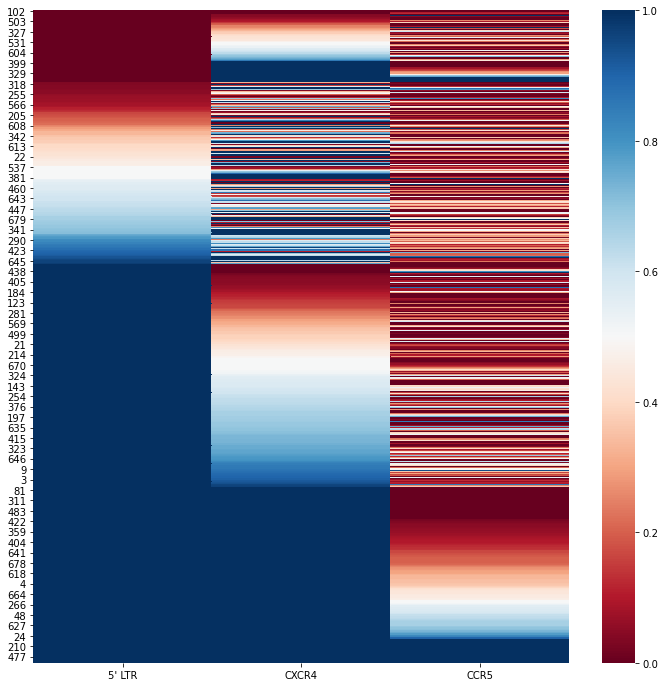

In [53]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['5\' LTR', 'CXCR4', 'CCR5']).drop('Name', axis=1), cmap='RdBu')

In [18]:
green_purple = sns.diverging_palette(300, 125, l=30, as_cmap=True)

In [19]:
green_purple

In [23]:
custom_greens = sns.light_palette((125, 100, 30), input='husl', as_cmap=True)

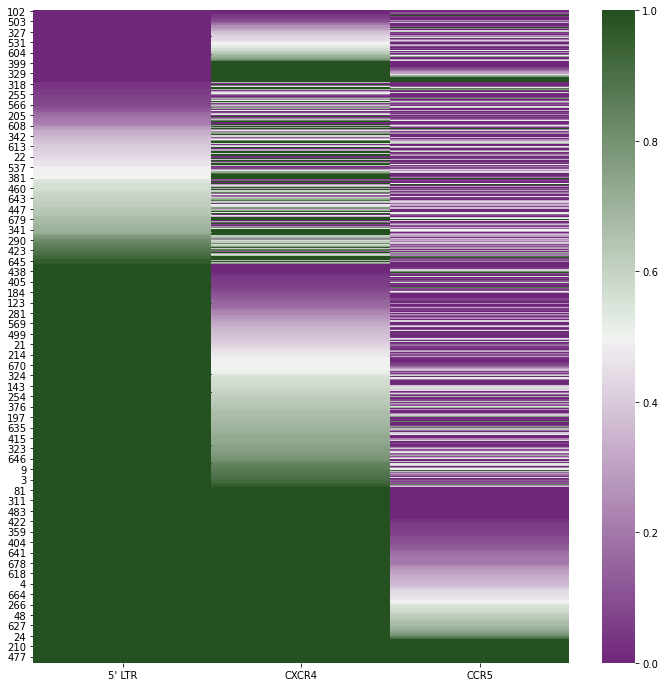

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['5\' LTR', 'CXCR4', 'CCR5']).drop('Name', axis=1), cmap=green_purple)

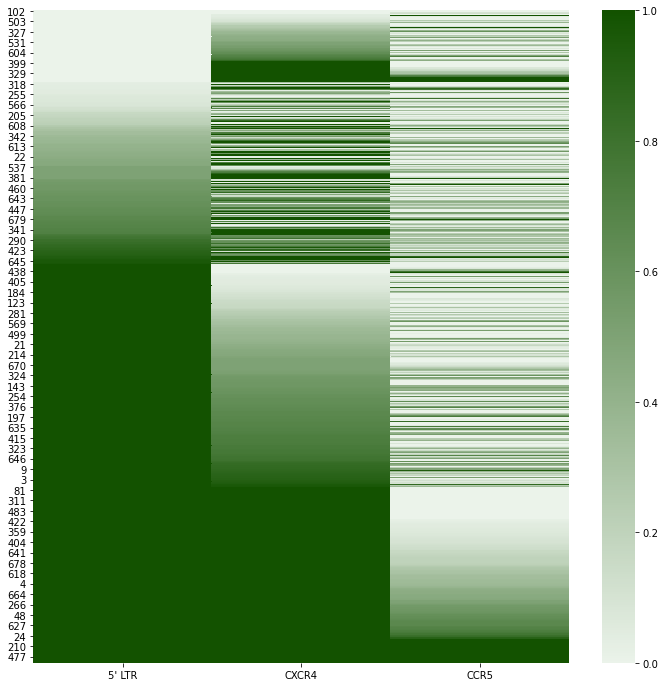

In [24]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['5\' LTR', 'CXCR4', 'CCR5']).drop('Name', axis=1), cmap=custom_greens)

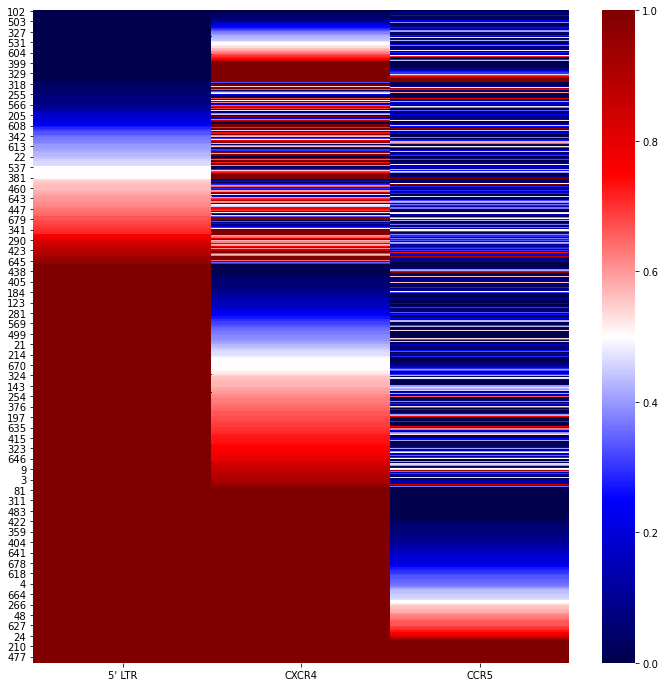

In [88]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['5\' LTR', 'CXCR4', 'CCR5']).drop('Name', axis=1), cmap='seismic')

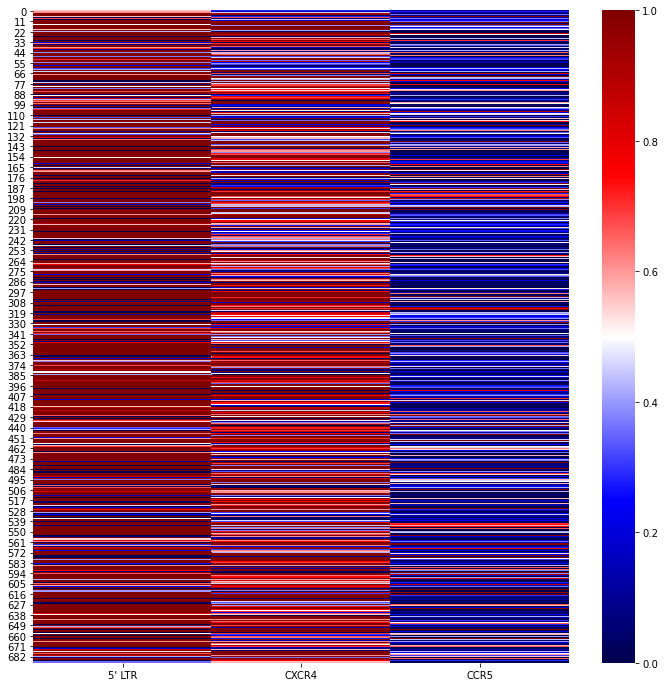

In [91]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.drop('Name', axis=1), cmap='seismic')

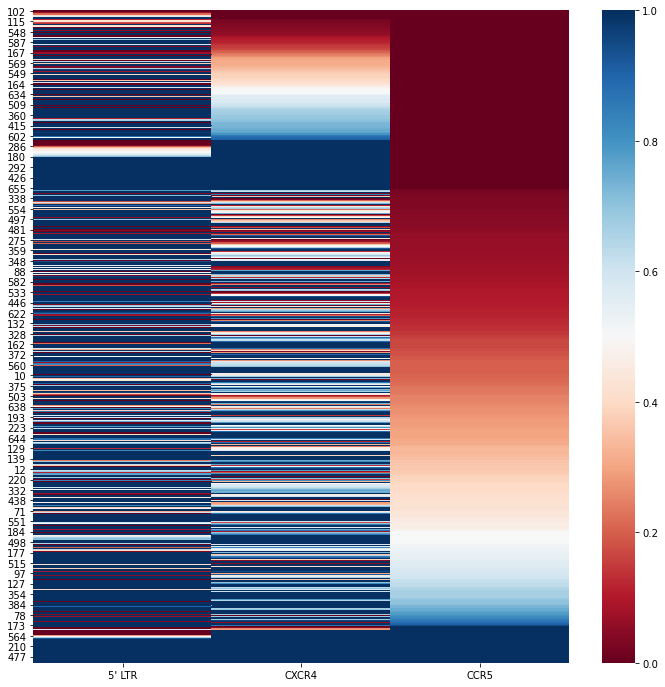

In [87]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['CCR5', 'CXCR4', '5\' LTR']).drop('Name', axis=1), cmap='RdBu')

In [92]:
output_data

,Name,5' LTR,CXCR4,CCR5
0,GGCGATGCTCAACCAA,0.565217,0.285714,0.111111
1,ATGGAGTTAGTAACTT,0.588235,0.142857,0.277778
2,ACTCTCCTGAGCCGTT,0.619048,0.456522,0.107143
3,CGACGCGTTTCTAACC,1.000000,0.909091,0.058824
4,TAGCATTCCTACATTA,1.000000,1.000000,0.357143
...,...,...,...,...
684,TATGCAAGGTATCCGG,1.000000,1.000000,0.660000
685,ATCTTAGAATTCGCCG,0.916667,0.636364,0.218750
686,TCTCTACAATAGTCTG,1.000000,0.900000,0.000000
687,CGAGAATTTTAGGTTA,0.000000,0.777778,0.285714


In [97]:
output_data['5\' LTR']

0      0.565217
1      0.588235
2      0.619048
3      1.000000
4      1.000000
         ...   
684    1.000000
685    0.916667
686    1.000000
687    0.000000
688    0.357143
Name: 5' LTR, Length: 689, dtype: float64

In [102]:
output_data['5\' LTR bins'] = pd.cut(output_data['5\' LTR'], 10)

In [103]:
output_data

,Name,5' LTR,CXCR4,CCR5,5' LTR bins
0,GGCGATGCTCAACCAA,0.565217,0.285714,0.111111,"(0.5, 0.6]"
1,ATGGAGTTAGTAACTT,0.588235,0.142857,0.277778,"(0.5, 0.6]"
2,ACTCTCCTGAGCCGTT,0.619048,0.456522,0.107143,"(0.6, 0.7]"
3,CGACGCGTTTCTAACC,1.000000,0.909091,0.058824,"(0.9, 1.0]"
4,TAGCATTCCTACATTA,1.000000,1.000000,0.357143,"(0.9, 1.0]"
...,...,...,...,...,...
684,TATGCAAGGTATCCGG,1.000000,1.000000,0.660000,"(0.9, 1.0]"
685,ATCTTAGAATTCGCCG,0.916667,0.636364,0.218750,"(0.9, 1.0]"
686,TCTCTACAATAGTCTG,1.000000,0.900000,0.000000,"(0.9, 1.0]"
687,CGAGAATTTTAGGTTA,0.000000,0.777778,0.285714,"(-0.001, 0.1]"


In [104]:
output_data['5\' LTR bins'] = pd.cut(output_data['5\' LTR'], 10)
output_data['CXCR4 bins'] = pd.cut(output_data['CXCR4'], 10)
output_data['CCR5 bins'] = pd.cut(output_data['CCR5'], 10)

In [105]:
output_data

,Name,5' LTR,CXCR4,CCR5,5' LTR bins,CXCR4 bins,CCR5 bins
0,GGCGATGCTCAACCAA,0.565217,0.285714,0.111111,"(0.5, 0.6]","(0.2, 0.3]","(0.1, 0.2]"
1,ATGGAGTTAGTAACTT,0.588235,0.142857,0.277778,"(0.5, 0.6]","(0.1, 0.2]","(0.2, 0.3]"
2,ACTCTCCTGAGCCGTT,0.619048,0.456522,0.107143,"(0.6, 0.7]","(0.4, 0.5]","(0.1, 0.2]"
3,CGACGCGTTTCTAACC,1.000000,0.909091,0.058824,"(0.9, 1.0]","(0.9, 1.0]","(-0.001, 0.1]"
4,TAGCATTCCTACATTA,1.000000,1.000000,0.357143,"(0.9, 1.0]","(0.9, 1.0]","(0.3, 0.4]"
...,...,...,...,...,...,...,...
684,TATGCAAGGTATCCGG,1.000000,1.000000,0.660000,"(0.9, 1.0]","(0.9, 1.0]","(0.6, 0.7]"
685,ATCTTAGAATTCGCCG,0.916667,0.636364,0.218750,"(0.9, 1.0]","(0.6, 0.7]","(0.2, 0.3]"
686,TCTCTACAATAGTCTG,1.000000,0.900000,0.000000,"(0.9, 1.0]","(0.8, 0.9]","(-0.001, 0.1]"
687,CGAGAATTTTAGGTTA,0.000000,0.777778,0.285714,"(-0.001, 0.1]","(0.7, 0.8]","(0.2, 0.3]"


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

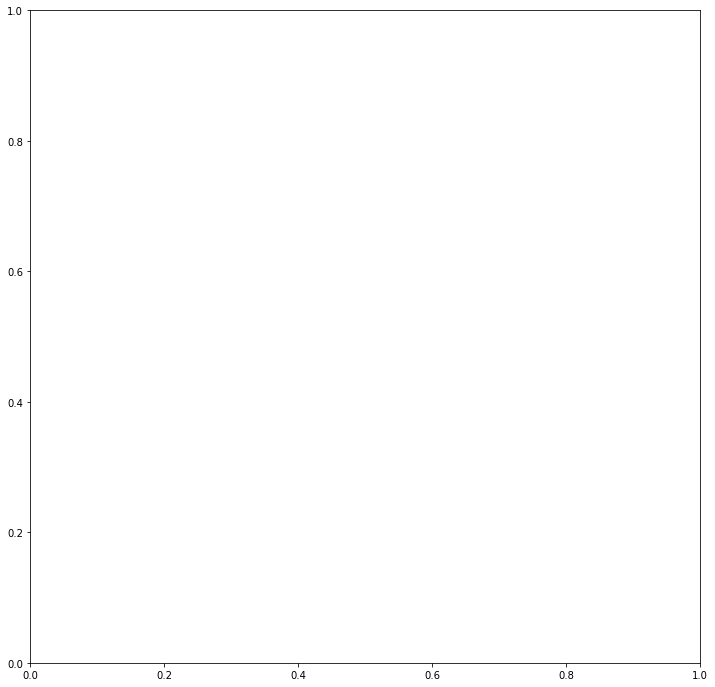

In [106]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins']).drop('Name', axis=1), cmap=green_purple)

In [107]:
output_data['5\' LTR bins left'] = output_data['5\' LTR bins'].map(lambda x : x.left)

In [108]:
output_data

,Name,5' LTR,CXCR4,CCR5,5' LTR bins,CXCR4 bins,CCR5 bins,5' LTR bins left
0,GGCGATGCTCAACCAA,0.565217,0.285714,0.111111,"(0.5, 0.6]","(0.2, 0.3]","(0.1, 0.2]",0.500
1,ATGGAGTTAGTAACTT,0.588235,0.142857,0.277778,"(0.5, 0.6]","(0.1, 0.2]","(0.2, 0.3]",0.500
2,ACTCTCCTGAGCCGTT,0.619048,0.456522,0.107143,"(0.6, 0.7]","(0.4, 0.5]","(0.1, 0.2]",0.600
3,CGACGCGTTTCTAACC,1.000000,0.909091,0.058824,"(0.9, 1.0]","(0.9, 1.0]","(-0.001, 0.1]",0.900
4,TAGCATTCCTACATTA,1.000000,1.000000,0.357143,"(0.9, 1.0]","(0.9, 1.0]","(0.3, 0.4]",0.900
...,...,...,...,...,...,...,...,...
684,TATGCAAGGTATCCGG,1.000000,1.000000,0.660000,"(0.9, 1.0]","(0.9, 1.0]","(0.6, 0.7]",0.900
685,ATCTTAGAATTCGCCG,0.916667,0.636364,0.218750,"(0.9, 1.0]","(0.6, 0.7]","(0.2, 0.3]",0.900
686,TCTCTACAATAGTCTG,1.000000,0.900000,0.000000,"(0.9, 1.0]","(0.8, 0.9]","(-0.001, 0.1]",0.900
687,CGAGAATTTTAGGTTA,0.000000,0.777778,0.285714,"(-0.001, 0.1]","(0.7, 0.8]","(0.2, 0.3]",-0.001


In [109]:
output_data['CXCR4 bins left'] = output_data['CXCR4 bins'].map(lambda x : x.left)
output_data['CCR5 bins left'] = output_data['CCR5 bins'].map(lambda x : x.left)

In [116]:
output_data['CCR5 bins left'].dtypes

CategoricalDtype(categories=[-0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], ordered=True)

In [128]:
for cat in output_data['5\'LTR bins left']:
    print(float(cat))

0.5
0.5
0.6
0.9
0.9
0.9
0.5
-0.001
0.6
0.9
-0.001
0.9
0.9
0.9
0.9
0.4
0.9
0.9
0.9
0.9
0.5
0.9
0.4
0.9
0.9
0.9
0.9
0.9
-0.001
0.9
0.9
0.9
-0.001
0.9
0.2
0.6
-0.001
0.9
0.9
0.5
0.7
-0.001
0.9
0.9
0.3
0.9
0.9
0.9
0.9
0.3
0.9
0.9
0.7
0.9
0.9
0.3
0.9
0.9
0.2
0.9
0.9
0.3
0.4
0.9
0.4
0.9
0.9
0.9
0.6
0.9
0.9
0.9
0.9
0.9
-0.001
-0.001
0.4
0.9
-0.001
0.9
0.4
0.9
0.3
0.9
0.9
0.9
0.6
0.9
0.9
-0.001
0.4
0.9
0.1
0.8
0.4
0.6
0.6
0.9
0.6
0.9
-0.001
0.9
-0.001
-0.001
0.3
0.7
0.9
0.9
0.9
0.9
0.9
-0.001
0.9
0.3
0.9
0.4
0.9
0.9
0.4
0.9
0.9
0.4
0.9
0.9
0.3
0.6
0.9
0.9
-0.001
0.9
0.4
0.3
0.9
0.9
0.8
-0.001
0.6
0.9
0.9
0.9
-0.001
0.9
0.9
0.9
-0.001
0.9
0.9
0.9
-0.001
0.9
0.9
0.9
0.9
0.9
0.9
0.4
0.9
0.9
0.9
0.9
0.9
0.9
0.2
0.9
-0.001
0.9
0.4
-0.001
0.9
0.6
0.5
0.9
0.9
0.9
-0.001
0.9
0.9
-0.001
0.4
0.9
0.7
0.9
0.9
-0.001
0.9
0.9
-0.001
0.9
-0.001
0.9
0.9
-0.001
0.9
0.9
0.9
0.9
-0.001
0.9
0.9
-0.001
0.9
0.9
0.9
0.3
0.9
0.1
0.9
-0.001
0.9
-0.001
0.9
0.9
0.9
0.9
0.9
0.6
0.5
0.9
0.9
0.9
-0.001
0.9
0.9
0.9
0.9
0.9


In [132]:
output_data.sort_values(by=['5\' LTR bins left', 'CXCR4 bins left', 'CCR5 bins left']).drop('Name', axis=1)

,5' LTR,CXCR4,CCR5,5' LTR bins,CXCR4 bins,CCR5 bins,5' LTR bins left,CXCR4 bins left,CCR5 bins left
28,0.000000,0.042553,0.000000,"(-0.001, 0.1]","(-0.001, 0.1]","(-0.001, 0.1]",-0.001,-0.001,-0.001
41,0.083333,0.055556,0.058824,"(-0.001, 0.1]","(-0.001, 0.1]","(-0.001, 0.1]",-0.001,-0.001,-0.001
89,0.000000,0.046512,0.050000,"(-0.001, 0.1]","(-0.001, 0.1]","(-0.001, 0.1]",-0.001,-0.001,-0.001
102,0.000000,0.000000,0.000000,"(-0.001, 0.1]","(-0.001, 0.1]","(-0.001, 0.1]",-0.001,-0.001,-0.001
128,0.066667,0.000000,0.000000,"(-0.001, 0.1]","(-0.001, 0.1]","(-0.001, 0.1]",-0.001,-0.001,-0.001
...,...,...,...,...,...,...,...,...,...
526,1.000000,1.000000,1.000000,"(0.9, 1.0]","(0.9, 1.0]","(0.9, 1.0]",0.900,0.900,0.900
563,1.000000,1.000000,1.000000,"(0.9, 1.0]","(0.9, 1.0]","(0.9, 1.0]",0.900,0.900,0.900
612,1.000000,1.000000,1.000000,"(0.9, 1.0]","(0.9, 1.0]","(0.9, 1.0]",0.900,0.900,0.900
617,1.000000,1.000000,1.000000,"(0.9, 1.0]","(0.9, 1.0]","(0.9, 1.0]",0.900,0.900,0.900


In [134]:
output_data = output_data.drop(['5\' LTR bins left', 'CXCR4 bins left', 'CCR5 bins left'], axis=1)

In [135]:
output_data

,Name,5' LTR,CXCR4,CCR5,5' LTR bins,CXCR4 bins,CCR5 bins
0,GGCGATGCTCAACCAA,0.565217,0.285714,0.111111,"(0.5, 0.6]","(0.2, 0.3]","(0.1, 0.2]"
1,ATGGAGTTAGTAACTT,0.588235,0.142857,0.277778,"(0.5, 0.6]","(0.1, 0.2]","(0.2, 0.3]"
2,ACTCTCCTGAGCCGTT,0.619048,0.456522,0.107143,"(0.6, 0.7]","(0.4, 0.5]","(0.1, 0.2]"
3,CGACGCGTTTCTAACC,1.000000,0.909091,0.058824,"(0.9, 1.0]","(0.9, 1.0]","(-0.001, 0.1]"
4,TAGCATTCCTACATTA,1.000000,1.000000,0.357143,"(0.9, 1.0]","(0.9, 1.0]","(0.3, 0.4]"
...,...,...,...,...,...,...,...
684,TATGCAAGGTATCCGG,1.000000,1.000000,0.660000,"(0.9, 1.0]","(0.9, 1.0]","(0.6, 0.7]"
685,ATCTTAGAATTCGCCG,0.916667,0.636364,0.218750,"(0.9, 1.0]","(0.6, 0.7]","(0.2, 0.3]"
686,TCTCTACAATAGTCTG,1.000000,0.900000,0.000000,"(0.9, 1.0]","(0.8, 0.9]","(-0.001, 0.1]"
687,CGAGAATTTTAGGTTA,0.000000,0.777778,0.285714,"(-0.001, 0.1]","(0.7, 0.8]","(0.2, 0.3]"


In [137]:
output_data.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins']).drop(['Name', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1)

,5' LTR,CXCR4,CCR5
28,0.000000,0.042553,0.000000
41,0.083333,0.055556,0.058824
89,0.000000,0.046512,0.050000
102,0.000000,0.000000,0.000000
128,0.066667,0.000000,0.000000
...,...,...,...
526,1.000000,1.000000,1.000000
563,1.000000,1.000000,1.000000
612,1.000000,1.000000,1.000000
617,1.000000,1.000000,1.000000


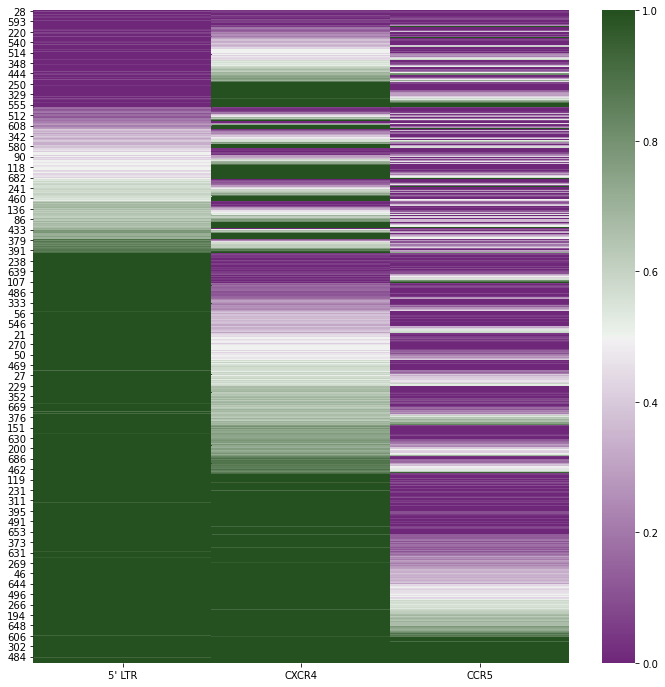

In [138]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins']).drop(['Name', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple)

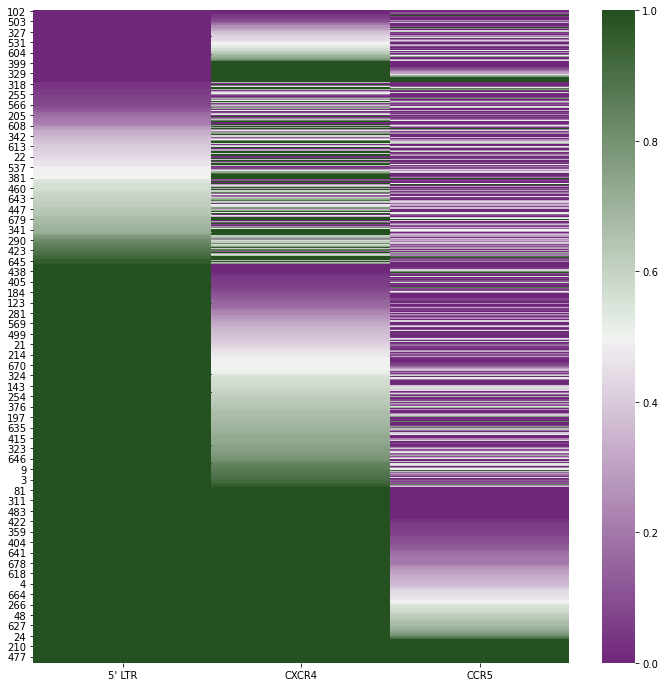

In [140]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['5\' LTR', 'CXCR4', 'CCR5']).drop(['Name', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple)

In [154]:
output_data['5\' LTR bins'] = pd.cut(output_data['5\' LTR'], 4)
output_data['CXCR4 bins'] = pd.cut(output_data['CXCR4'], 4)
output_data['CCR5 bins'] = pd.cut(output_data['CCR5'], 4)

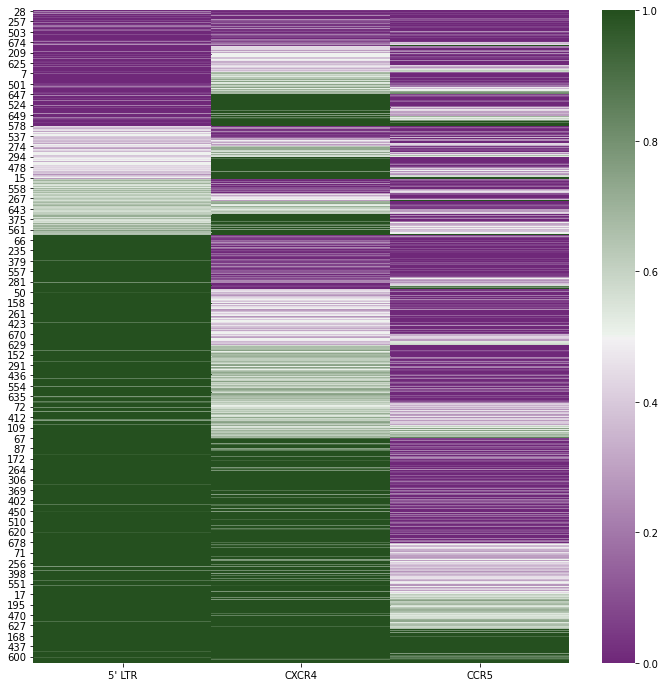

In [155]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins']).drop(['Name', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple)

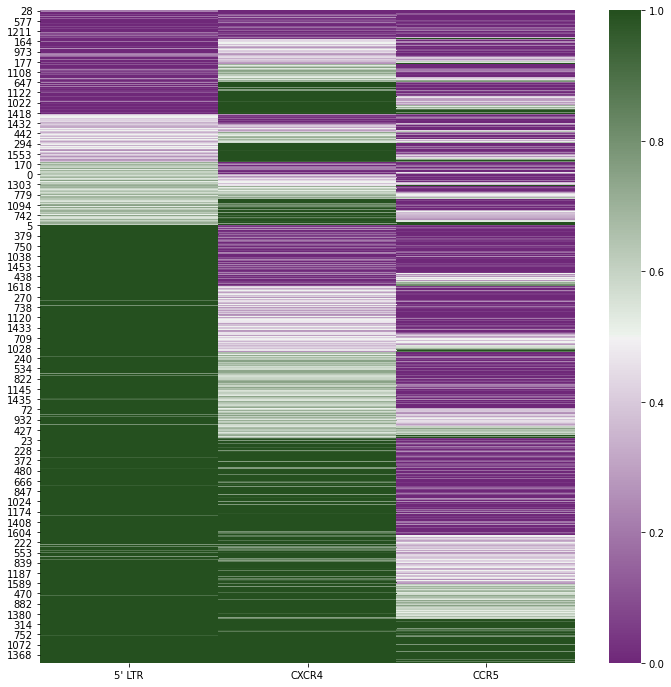

In [20]:
amp1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

amp1_name = '5\'LTR'
amp2_name = 'CXCR4'
amp3_name = 'CCR5'

common = (amp1.index.intersection(amp2.index)).intersection(amp3.index)

edit_percents = []

for cell in common:
    if sum(amp1.loc[cell]) >= 5 and sum(amp2.loc[cell]) >=5 and sum(amp3.loc[cell]) >= 5:
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1.loc[cell].index, amp1.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2.loc[cell].index, amp2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3.loc[cell].index, amp3.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)
        
        edit_percents += [[cell, amp1_edit_percent, amp2_edit_percent, amp3_edit_percent]]

amp1_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP2.csv', sep = ',', header = 0, index_col = 0)
amp2_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp3_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)

        

common_2 = (amp1_2.index.intersection(amp2_2.index)).intersection(amp3_2.index)

for cell in common_2:
    if sum(amp1_2.loc[cell]) >= 5 and sum(amp2_2.loc[cell]) >=5 and sum(amp3_2.loc[cell]) >= 5:
        amp1_edited_reads = 0
        amp1_unedited_reads = 0
        amp2_edited_reads = 0
        amp2_unedited_reads = 0
        amp3_edited_reads = 0
        amp3_unedited_reads = 0
        
        for edit_length, count in zip(amp1_2.loc[cell].index, amp1_2.loc[cell]):
            if int(edit_length) != 0:
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2_2.loc[cell].index, amp2_2.loc[cell]):
            if int(edit_length) != 0:
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_unedited_reads += count
        for edit_length, count in zip(amp3_2.loc[cell].index, amp3_2.loc[cell]):
            if int(edit_length) != 0:
                amp3_edited_reads += count
            elif int(edit_length) == 0:
                amp3_unedited_reads += count

        amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
        amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
        amp3_edit_percent = amp3_edited_reads / (amp3_edited_reads + amp3_unedited_reads)
        
        edit_percents += [[cell, amp1_edit_percent, amp2_edit_percent, amp3_edit_percent]]

output_data_combined = pd.DataFrame(edit_percents, columns = ['Name', '5\' LTR', 'CXCR4', 'CCR5'])

output_data_combined['5\' LTR bins'] = pd.cut(output_data_combined['5\' LTR'], 4)
output_data_combined['CXCR4 bins'] = pd.cut(output_data_combined['CXCR4'], 4)
output_data_combined['CCR5 bins'] = pd.cut(output_data_combined['CCR5'], 4)

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data_combined.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins']).drop(['Name', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple)





In [25]:
bins = pd.IntervalIndex.from_tuples([(-0.001, 0.2), (0.2, 0.8), (0.8, 1.0)])

In [26]:
output_data_combined = pd.DataFrame(edit_percents, columns = ['Name', '5\' LTR', 'CXCR4', 'CCR5'])
output_data_combined['5\' LTR bins'] = pd.cut(output_data_combined['5\' LTR'], bins)
output_data_combined['CXCR4 bins'] = pd.cut(output_data_combined['CXCR4'], bins)
output_data_combined['CCR5 bins'] = pd.cut(output_data_combined['CCR5'], bins)


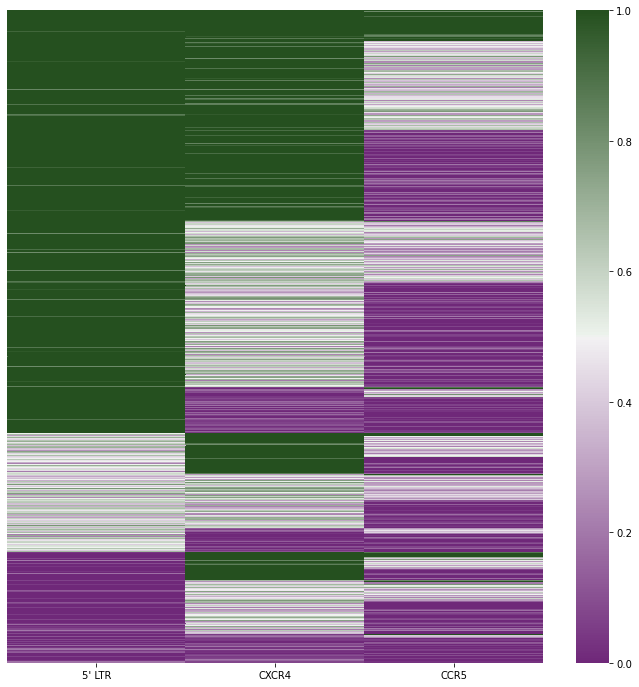

In [27]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data_combined.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple, yticklabels=False)


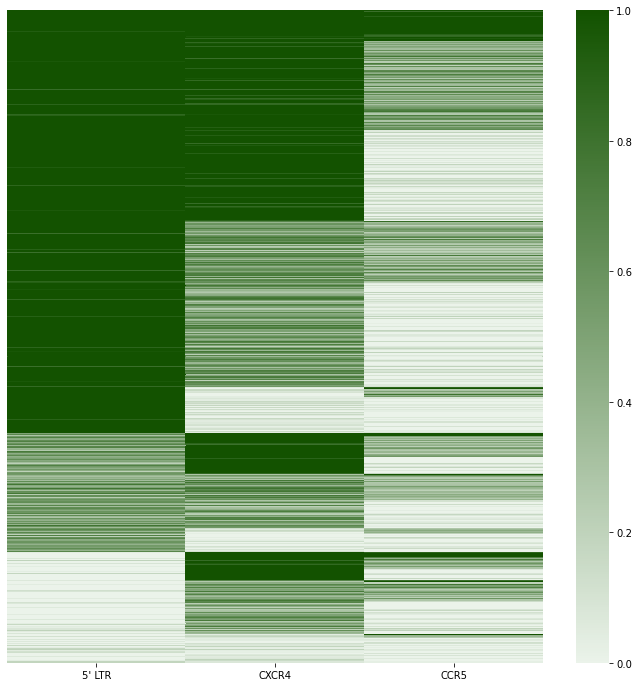

In [28]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data_combined.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=custom_greens, yticklabels=False)


In [16]:
output_data_combined

,Name,5' LTR,CXCR4,CCR5,5' LTR bins,CXCR4 bins,CCR5 bins
0,GGCGATGCTCAACCAA,0.565217,0.285714,0.111111,"(0.2, 0.8]","(0.2, 0.8]","(-0.001, 0.2]"
1,ATGGAGTTAGTAACTT,0.588235,0.142857,0.277778,"(0.2, 0.8]","(-0.001, 0.2]","(0.2, 0.8]"
2,ACTCTCCTGAGCCGTT,0.619048,0.456522,0.107143,"(0.2, 0.8]","(0.2, 0.8]","(-0.001, 0.2]"
3,CGACGCGTTTCTAACC,1.000000,0.909091,0.058824,"(0.8, 1.0]","(0.8, 1.0]","(-0.001, 0.2]"
4,TAGCATTCCTACATTA,1.000000,1.000000,0.357143,"(0.8, 1.0]","(0.8, 1.0]","(0.2, 0.8]"
...,...,...,...,...,...,...,...
1654,GAACGGAGTATTCGAA,1.000000,0.400000,0.125000,"(0.8, 1.0]","(0.2, 0.8]","(-0.001, 0.2]"
1655,TTGTGAGAATTCCTGC,1.000000,0.729730,0.000000,"(0.8, 1.0]","(0.2, 0.8]","(-0.001, 0.2]"
1656,ATTGGTCTAACGTACC,1.000000,0.142857,0.285714,"(0.8, 1.0]","(-0.001, 0.2]","(0.2, 0.8]"
1657,GTCCGAATAGCGTGTA,1.000000,1.000000,0.000000,"(0.8, 1.0]","(0.8, 1.0]","(-0.001, 0.2]"


In [23]:
output_data_combined['5\' LTR bins'][0].right

0.8

In [32]:
a = [x.right for x in output_data_combined['5\' LTR bins']]

In [33]:
a

[0.8,
 0.8,
 0.8,
 1.0,
 1.0,
 1.0,
 0.8,
 0.2,
 0.8,
 1.0,
 0.2,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2,
 1.0,
 1.0,
 1.0,
 0.2,
 1.0,
 0.8,
 0.8,
 0.2,
 1.0,
 1.0,
 0.8,
 0.8,
 0.2,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 0.8,
 0.8,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2,
 0.2,
 0.8,
 1.0,
 0.2,
 1.0,
 0.8,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 0.2,
 0.8,
 1.0,
 0.2,
 1.0,
 0.8,
 0.8,
 0.8,
 1.0,
 0.8,
 1.0,
 0.2,
 1.0,
 0.2,
 0.2,
 0.8,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2,
 1.0,
 0.8,
 1.0,
 0.8,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 0.8,
 0.8,
 1.0,
 1.0,
 0.2,
 1.0,
 0.8,
 0.8,
 1.0,
 1.0,
 1.0,
 0.2,
 0.8,
 1.0,
 1.0,
 1.0,
 0.2,
 1.0,
 1.0,
 1.0,
 0.2,
 1.0,
 1.0,
 1.0,
 0.2,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8,
 1.0,
 0.2,
 1.0,
 0.8

In [47]:
output_data_combined['5\' LTR cat'] = [x.right - 0.2 if x.right == 0.8 else x.right for x in output_data_combined['5\' LTR bins']]
output_data_combined['CXCR4 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right for x in output_data_combined['CXCR4 bins']]
output_data_combined['CCR5 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right for x in output_data_combined['CCR5 bins']]

In [30]:
output_data_combined['5\' LTR cat'] = [x.right - 0.2 if x.right == 0.8 else x.right for x in output_data_combined['5\' LTR bins']]
output_data_combined['CXCR4 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right for x in output_data_combined['CXCR4 bins']]
output_data_combined['CCR5 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right for x in output_data_combined['CCR5 bins']]

In [46]:
a

[0.2,
 0.6000000000000001,
 0.2,
 0.2,
 0.6000000000000001,
 0.2,
 1.0,
 0.2,
 0.6000000000000001,
 0.6000000000000001,
 0.6000000000000001,
 0.6000000000000001,
 0.6000000000000001,
 1.0,
 0.2,
 1.0,
 0.6000000000000001,
 0.6000000000000001,
 0.2,
 0.6000000000000001,
 0.6000000000000001,
 0.2,
 0.2,
 0.2,
 1.0,
 0.6000000000000001,
 0.2,
 0.6000000000000001,
 0.2,
 0.2,
 0.6000000000000001,
 0.2,
 0.6000000000000001,
 0.2,
 0.2,
 0.2,
 0.6000000000000001,
 0.6000000000000001,
 0.2,
 0.6000000000000001,
 0.2,
 0.2,
 0.6000000000000001,
 0.2,
 0.6000000000000001,
 0.2,
 0.6000000000000001,
 0.2,
 0.6000000000000001,
 0.2,
 0.6000000000000001,
 0.6000000000000001,
 0.6000000000000001,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.2,
 0.6000000000000001,
 0.6000000000000001,
 0.2,
 0.6000000000000001,
 0.6000000000000001,
 0.2,
 1.0,
 0.2,
 0.2,
 1.0,
 0.6000000000000001,
 0.6000000000000001,
 0.2,
 0.6000000000000001,
 0.6000000000000001,
 0.2,
 0.2,
 0.6000000000000001,
 0.2,
 0.2,
 0.2

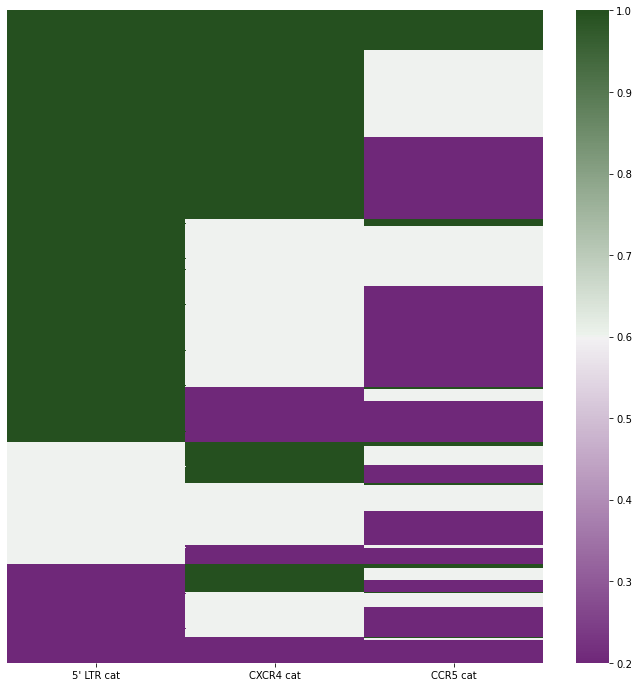

In [31]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data_combined.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', '5\' LTR', 'CXCR4', 'CCR5', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple, yticklabels=False)


In [34]:
output_data_combined['5\' LTR cat'] = [x.right - 0.1 if x.right == 0.8 else x.right + 0.3 if x.right == 0.2 else x.right for x in output_data_combined['5\' LTR bins']]
output_data_combined['CXCR4 cat'] = [x.right - 0.1 if x.right == 0.8 else x.right + 0.3 if x.right == 0.2 else x.right for x in output_data_combined['CXCR4 bins']]
output_data_combined['CCR5 cat'] = [x.right - 0.1 if x.right == 0.8 else x.right + 0.3 if x.right == 0.2 else x.right for x in output_data_combined['CCR5 bins']]

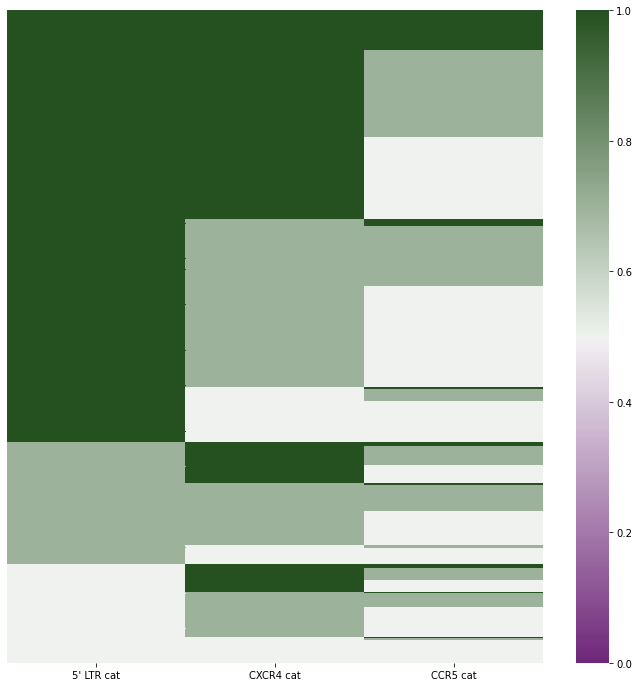

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data_combined.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', '5\' LTR', 'CXCR4', 'CCR5', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple, vmin=0, vmax=1, yticklabels=False)


In [29]:
output_data_combined['5\' LTR cat'] = [x.right - 0.2 if x.right == 0.8 else x.right - 0.2 if x.right == 0.2 else x.right for x in output_data_combined['5\' LTR bins']]
output_data_combined['CXCR4 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right - 0.2 if x.right == 0.2 else x.right for x in output_data_combined['CXCR4 bins']]
output_data_combined['CCR5 cat'] = [x.right - 0.2 if x.right == 0.8 else x.right - 0.2 if x.right == 0.2 else x.right for x in output_data_combined['CCR5 bins']]

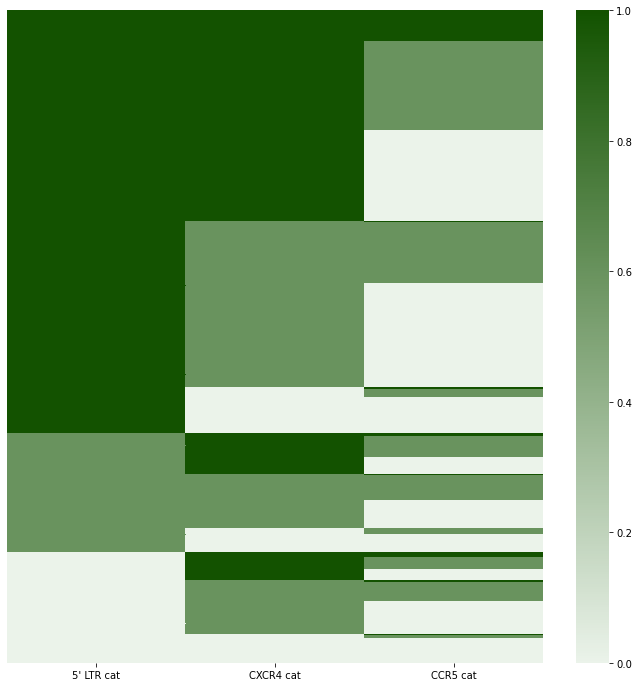

In [31]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data_combined.sort_values(by=['5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], ascending = False).drop(['Name', '5\' LTR', 'CXCR4', 'CCR5', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=custom_greens, vmin=0, vmax=1, yticklabels=False)


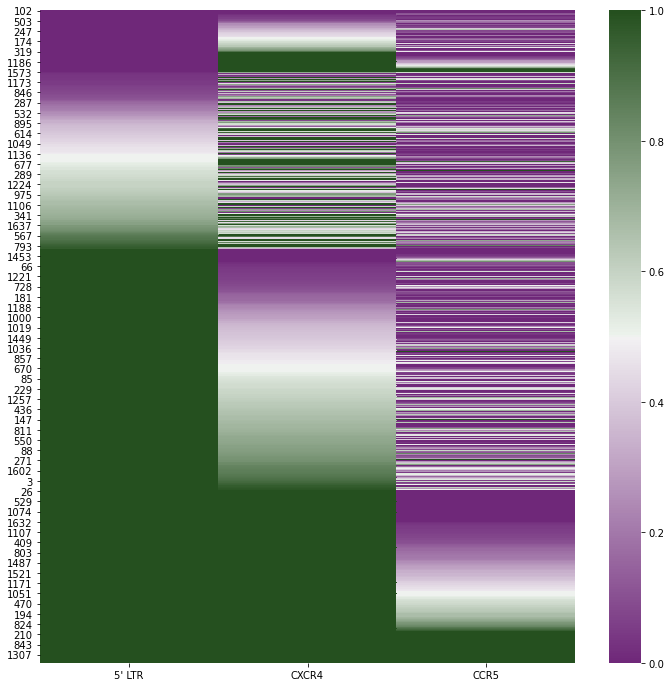

In [166]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(output_data_combined.sort_values(by=['5\' LTR', 'CXCR4', 'CCR5']).drop(['Name', '5\' LTR bins', 'CXCR4 bins', 'CCR5 bins'], axis=1), cmap=green_purple)


In [165]:
print(len(output_data))
print(len(output_data_combined))


689
1659


In [36]:
amp1bi_amp2bi_amp3bi = 0
amp1bi_amp2mono_amp3bi = 0
amp1bi_amp2unedited_amp3bi = 0
amp1mono_amp2bi_amp3bi = 0
amp1mono_amp2mono_amp3bi = 0
amp1mono_amp2unedited_amp3bi = 0
amp1unedited_amp2bi_amp3bi = 0
amp1unedited_amp2mono_amp3bi = 0
amp1unedited_amp2unedited_amp3bi = 0

amp1bi_amp2bi_amp3mono = 0
amp1bi_amp2mono_amp3mono = 0
amp1bi_amp2unedited_amp3mono = 0
amp1mono_amp2bi_amp3mono = 0
amp1mono_amp2mono_amp3mono = 0
amp1mono_amp2unedited_amp3mono = 0
amp1unedited_amp2bi_amp3mono = 0
amp1unedited_amp2mono_amp3mono = 0
amp1unedited_amp2unedited_amp3mono = 0

amp1bi_amp2bi_amp3unedited = 0
amp1bi_amp2mono_amp3unedited = 0
amp1bi_amp2unedited_amp3unedited = 0
amp1mono_amp2bi_amp3unedited = 0
amp1mono_amp2mono_amp3unedited = 0
amp1mono_amp2unedited_amp3unedited = 0
amp1unedited_amp2bi_amp3unedited = 0
amp1unedited_amp2mono_amp3unedited = 0
amp1unedited_amp2unedited_amp3unedited = 0

for cell in edit_percents:

    name, amp1_edit_percent, amp2_edit_percent, amp3_edit_percent = cell


    if amp1_edit_percent >= 0.8:
        if amp2_edit_percent >= 0.8:
            if amp3_edit_percent >= 0.8:
                amp1bi_amp2bi_amp3bi += 1
            elif amp3_edit_percent <= 0.2:
                amp1bi_amp2bi_amp3unedited += 1
            else:
                amp1bi_amp2bi_amp3mono += 1
        elif amp2_edit_percent <= 0.2:
            if amp3_edit_percent >= 0.8:
                amp1bi_amp2unedited_amp3bi += 1
            elif amp3_edit_percent <= 0.2:
                amp1bi_amp2unedited_amp3unedited += 1
            else:
                amp1bi_amp2unedited_amp3mono += 1                    
        else:
            if amp3_edit_percent >= 0.8:
                amp1bi_amp2mono_amp3bi += 1
            elif amp3_edit_percent <= 0.2:
                amp1bi_amp2mono_amp3unedited += 1
            else:
                amp1bi_amp2mono_amp3mono += 1                    
                    
    elif amp1_edit_percent <= 0.2:
        if amp2_edit_percent >= 0.8:
            if amp3_edit_percent >= 0.8:
                amp1unedited_amp2bi_amp3bi += 1
            elif amp3_edit_percent <= 0.2:
                amp1unedited_amp2bi_amp3unedited += 1
            else:
                amp1unedited_amp2bi_amp3mono += 1
        elif amp2_edit_percent <= 0.2:
            if amp3_edit_percent >= 0.8:
                amp1unedited_amp2unedited_amp3bi += 1
            elif amp3_edit_percent <= 0.2:
                amp1unedited_amp2unedited_amp3unedited += 1
            else:
                amp1unedited_amp2unedited_amp3mono += 1                    
        else:
            if amp3_edit_percent >= 0.8:
                amp1unedited_amp2mono_amp3bi += 1
            elif amp3_edit_percent <= 0.2:
                amp1unedited_amp2mono_amp3unedited += 1
            else:
                amp1unedited_amp2mono_amp3mono += 1
                    
    else:
        if amp2_edit_percent >= 0.8:
            if amp3_edit_percent >= 0.8:
                amp1mono_amp2bi_amp3bi += 1
            elif amp3_edit_percent <= 0.2:
                amp1mono_amp2bi_amp3unedited += 1
            else:
                amp1mono_amp2bi_amp3mono += 1
        elif amp2_edit_percent <= 0.2:
            if amp3_edit_percent >= 0.8:
                amp1mono_amp2unedited_amp3bi += 1
            elif amp3_edit_percent <= 0.2:
                amp1mono_amp2unedited_amp3unedited += 1
            else:
                amp1mono_amp2unedited_amp3mono += 1                    
        else:
            if amp3_edit_percent >= 0.8:
                amp1mono_amp2mono_amp3bi += 1
            elif amp3_edit_percent <= 0.2:
                amp1mono_amp2mono_amp3unedited += 1
            else:
                amp1mono_amp2mono_amp3mono += 1                    


                
 

In [38]:
print(amp1bi_amp2bi_amp3bi)
print(amp1bi_amp2mono_amp3bi)
print(amp1bi_amp2unedited_amp3bi)
print(amp1mono_amp2bi_amp3bi)
print(amp1mono_amp2mono_amp3bi)
print(amp1mono_amp2unedited_amp3bi)
print(amp1unedited_amp2bi_amp3bi)
print(amp1unedited_amp2mono_amp3bi)
print(amp1unedited_amp2unedited_amp3bi)
print()
print(amp1bi_amp2bi_amp3mono)
print(amp1bi_amp2mono_amp3mono)
print(amp1bi_amp2unedited_amp3mono)
print(amp1mono_amp2bi_amp3mono)
print(amp1mono_amp2mono_amp3mono)
print(amp1mono_amp2unedited_amp3mono)
print(amp1unedited_amp2bi_amp3mono)
print(amp1unedited_amp2mono_amp3mono)
print(amp1unedited_amp2unedited_amp3mono)
print()
print(amp1bi_amp2bi_amp3unedited)
print(amp1bi_amp2mono_amp3unedited)
print(amp1bi_amp2unedited_amp3unedited)
print(amp1mono_amp2bi_amp3unedited)
print(amp1mono_amp2mono_amp3unedited)
print(amp1mono_amp2unedited_amp3unedited)
print(amp1unedited_amp2bi_amp3unedited)
print(amp1unedited_amp2mono_amp3unedited)
print(amp1unedited_amp2unedited_amp3unedited)

104
19
5
11
4
0
12
2
3

219
151
31
47
66
8
29
36
5

212
257
105
47
83
40
30
76
57


In [197]:
amp1_1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp2_1 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/test3/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)
common_1 = amp1_1.index.intersection(amp2_1.index)

amp1_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP55.csv', sep = ',', header = 0, index_col = 0)
amp2_2 = pd.read_csv('/Users/zaindossani/Documents/Jupyter Notebooks/Tapestri CRISPR analysis/wynton_runs/MB tube 2/indel_matrices/CRISPRessoBatch_on_batch_newref_BSRI_HIV_AMP58.csv', sep = ',', header = 0, index_col = 0)
common_2 = amp1_2.index.intersection(amp2_2.index)

amp1_name = 'CXCR4'
amp2_name = 'CCR5'

total_cells = 0

amp1bi_amp2bi = 0
amp1bi_amp2mono = 0
amp1bi_amp2unedited = 0
amp1mono_amp2bi = 0
amp1mono_amp2mono = 0
amp1mono_amp2unedited = 0
amp1unedited_amp2bi = 0
amp1unedited_amp2mono = 0
amp1unedited_amp2unedited = 0

amp1_edited_reads = 0
amp1_unedited_reads = 0
amp2_edited_reads = 0
amp2_unedited_reads = 0


for cell in common_1:
    if sum(amp1_1.loc[cell]) >= 5 and sum(amp2_1.loc[cell]) >=5:
        total_cells += 1
        amp1_cell_edited_reads = 0
        amp1_cell_unedited_reads = 0
        amp2_cell_edited_reads = 0
        amp2_cell_unedited_reads = 0
        for edit_length, count in zip(amp1_1.loc[cell].index, amp1_1.loc[cell]):
            if int(edit_length) != 0:
                amp1_cell_edited_reads += count
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_cell_unedited_reads += count
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2_1.loc[cell].index, amp2_1.loc[cell]):
            if int(edit_length) != 0:
                amp2_cell_edited_reads += count
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_cell_unedited_reads += count
                amp2_unedited_reads += count
        amp1_edit_percent = amp1_cell_edited_reads / (amp1_cell_edited_reads + amp1_cell_unedited_reads)
        amp2_edit_percent = amp2_cell_edited_reads / (amp2_cell_edited_reads + amp2_cell_unedited_reads)
        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                amp1bi_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1bi_amp2unedited += 1
            else:
                amp1bi_amp2mono += 1
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                amp1unedited_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1unedited_amp2unedited += 1
            else:
                amp1unedited_amp2mono += 1              
        else:
            if amp2_edit_percent >= 0.8:
                amp1mono_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1mono_amp2unedited += 1
            else:
                amp1mono_amp2mono += 1


for cell in common_2:
    if sum(amp1_2.loc[cell]) >= 5 and sum(amp2_2.loc[cell]) >=5:
        total_cells += 1
        amp1_cell_edited_reads = 0
        amp1_cell_unedited_reads = 0
        amp2_cell_edited_reads = 0
        amp2_cell_unedited_reads = 0
        for edit_length, count in zip(amp1_2.loc[cell].index, amp1_2.loc[cell]):
            if int(edit_length) != 0:
                amp1_cell_edited_reads += count
                amp1_edited_reads += count
            elif int(edit_length) == 0:
                amp1_cell_unedited_reads += count
                amp1_unedited_reads += count
        for edit_length, count in zip(amp2_2.loc[cell].index, amp2_2.loc[cell]):
            if int(edit_length) != 0:
                amp2_cell_edited_reads += count
                amp2_edited_reads += count
            elif int(edit_length) == 0:
                amp2_cell_unedited_reads += count
                amp2_unedited_reads += count
        amp1_edit_percent = amp1_cell_edited_reads / (amp1_cell_edited_reads + amp1_cell_unedited_reads)
        amp2_edit_percent = amp2_cell_edited_reads / (amp2_cell_edited_reads + amp2_cell_unedited_reads)
        if amp1_edit_percent >= 0.8:
            if amp2_edit_percent >= 0.8:
                amp1bi_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1bi_amp2unedited += 1
            else:
                amp1bi_amp2mono += 1
        elif amp1_edit_percent <= 0.2:
            if amp2_edit_percent >= 0.8:
                amp1unedited_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1unedited_amp2unedited += 1
            else:
                amp1unedited_amp2mono += 1              
        else:
            if amp2_edit_percent >= 0.8:
                amp1mono_amp2bi += 1
            elif amp2_edit_percent <= 0.2:
                amp1mono_amp2unedited += 1
            else:
                amp1mono_amp2mono += 1

           
                
print(f'''There are {total_cells} cells that contain sufficient reads at both loci.
      {amp1_name} biallelic/{amp2_name} biallelic {amp1bi_amp2bi} {amp1bi_amp2bi/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} monoallelic {amp1bi_amp2mono} {amp1bi_amp2mono/total_cells:.4f}
      {amp1_name} biallelic/{amp2_name} unedited {amp1bi_amp2unedited} {amp1bi_amp2unedited/total_cells:.4f}
      
      {amp1_name} monoallelic/{amp2_name} biallelic {amp1mono_amp2bi} {amp1mono_amp2bi/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} monoallelic {amp1mono_amp2mono} {amp1mono_amp2mono/total_cells:.4f}
      {amp1_name} monoallelic/{amp2_name} unedited {amp1mono_amp2unedited} {amp1mono_amp2unedited/total_cells:.4f}
      
      {amp1_name} unedited/{amp2_name} biallelic {amp1unedited_amp2bi} {amp1unedited_amp2bi/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} monoallelic {amp1unedited_amp2mono} {amp1unedited_amp2mono/total_cells:.4f}
      {amp1_name} unedited/{amp2_name} unedited {amp1unedited_amp2unedited} {amp1unedited_amp2unedited/total_cells:.4f}''')

print(f'''There are {total_cells} cells.

      {amp1_name} biallelic {amp1bi_amp2bi + amp1bi_amp2mono + amp1bi_amp2unedited} {(amp1bi_amp2bi + amp1bi_amp2mono + amp1bi_amp2unedited)/total_cells:.4f}     
      {amp1_name} monoallelic {amp1mono_amp2bi + amp1mono_amp2mono + amp1mono_amp2unedited} {(amp1mono_amp2bi + amp1mono_amp2mono + amp1mono_amp2unedited)/total_cells:.4f} 
      {amp1_name} unedited {amp1unedited_amp2bi + amp1unedited_amp2mono + amp1unedited_amp2unedited} {(amp1unedited_amp2bi + amp1unedited_amp2mono + amp1unedited_amp2unedited)/total_cells:.4f}
''')
        

print(f'''There are {total_cells} cells.

      {amp2_name} biallelic {amp1bi_amp2bi + amp1mono_amp2bi + amp1unedited_amp2bi} {(amp1bi_amp2bi + amp1mono_amp2bi + amp1unedited_amp2bi)/total_cells:.4f}     
      {amp2_name} monoallelic {amp1bi_amp2mono + amp1mono_amp2mono + amp1unedited_amp2mono} {(amp1bi_amp2mono + amp1mono_amp2mono + amp1unedited_amp2mono)/total_cells:.4f} 
      {amp2_name} unedited {amp1bi_amp2unedited + amp1mono_amp2unedited + amp1unedited_amp2unedited} {(amp1bi_amp2unedited + amp1mono_amp2unedited + amp1unedited_amp2unedited)/total_cells:.4f}
''')    

There are 2815 cells that contain sufficient reads at both loci.
      CXCR4 biallelic/CCR5 biallelic 257 0.0913
      CXCR4 biallelic/CCR5 monoallelic 502 0.1783
      CXCR4 biallelic/CCR5 unedited 559 0.1986
      
      CXCR4 monoallelic/CCR5 biallelic 41 0.0146
      CXCR4 monoallelic/CCR5 monoallelic 371 0.1318
      CXCR4 monoallelic/CCR5 unedited 665 0.2362
      
      CXCR4 unedited/CCR5 biallelic 15 0.0053
      CXCR4 unedited/CCR5 monoallelic 77 0.0274
      CXCR4 unedited/CCR5 unedited 328 0.1165
There are 2815 cells.

      CXCR4 biallelic 1318 0.4682     
      CXCR4 monoallelic 1077 0.3826 
      CXCR4 unedited 420 0.1492

There are 2815 cells.

      CCR5 biallelic 313 0.1112     
      CCR5 monoallelic 950 0.3375 
      CCR5 unedited 1552 0.5513



In [194]:
print(amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads))
print(amp1_unedited_reads / (amp1_edited_reads + amp1_unedited_reads))
print()
print(amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads))
print(amp2_unedited_reads / (amp2_edited_reads + amp2_unedited_reads))

0.6546626479299592
0.34533735207004085

0.26264945759759284
0.7373505424024072


In [195]:
amp1_edit_percent = amp1_edited_reads / (amp1_edited_reads + amp1_unedited_reads)
amp1_unedit_percent = amp1_unedited_reads / (amp1_edited_reads + amp1_unedited_reads)
amp2_edit_percent = amp2_edited_reads / (amp2_edited_reads + amp2_unedited_reads)
amp2_unedit_percent = amp2_unedited_reads / (amp2_edited_reads + amp2_unedited_reads)

In [189]:
print(amp1_edit_percent * amp1_edit_percent)
print(amp1_edit_percent * amp1_unedit_percent)
print(amp1_edit_percent * amp1_unedit_percent)
print(amp1_unedit_percent * amp1_unedit_percent)

0.4285831825946657
0.22607946533529352
0.22607946533529352
0.11925788673474734


In [196]:
print(amp2_edit_percent * amp2_edit_percent)
print(amp2_edit_percent * amp2_unedit_percent)
print(amp2_edit_percent * amp2_unedit_percent)
print(amp2_unedit_percent * amp2_unedit_percent)

0.06898473757630971
0.19366472002128313
0.19366472002128313
0.5436858223811241


In [40]:
output_data_combined

,Name,5' LTR,CXCR4,CCR5,5' LTR bins,CXCR4 bins,CCR5 bins,5' LTR cat,CXCR4 cat,CCR5 cat
0,GGCGATGCTCAACCAA,0.565217,0.285714,0.111111,"(0.2, 0.8]","(0.2, 0.8]","(-0.001, 0.2]",0.7,0.7,0.5
1,ATGGAGTTAGTAACTT,0.588235,0.142857,0.277778,"(0.2, 0.8]","(-0.001, 0.2]","(0.2, 0.8]",0.7,0.5,0.7
2,ACTCTCCTGAGCCGTT,0.619048,0.456522,0.107143,"(0.2, 0.8]","(0.2, 0.8]","(-0.001, 0.2]",0.7,0.7,0.5
3,CGACGCGTTTCTAACC,1.000000,0.909091,0.058824,"(0.8, 1.0]","(0.8, 1.0]","(-0.001, 0.2]",1.0,1.0,0.5
4,TAGCATTCCTACATTA,1.000000,1.000000,0.357143,"(0.8, 1.0]","(0.8, 1.0]","(0.2, 0.8]",1.0,1.0,0.7
...,...,...,...,...,...,...,...,...,...,...
1654,GAACGGAGTATTCGAA,1.000000,0.400000,0.125000,"(0.8, 1.0]","(0.2, 0.8]","(-0.001, 0.2]",1.0,0.7,0.5
1655,TTGTGAGAATTCCTGC,1.000000,0.729730,0.000000,"(0.8, 1.0]","(0.2, 0.8]","(-0.001, 0.2]",1.0,0.7,0.5
1656,ATTGGTCTAACGTACC,1.000000,0.142857,0.285714,"(0.8, 1.0]","(-0.001, 0.2]","(0.2, 0.8]",1.0,0.5,0.7
1657,GTCCGAATAGCGTGTA,1.000000,1.000000,0.000000,"(0.8, 1.0]","(0.8, 1.0]","(-0.001, 0.2]",1.0,1.0,0.5


In [39]:
output_data

NameError: name 'output_data' is not defined